## Imports

In [1]:
# Oui c'est pas bien de faire ca, 
# mais au moins on peut utiliser les objets comme dans la notice

from music21 import *

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from ipywidgets import interact, fixed
import random

In [112]:
from music21.midi.realtime import StreamPlayer

## Chapter 2 : Notes

In [3]:
note

<module 'music21.note' from '/Users/WDescamps/.pyenv/versions/3.10.10/envs/human/lib/python3.10/site-packages/music21/note.py'>

In [4]:
#dir(note)

In [5]:
f = note.Note("F5")

#### What's a note anyway?

In [6]:
f

<music21.note.Note F>

In [7]:
f.name

'F'

In [8]:
f.octave

5

In [9]:
f.pitch.frequency

698.456462866008

In [10]:
f.pitch.pitchClassString

'5'

In [11]:
f.octave == 5

True

In [12]:
f.pitch.pitchClassString == 5

False

In [13]:
f.pitch.pitchClassString == "5"

True

In [14]:
f.pitch.pitchClass

5

#### Sharps and flats

In [15]:
bflat = note.Note("B-2")

In [16]:
bflat.pitch.accidental

<music21.pitch.Accidental flat>

In [17]:
bflatacc = bflat.pitch.accidental

In [18]:
bflatacc.alter

-1.0

In [19]:
bflat.pitch.accidental.alter

-1.0

In [20]:
bflatacc.displayLocation

'normal'

In [21]:
bflatacc.displayLocation = 'above'

In [22]:
If you set the value of that weird attribute, you can use it later:

SyntaxError: invalid syntax (1186549779.py, line 1)

In [ ]:
bflat.wasWrittenByStockhausen = True

if bflat.wasWrittenByStockhausen == True:
    print("Hope you're enjoying Sirius!")

In [ ]:
f.show()

In [ ]:
f.show('midi')

In [23]:
note_stream = stream.Stream()

In [24]:
note_stream.append(f)

In [25]:
StreamPlayer(note_stream).play()

NameError: name 'StreamPlayer' is not defined

In [ ]:
d = bflat.transpose("M3")
d

In [ ]:
note_stream.append(d)

In [ ]:
# Let's play it
StreamPlayer(note_stream).play()

In [26]:
bflat.transpose("P4", inPlace=True)
note_stream.append(bflat)

In [27]:
note_stream.show("text")

{0.0} <music21.note.Note F>
{1.0} <music21.note.Note E->


In [28]:
# Let's play it
StreamPlayer(note_stream).play()

NameError: name 'StreamPlayer' is not defined

In [29]:
print(d.pitch.accidental)

NameError: name 'd' is not defined

In [30]:
r = note.Rest()

In [31]:
note_stream.append(r)

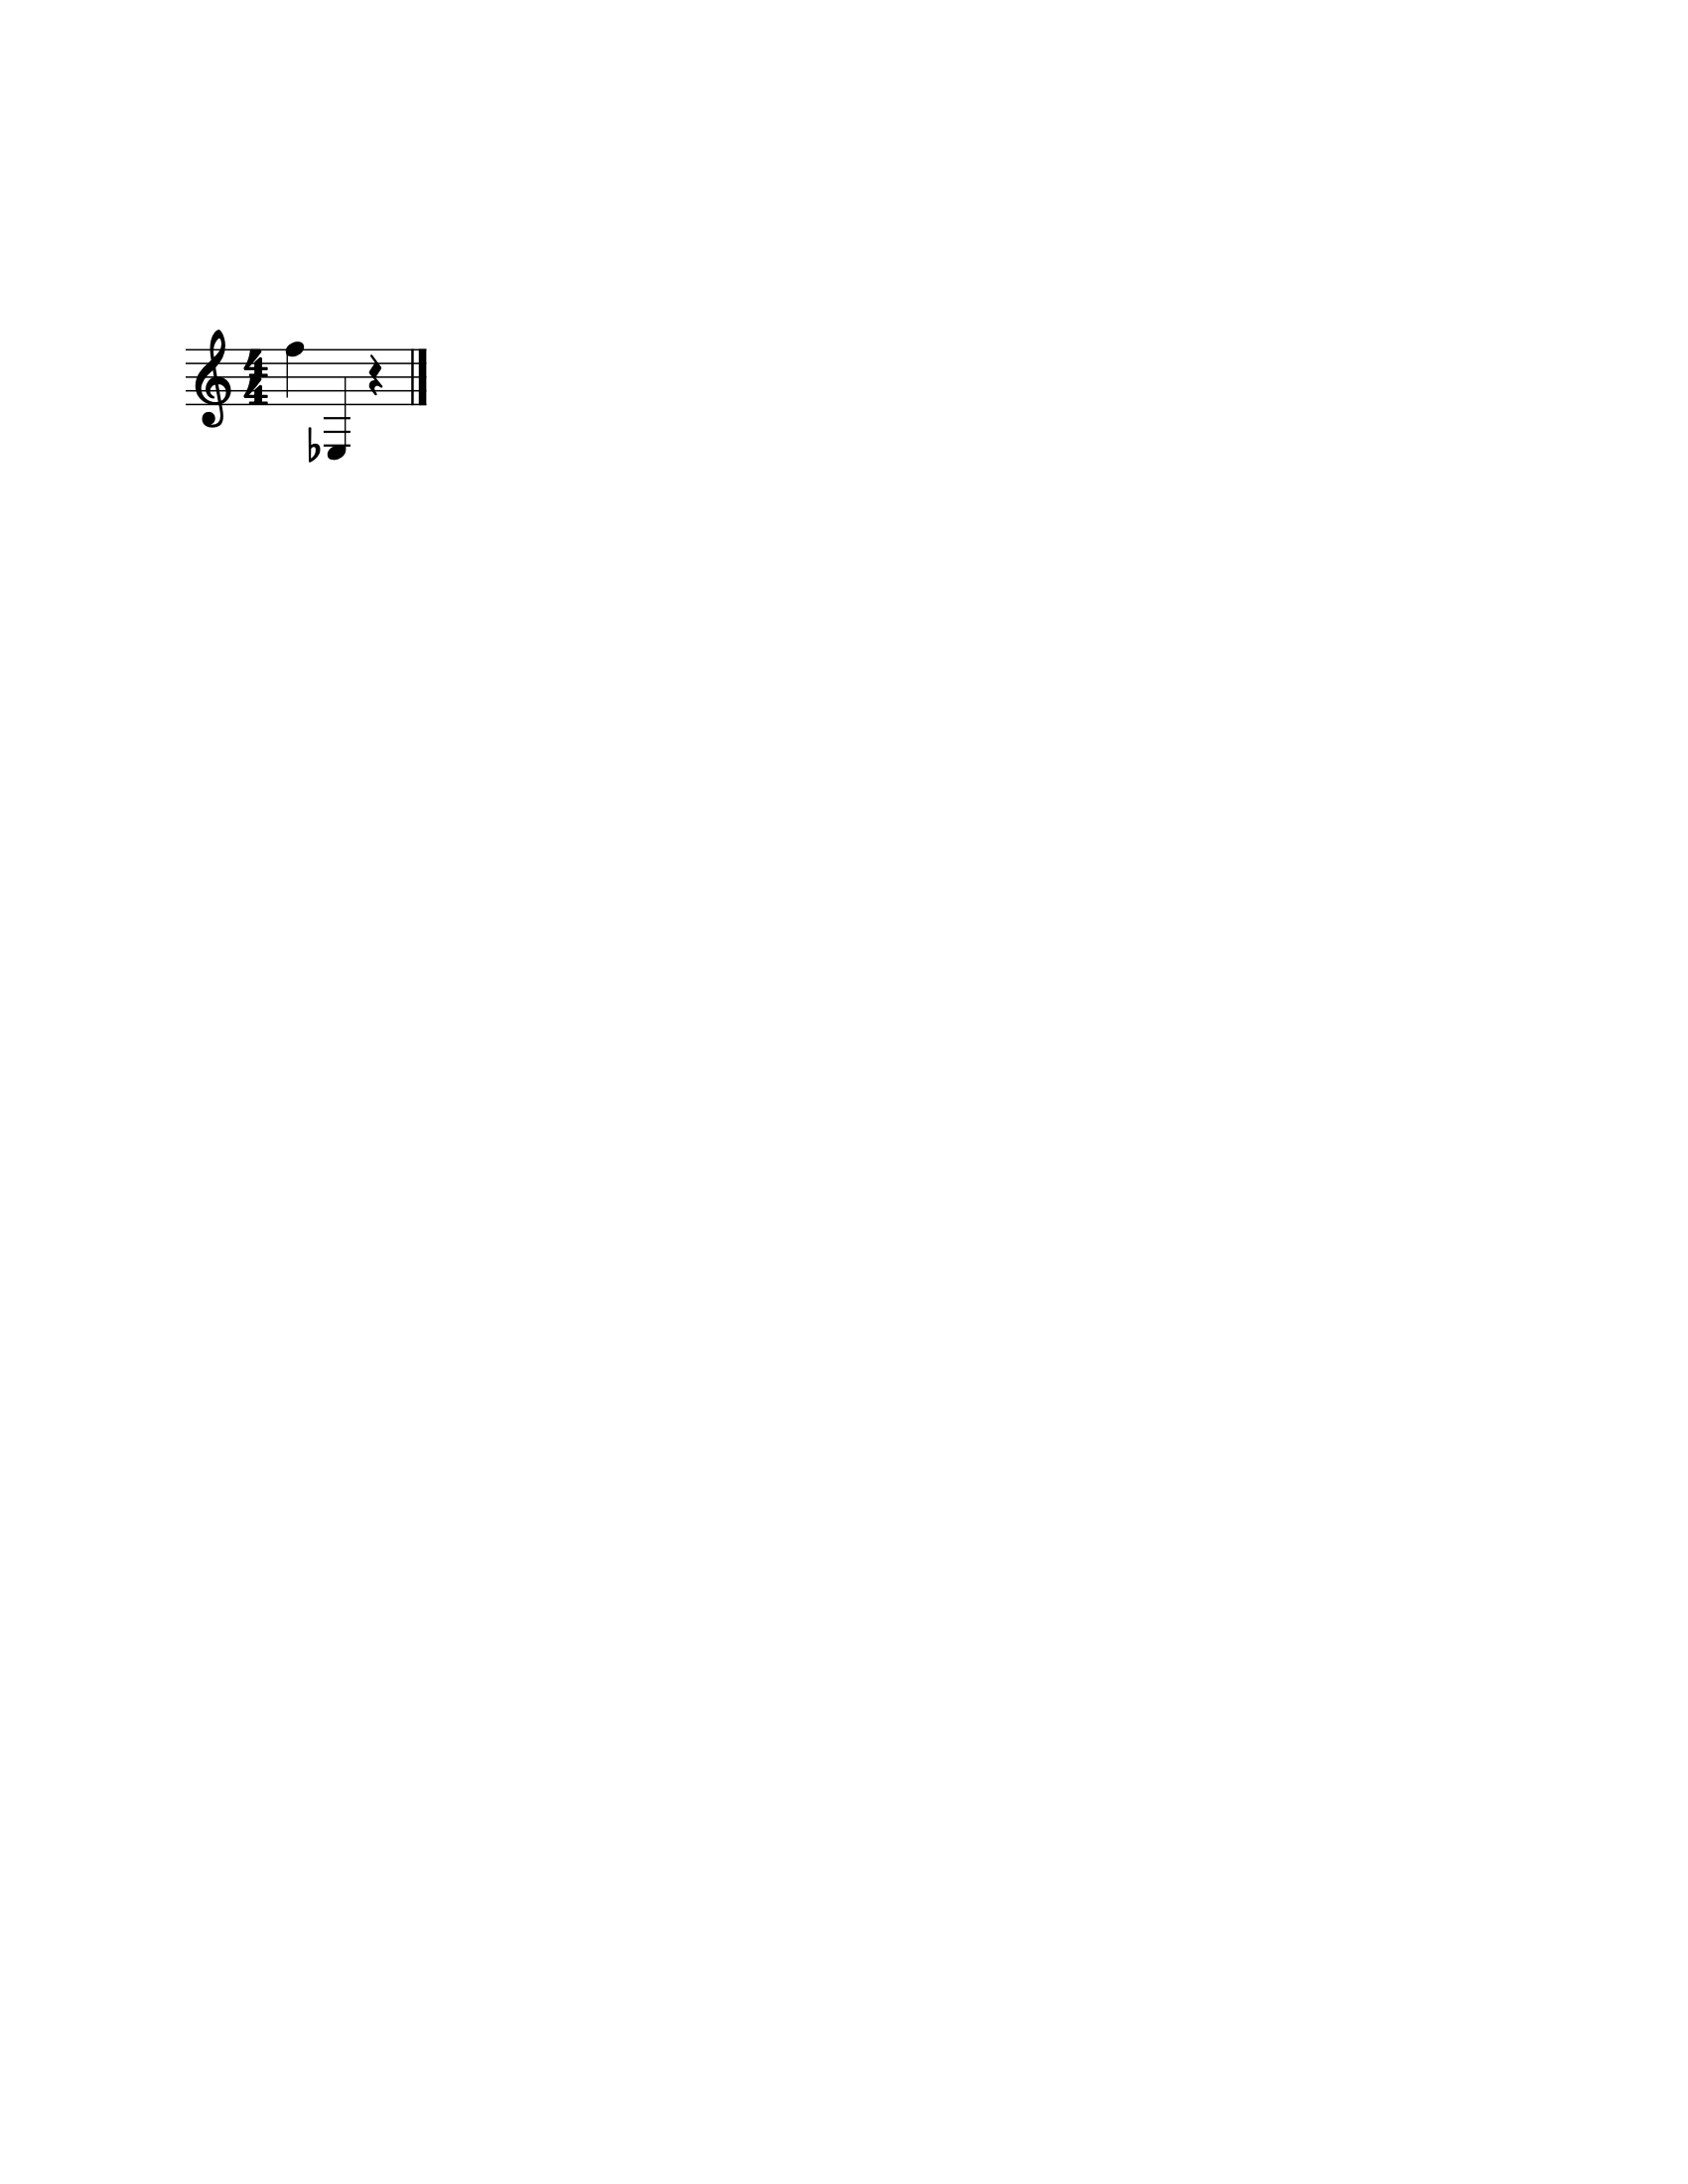

In [32]:
note_stream.show()

## Chapter 3 : Pitches, Durations and Notes again

### Pitches

In [33]:
p1 = pitch.Pitch('b-4')

In [34]:
p1

<music21.pitch.Pitch B-4>

In [35]:
# why 10?
p1.pitchClass

10

In [36]:
# # gives the value of the Pitch in the older, “MIDI” representation that is still in use today. It’s a number between 0 and 127 where middle C (C4) is 60 and C#4/Db4 is 61, B3 is 59, etc.
p1.midi

70

In [37]:
p1.name

'B-'

In [38]:
p1.nameWithOctave

'B-4'

In [39]:
p1.accidental.alter

-1.0

In [40]:
p1.name = 'd#'
p1.octave = 3
p1.nameWithOctave

'D#3'

In [41]:
And our familiar .transpose() method also appears on Pitch as well. Remember that p1 is now a D#:

SyntaxError: invalid syntax (3834345423.py, line 1)

In [ ]:
p2 = p1.transpose('M7')
p2

In [ ]:
#another way to show the variable p2 is 
repr(p2)

In [ ]:
csharp = note.Note('C#4')
csharp.name

In [ ]:
csharp.pitch.name

In [ ]:
csharp.octave

In [ ]:
csharp.pitch.octave

In [ ]:
csharp.pitch.french

In [ ]:
#Notes don't
csharp.spanish

In [ ]:
print(csharp.pitch.unicodeName)

In [ ]:
print( csharp.pitch.getEnharmonic() )
print( csharp.pitch.getLowerEnharmonic() )

### Duration

In [ ]:
halfDuration = duration.Duration('half')

In [42]:
dottedQuarter = duration.Duration(1.5)

In [43]:
dottedQuarter.quarterLength

1.5

In [44]:
halfDuration.quarterLength

NameError: name 'halfDuration' is not defined

In [45]:
halfDuration.type

NameError: name 'halfDuration' is not defined

In [ ]:
dottedQuarter.type

In [46]:
dottedQuarter.dots

1

In [47]:
dottedQuarter.dots = 2
dottedQuarter.quarterLength

1.75

In [48]:
dottedQuarter.dots = 3
dottedQuarter.quarterLength

1.875

In [49]:
dottedQuarter.quarterLength = 0.25
dottedQuarter.type

'16th'

In [50]:
dottedQuarter.dots

0

### Back to notes

In [51]:
n1 = note.Note()
n1.pitch

<music21.pitch.Pitch C4>

In [52]:
n1.duration

<music21.duration.Duration 1.0>

In [53]:
#But we can play around with them:
n1.pitch.nameWithOctave = 'E-5'
n1.duration.quarterLength = 3.0

In [54]:
# and then the other properties change accordingly:

In [55]:
n1.duration.type

'half'

In [56]:
n1.duration.dots

1

In [57]:
n1.pitch.nameWithOctave

'E-5'

In [58]:
n1.pitch.accidental

<music21.pitch.Accidental flat>

In [59]:
n1.name

'E-'

In [60]:
n1.quarterLength

3.0

In [61]:
# Let’s change the quarterLength back to 1.0 for now:
n1.quarterLength = 1.0

In [62]:
otherNote = note.Note("F6")
otherNote.lyric = "Hello bitcheeeez!"

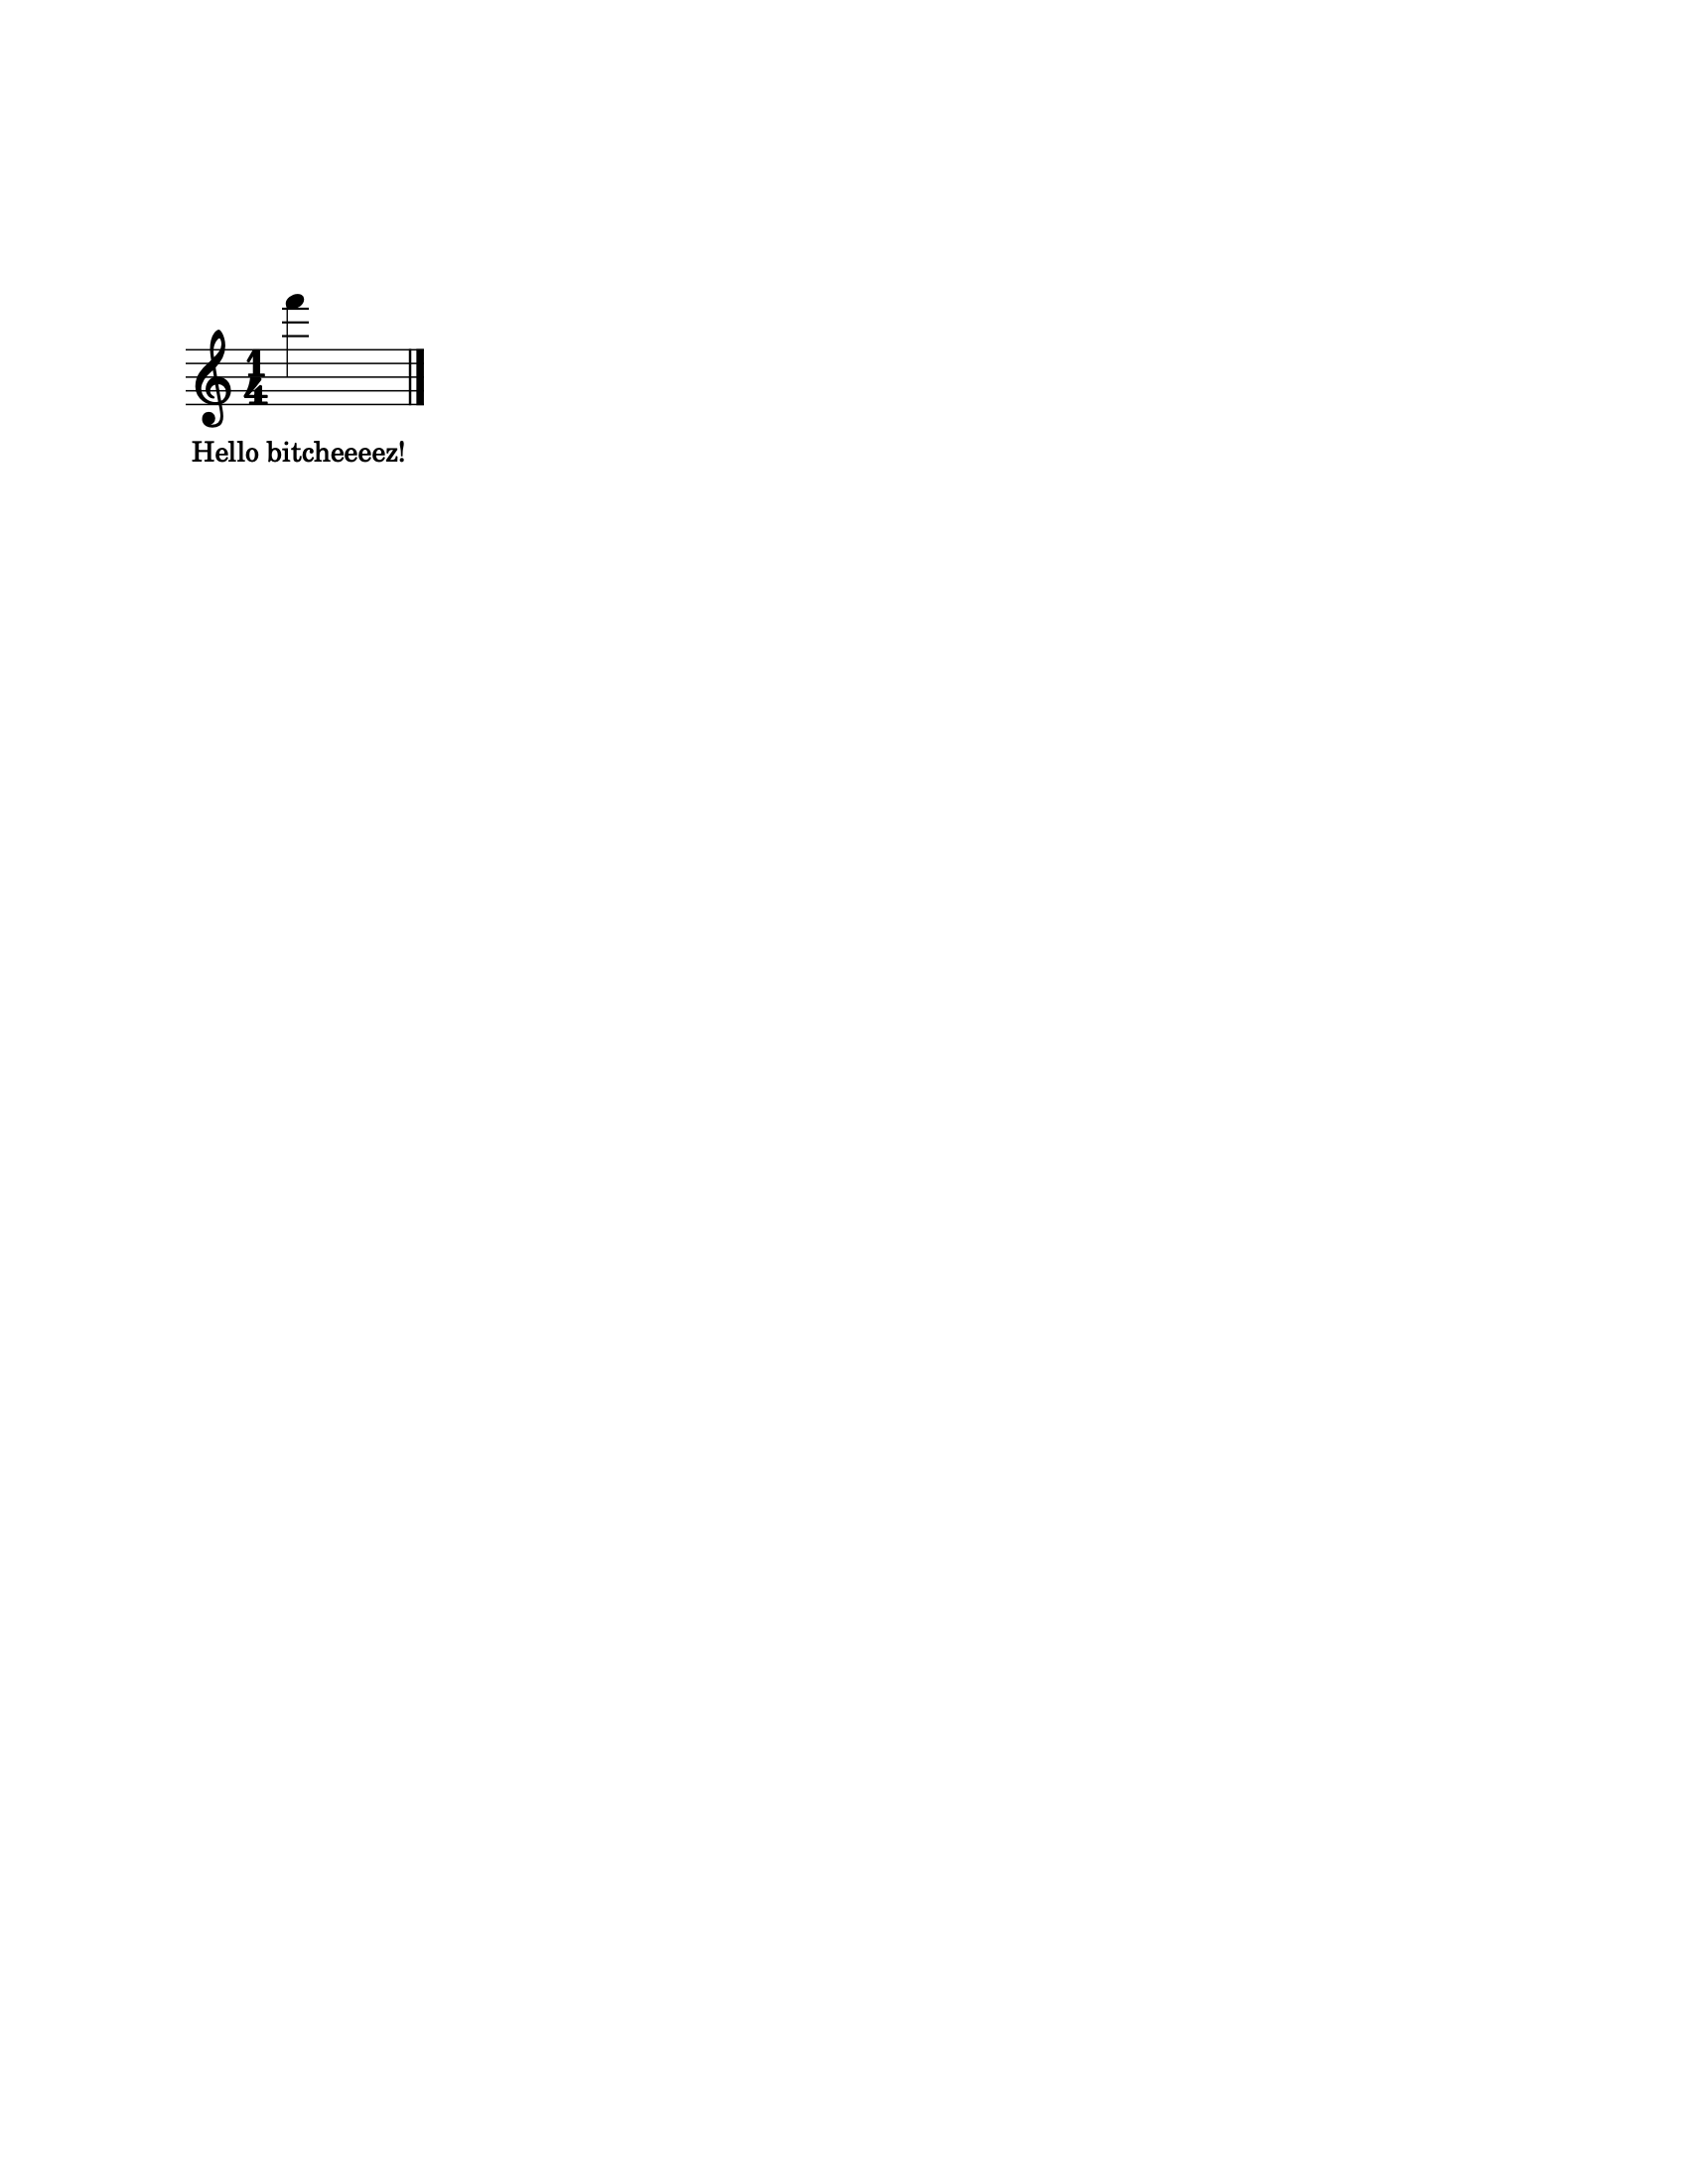

In [63]:
otherNote.show()

In [64]:
n1.addLyric(n1.nameWithOctave)
n1.addLyric(n1.pitch.pitchClassString)

In [65]:
#Finally, lets put the quarterLength of the note as a string with a preface “QL:”:
n1.addLyric(f'QL: {n1.quarterLength}')

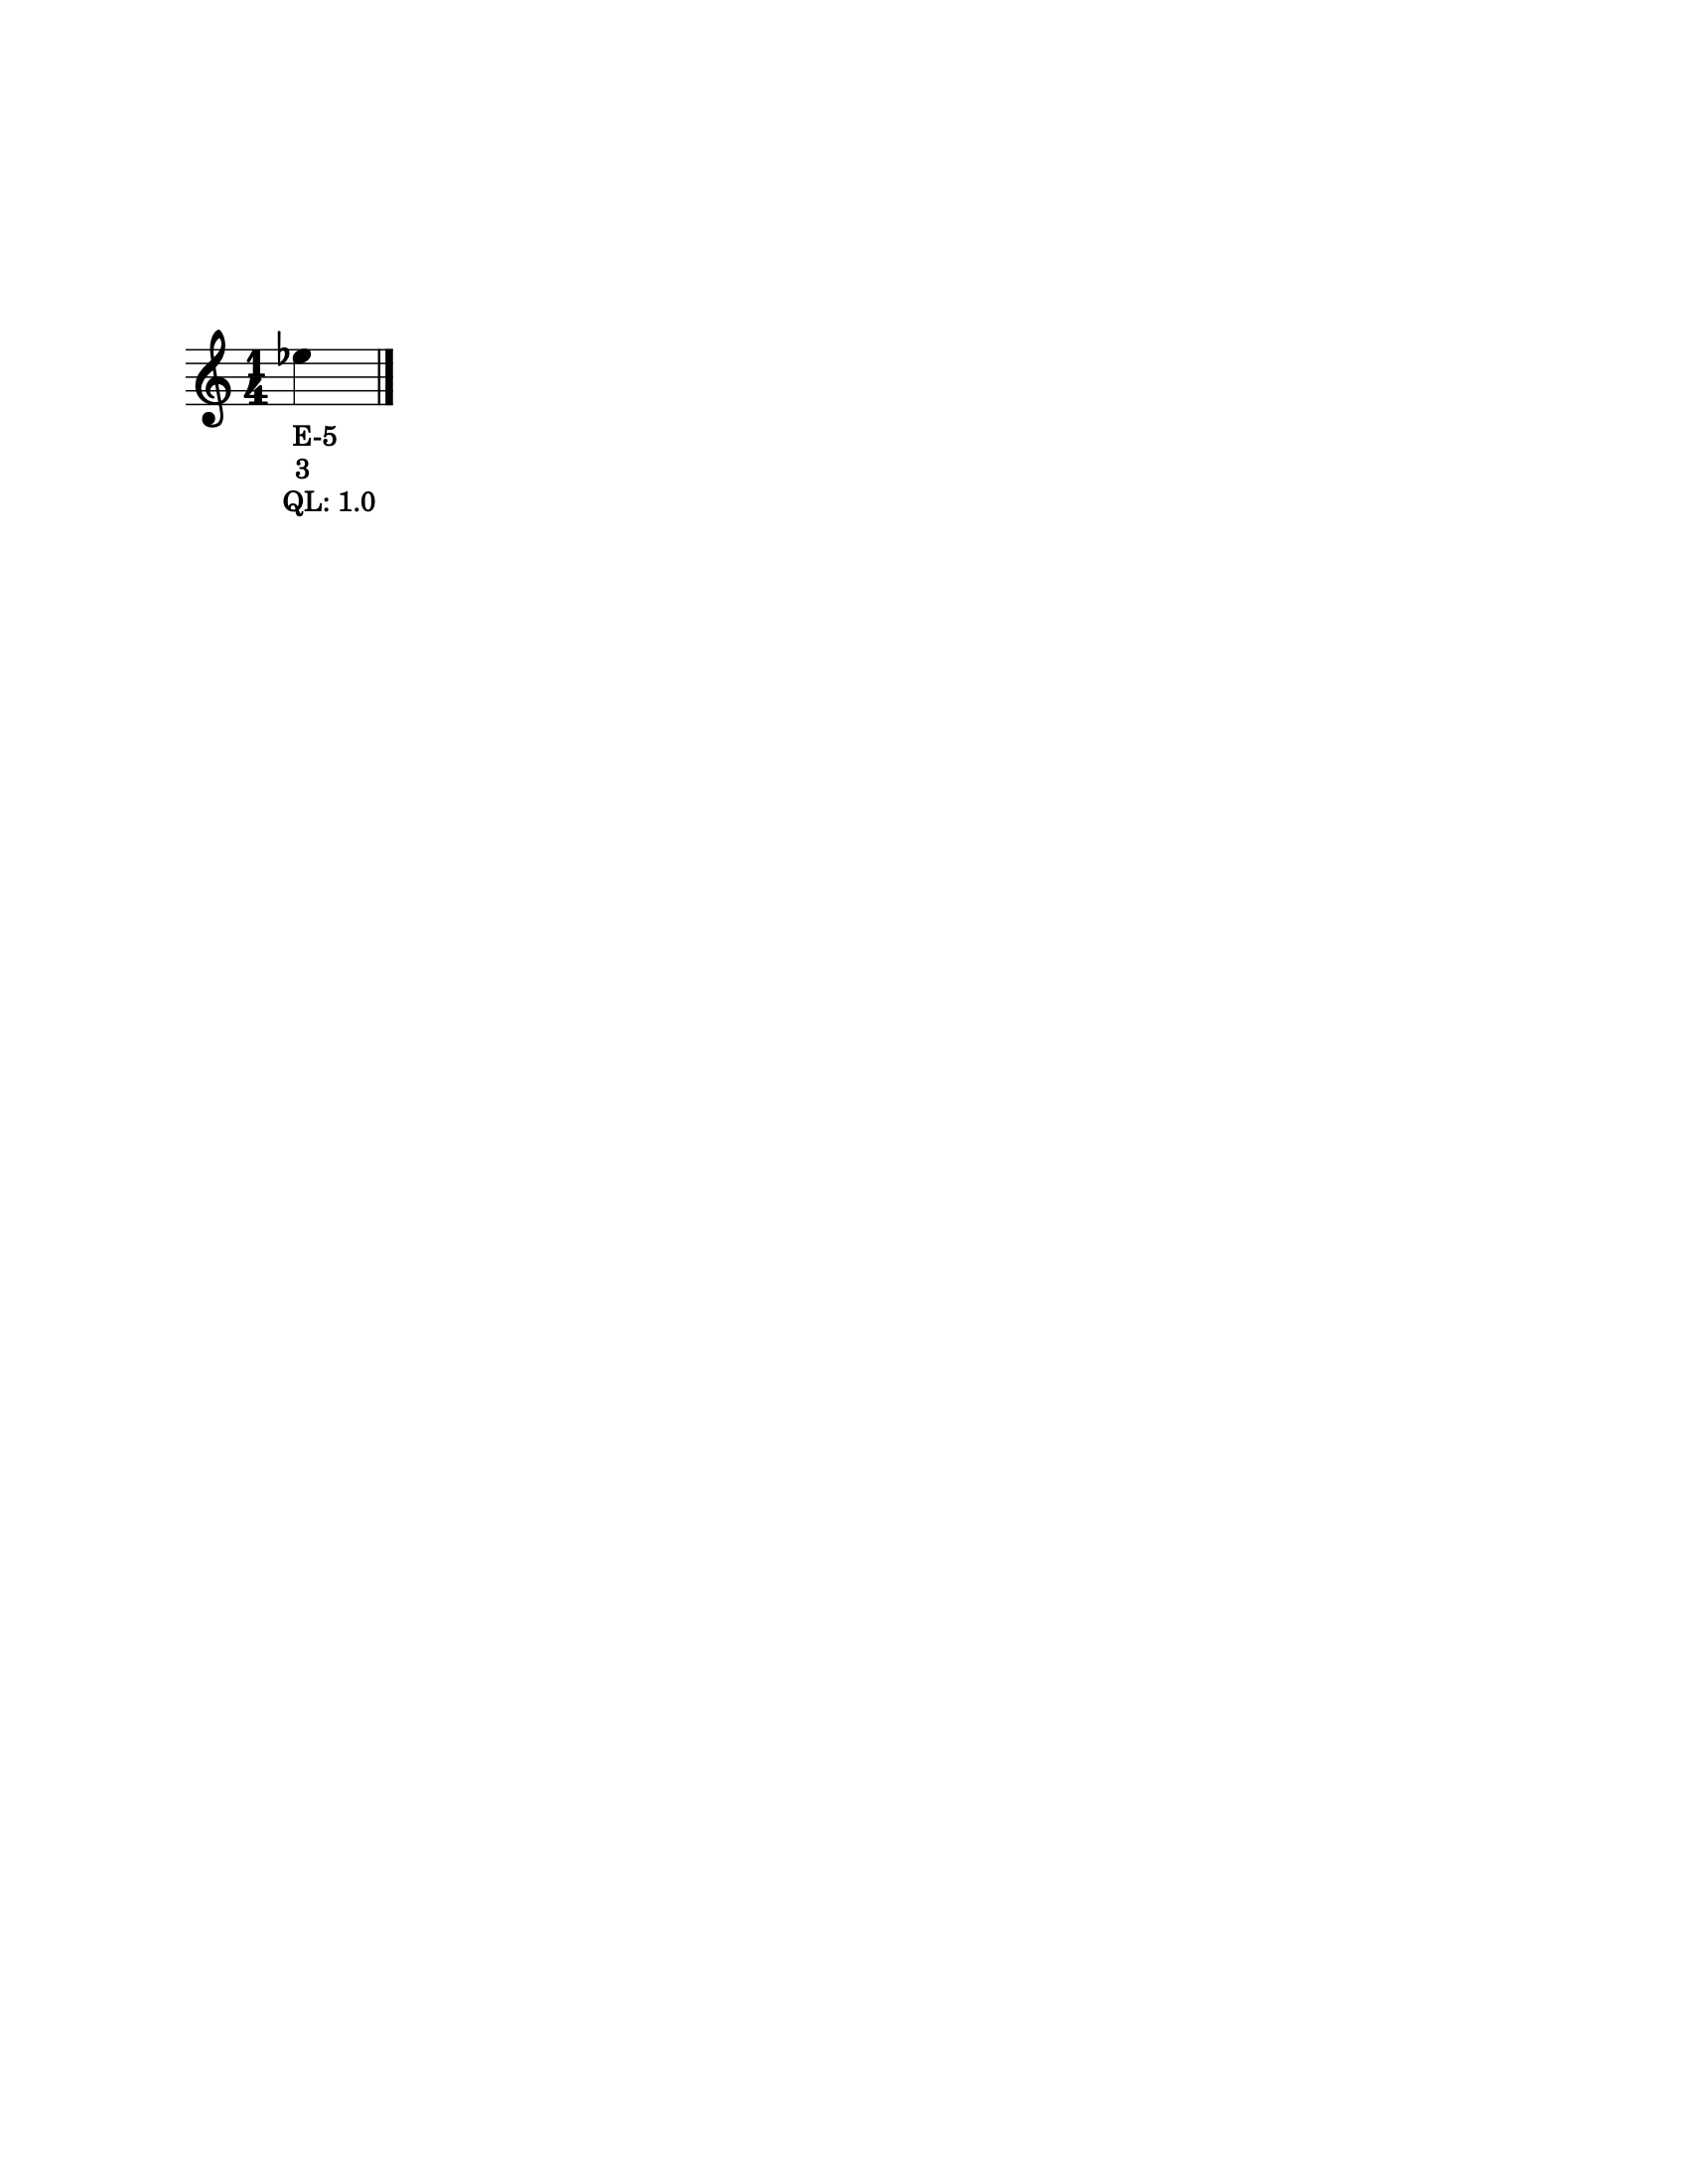

In [66]:
n1.show()

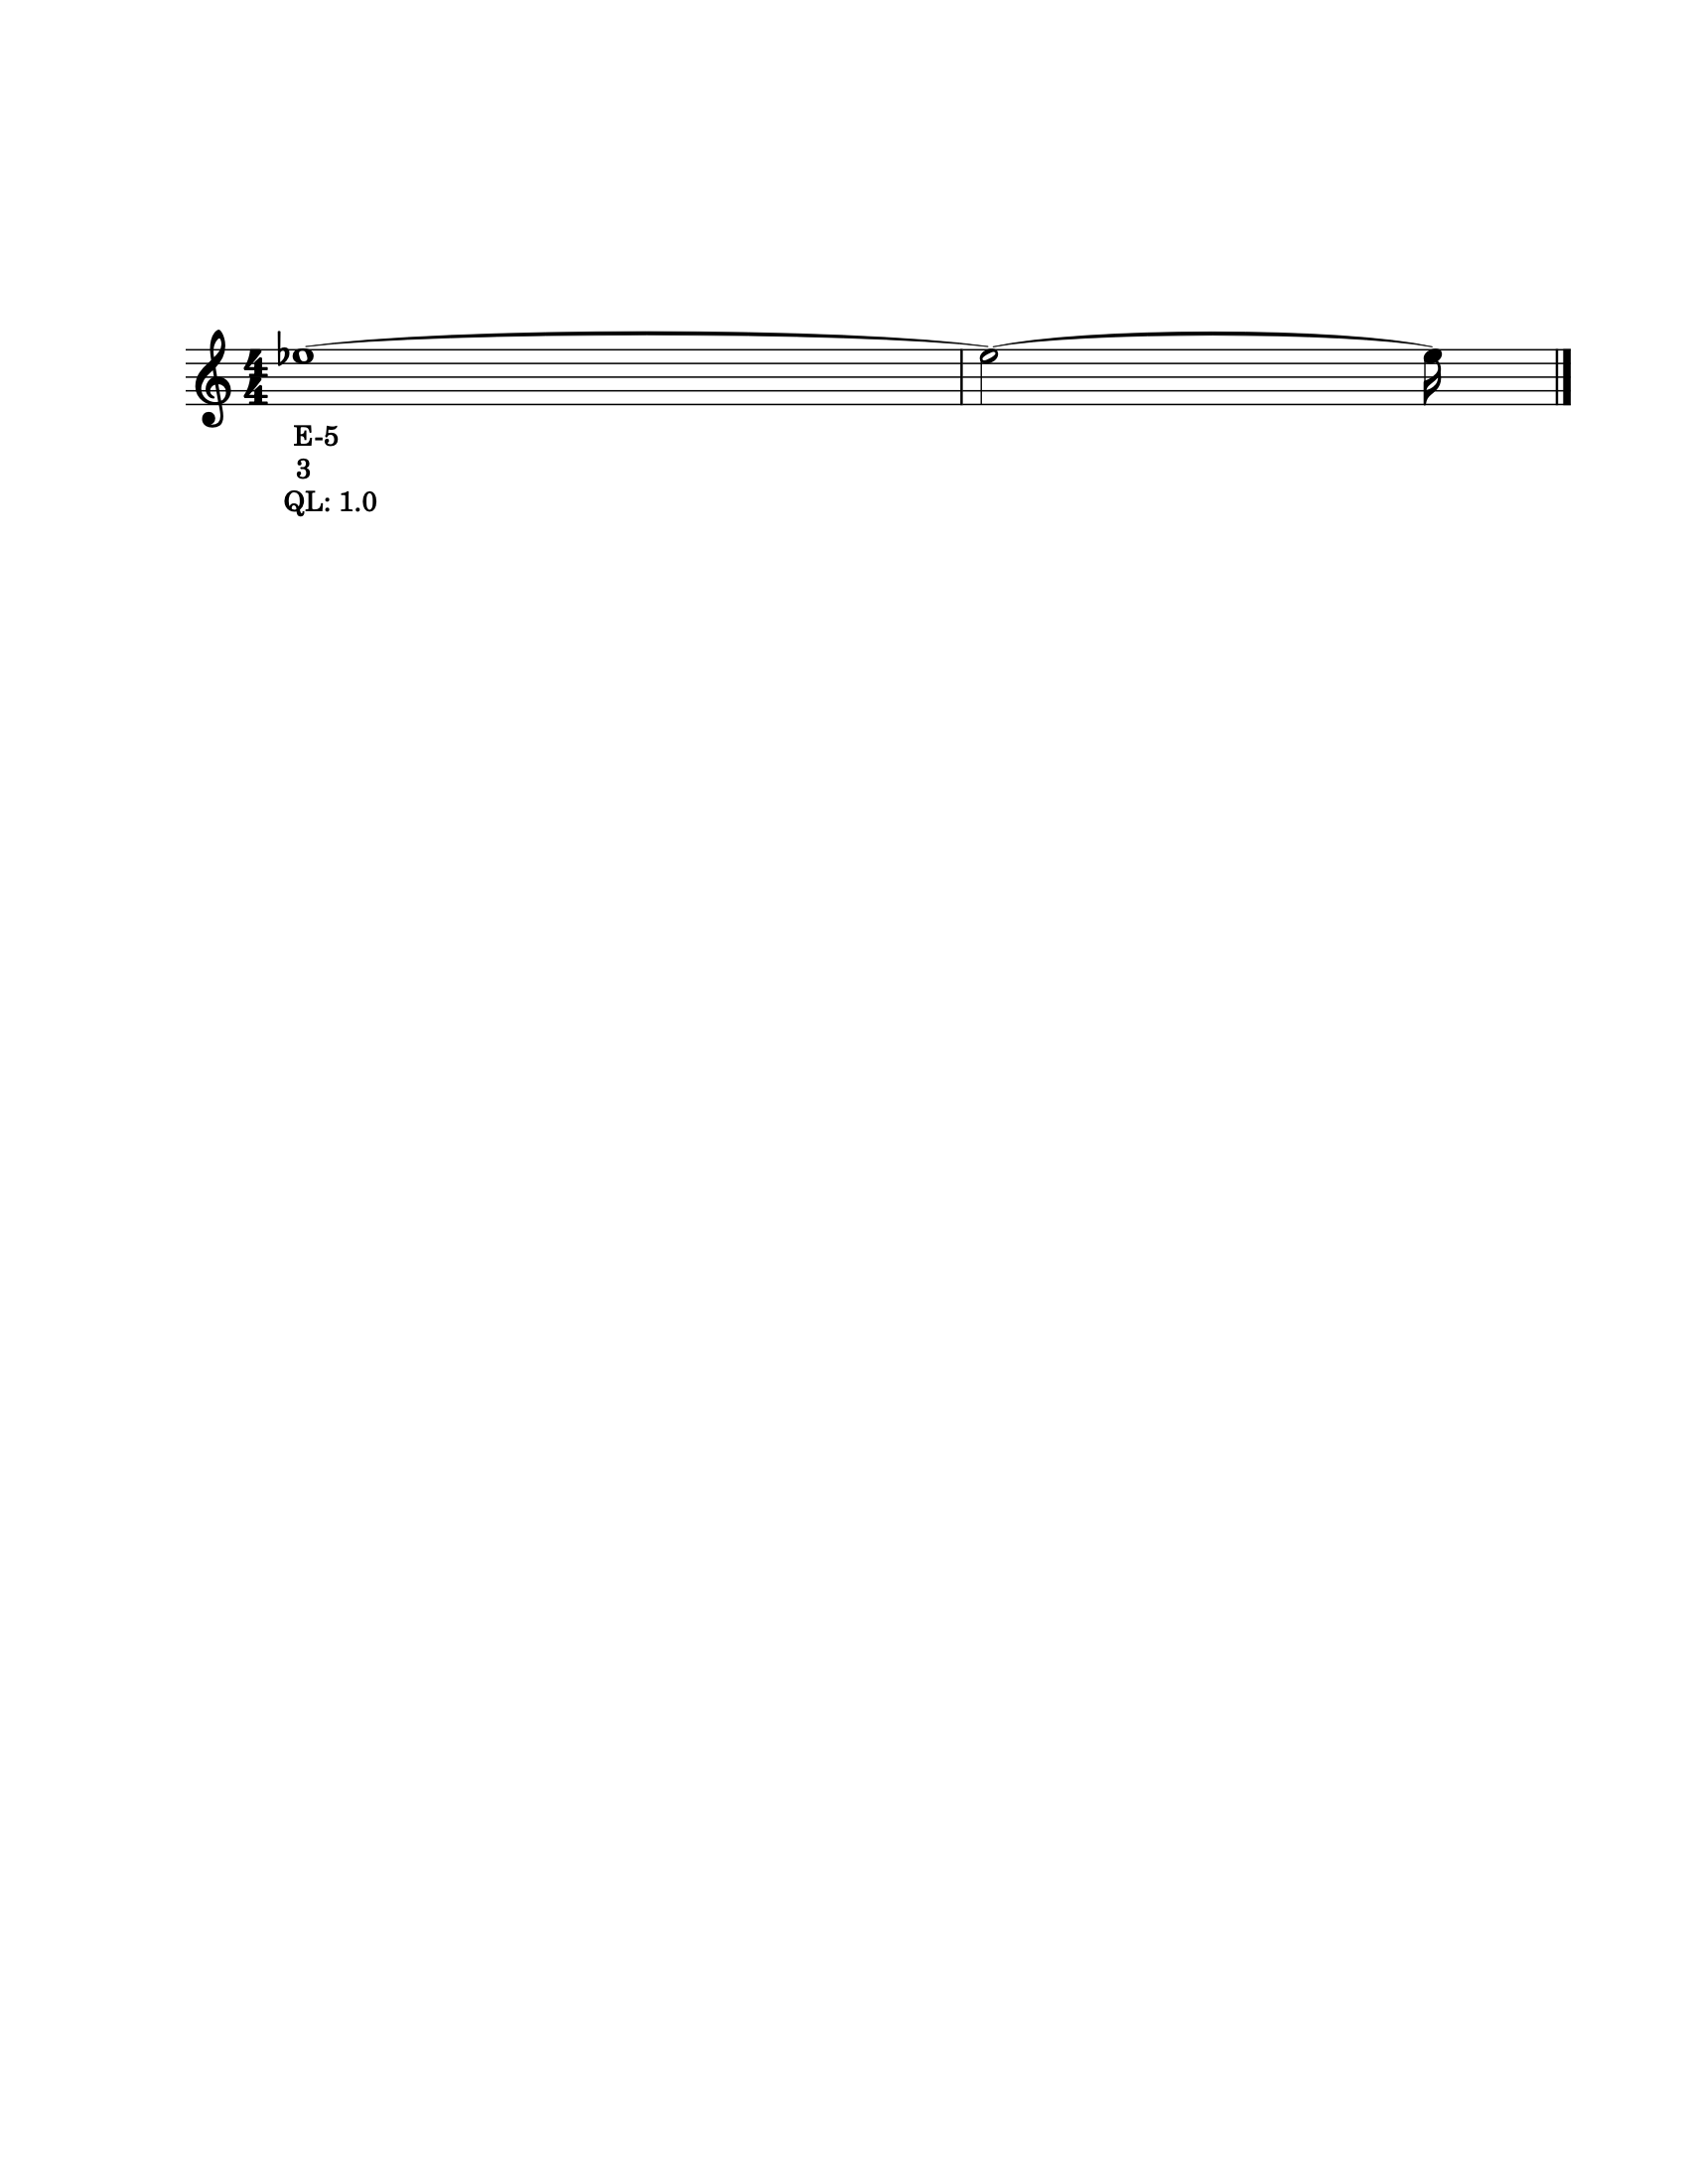

In [67]:
n1.quarterLength = 6.25
n1.show()

## Chapter 4 : Streams

### Working with multiple objects via Lists

In [68]:
note1 = note.Note("C4")
note2 = note.Note("F#4")

In [69]:
note1.duration.type = 'half'

In [70]:
note1.duration.quarterLength

2.0

In [71]:
note1.step

'C'

In [72]:
note2.step

'F'

In [73]:
noteList = [note1, note2]

In [74]:
noteList

[<music21.note.Note C>, <music21.note.Note F#>]

In [75]:
for i in noteList:
    print(i)

<music21.note.Note C>
<music21.note.Note F#>


In [76]:
note3 = note.Note("B-2")

In [77]:
noteList.append(note3)

In [78]:
len(noteList)

3

In [79]:
# fancy python list comprehension 
[i.name for i in noteList]

['C', 'F#', 'B-']

In [80]:
#All python methods are available
noteList[-1]

<music21.note.Note B->

### Streams

#### Creating simple streams

In [81]:
stream1 = stream.Stream()

In [82]:
stream1.append(note1)
stream1.append(note2)
stream1.append(note3)

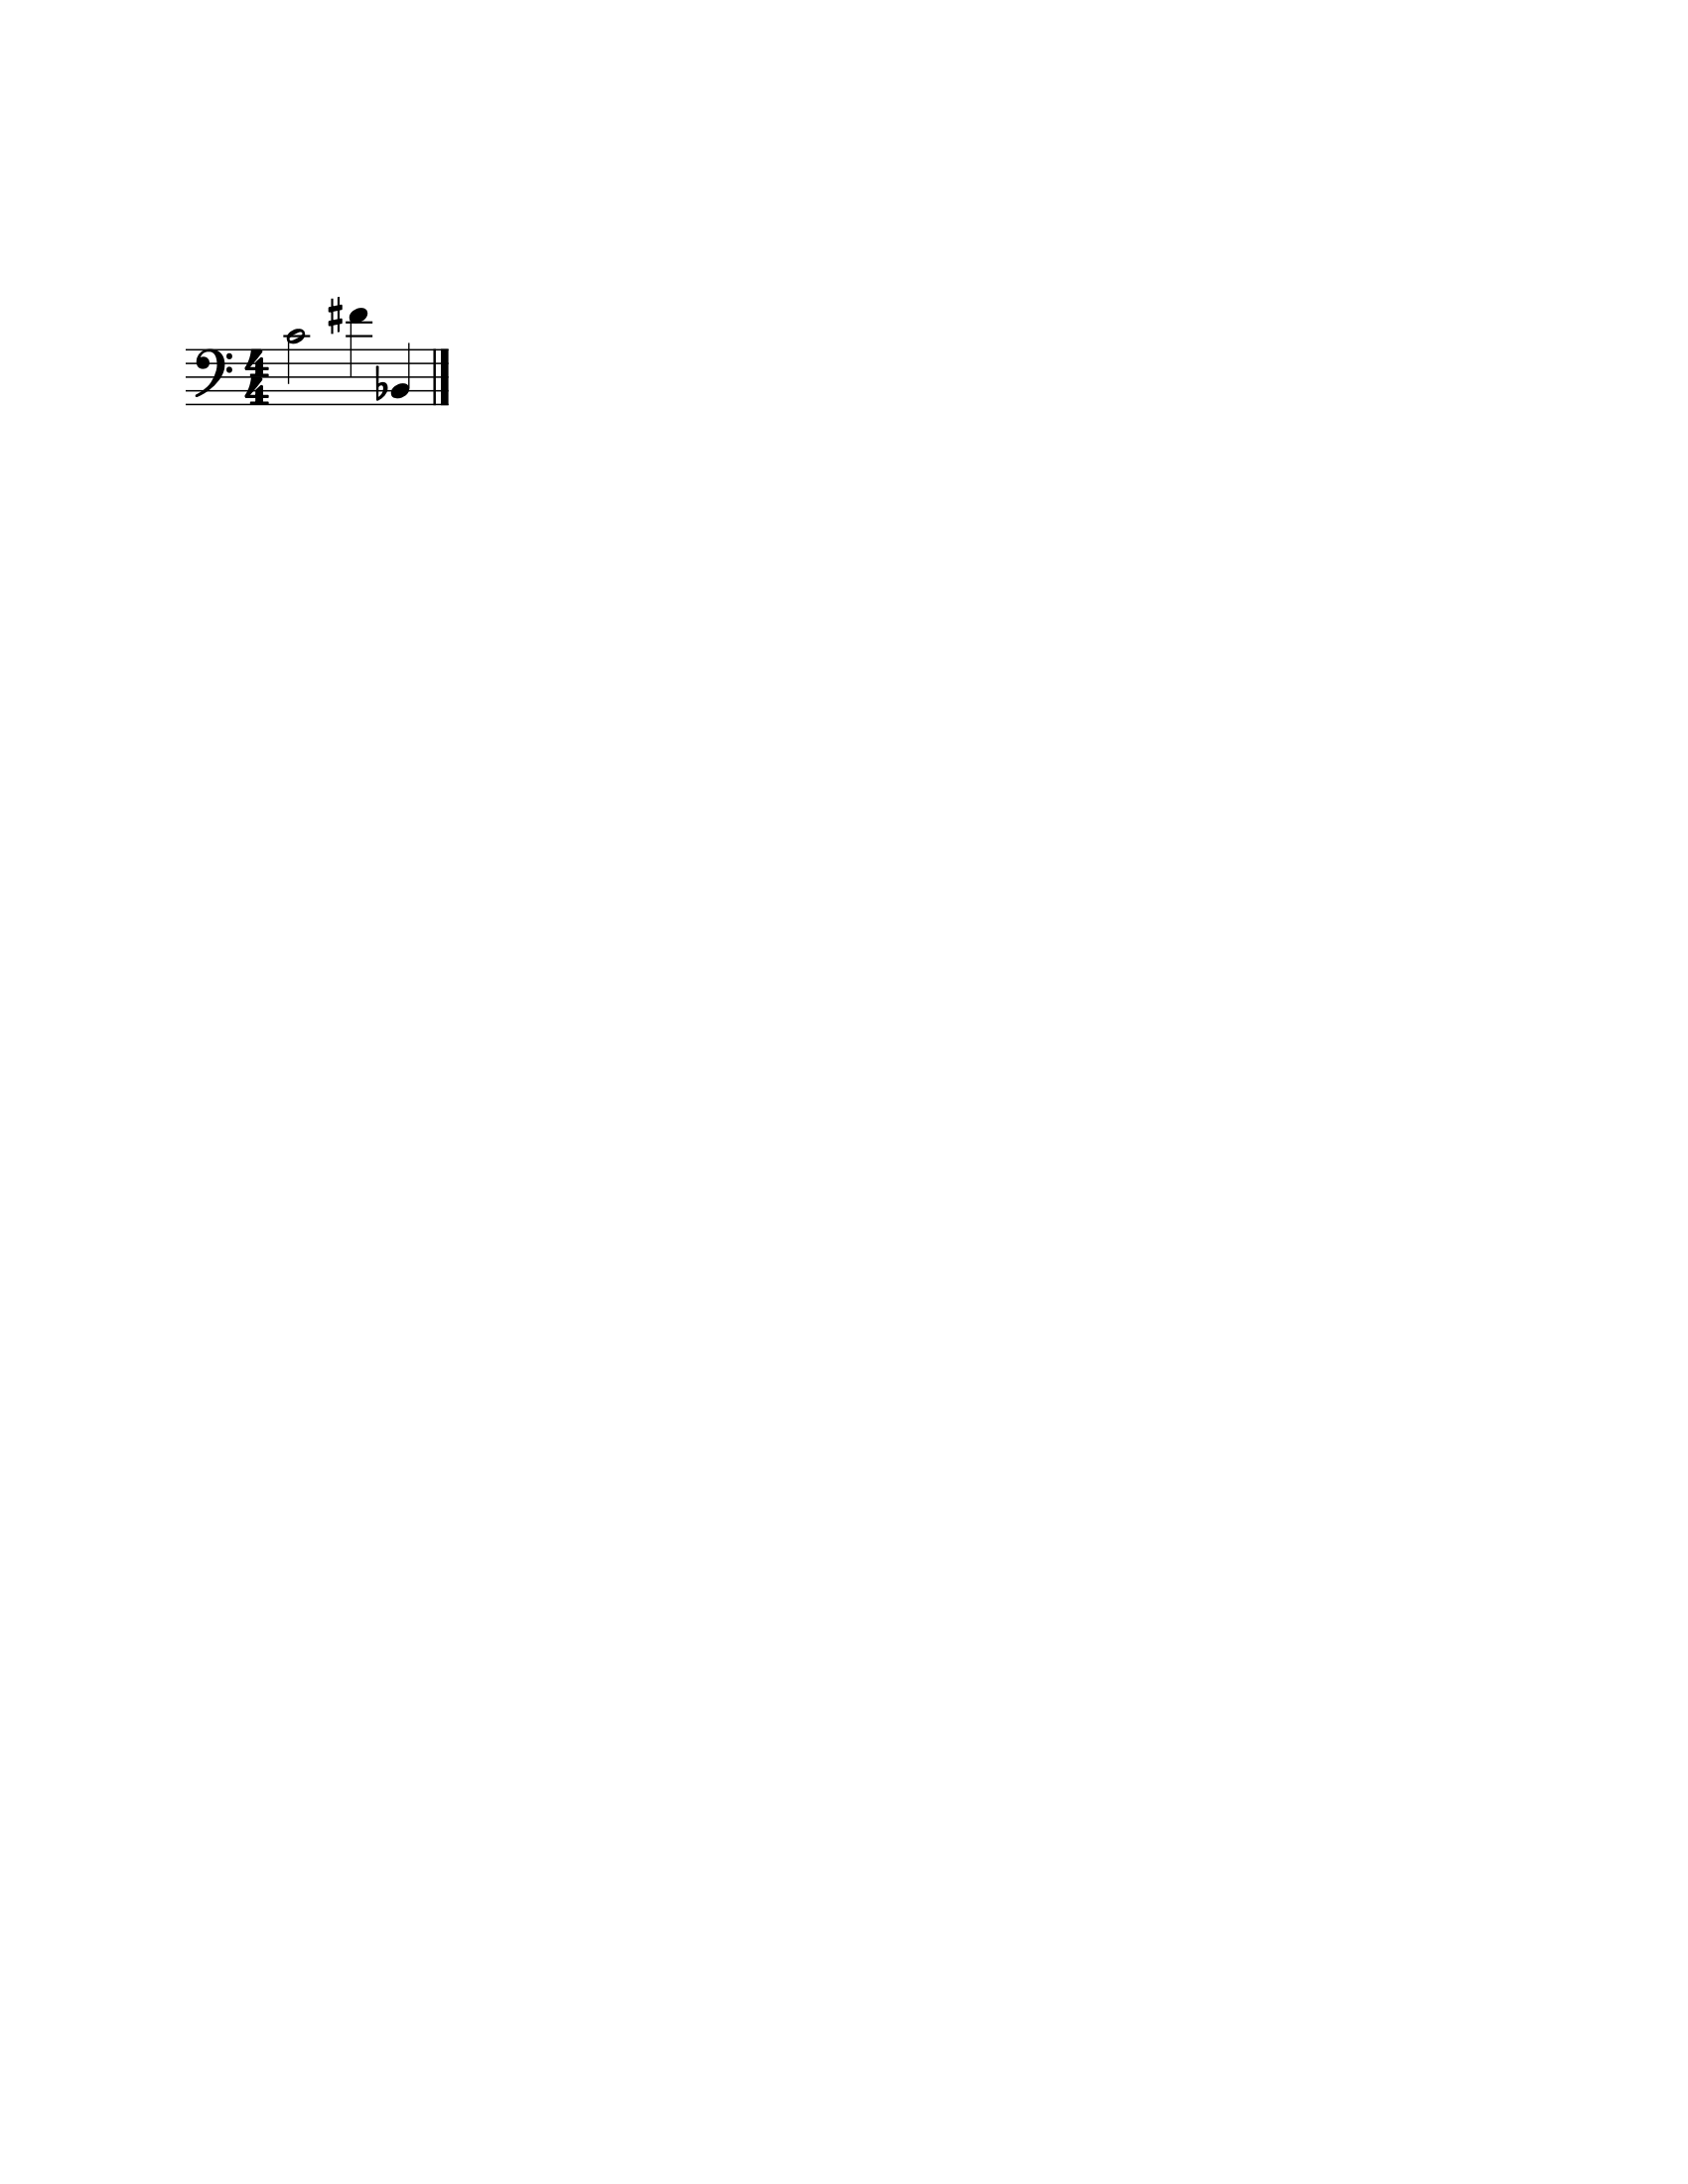

In [83]:
stream1.show()

Of course, this would be a pain to type for hundreds of Notes, so we could also use the Stream method repeatAppend() to add a number of independent, unique copies of the same Note. This creates independent copies (using Python’s copy.deepcopy function) of the supplied object, not references.

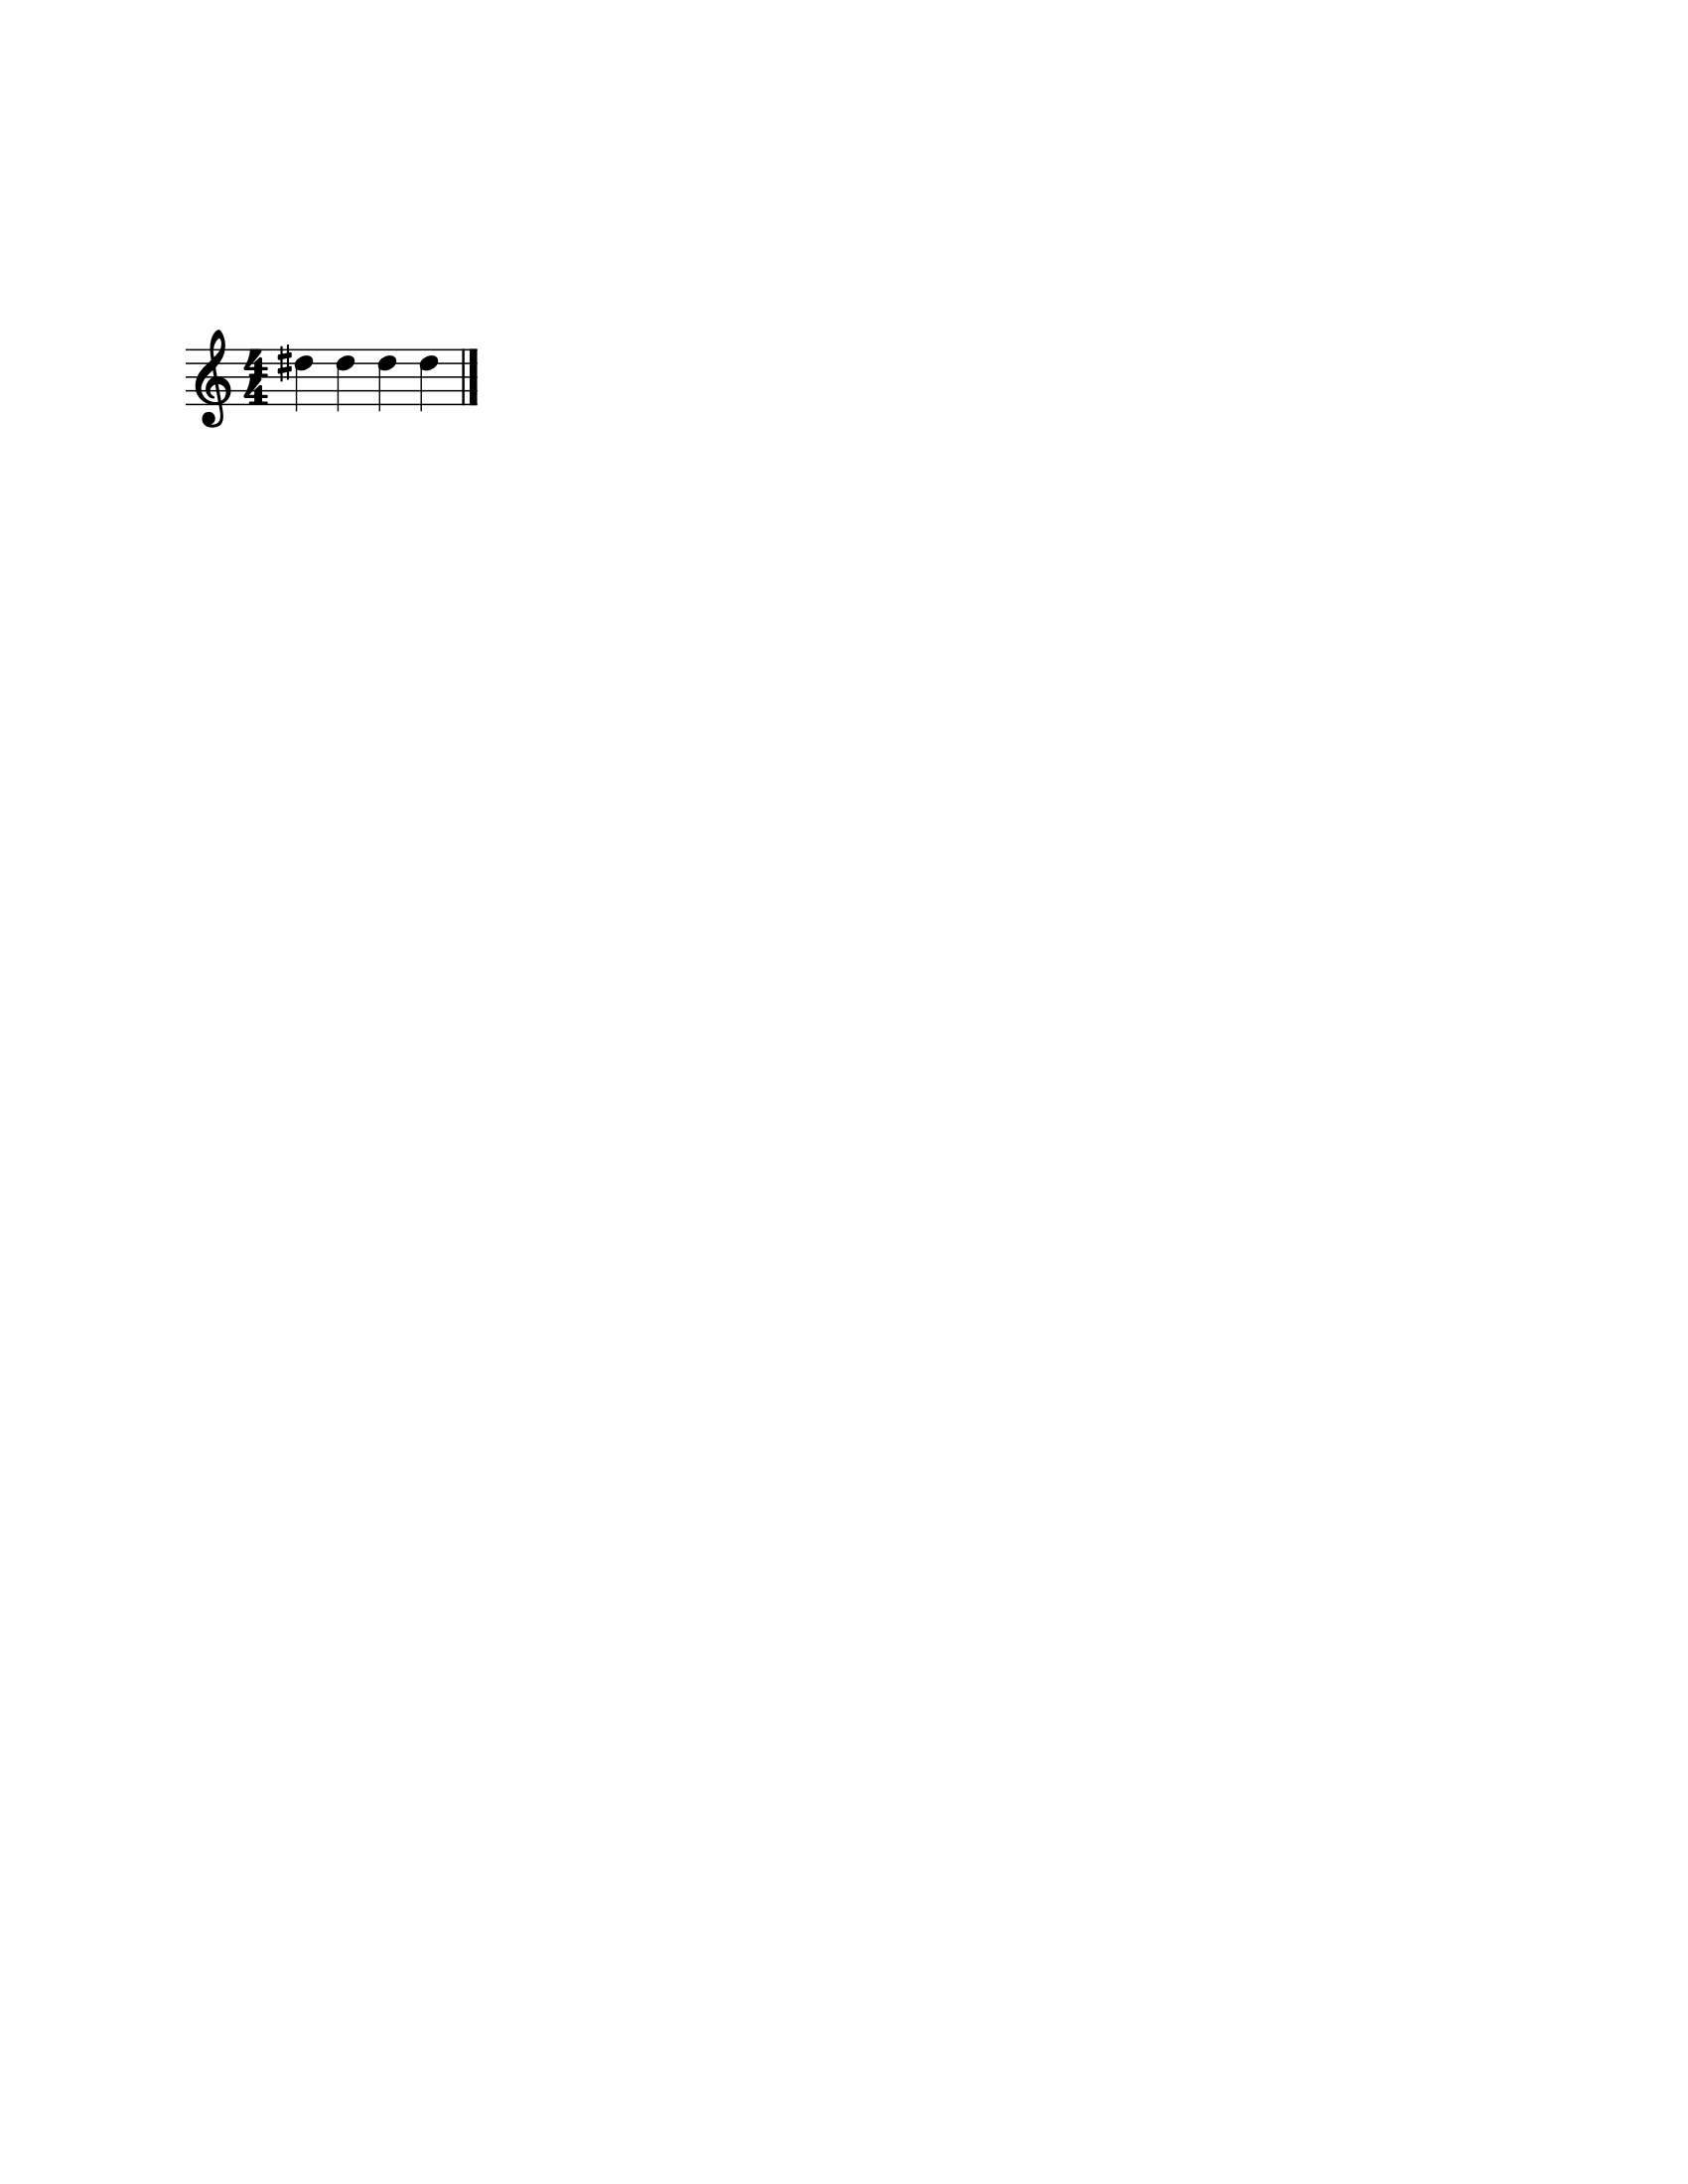

In [84]:
stream2 = stream.Stream()
n3 = note.Note('D#5')  # octave values can be included in creation arguments
stream2.repeatAppend(n3, 4)
stream2.show()

In [85]:
len(stream2)

4

In [86]:
stream2.show('text')

{0.0} <music21.note.Note D#>
{1.0} <music21.note.Note D#>
{2.0} <music21.note.Note D#>
{3.0} <music21.note.Note D#>


#### Accessing Streams

We can also dive deeper into streams. Let’s get the step of each Note using the for thisNote in ...: command. But now we’ll use stream1 instead of noteList:

In [87]:
for thisNote in stream1:
    print(thisNote.name)

C
F#
B-


In [88]:
stream1[-1].nameWithOctave

'B-2'

While full list-like functionality of the Stream isn’t there, some additional methods familiar to users of Python lists are also available. The Stream index() method can be used to get the first-encountered index of a supplied object.

In [89]:
str1Note3Index = stream1.index(note3)
str1Note3Index

2

Given an index, an element from the Stream can be removed with the pop() method.

In [90]:
stream1.pop(str1Note3Index)

<music21.note.Note B->

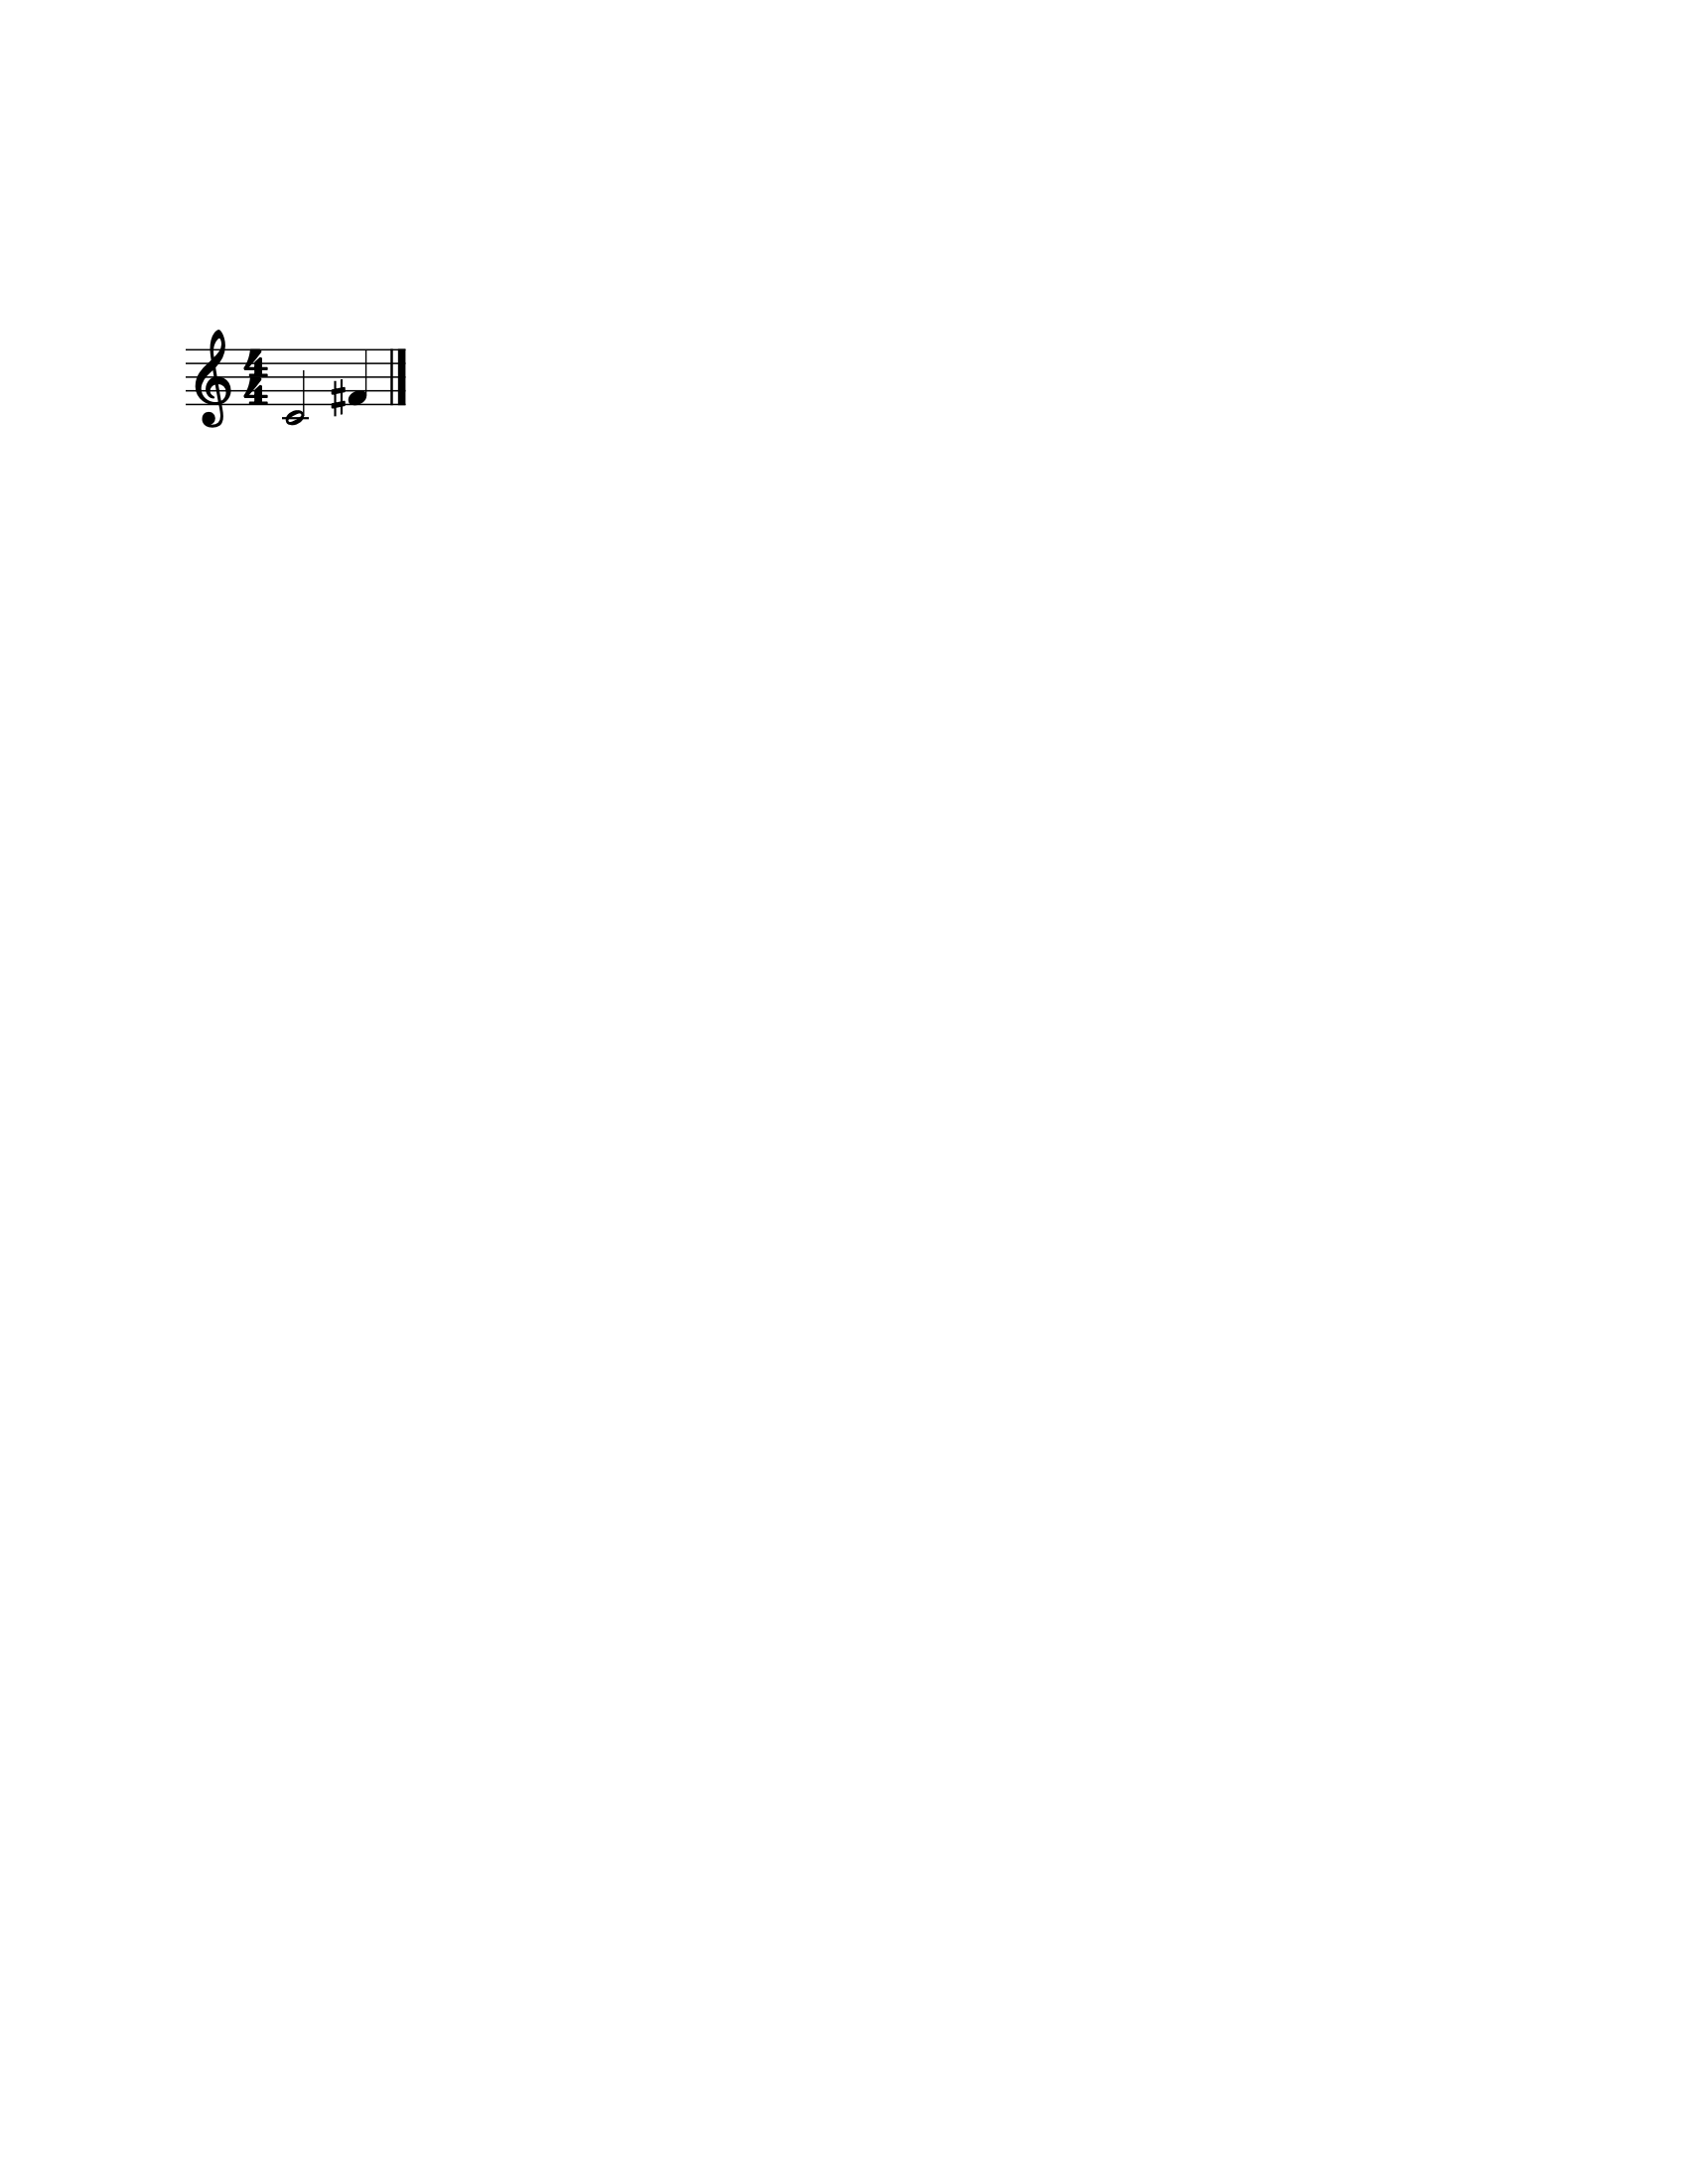

In [91]:
stream1.show()

Since we removed note3 from stream1 with the the pop() method, let’s add note3 back into stream1 so that we can continue with the examples below using stream1 as we originally created it.

In [92]:
stream1.append(note3)

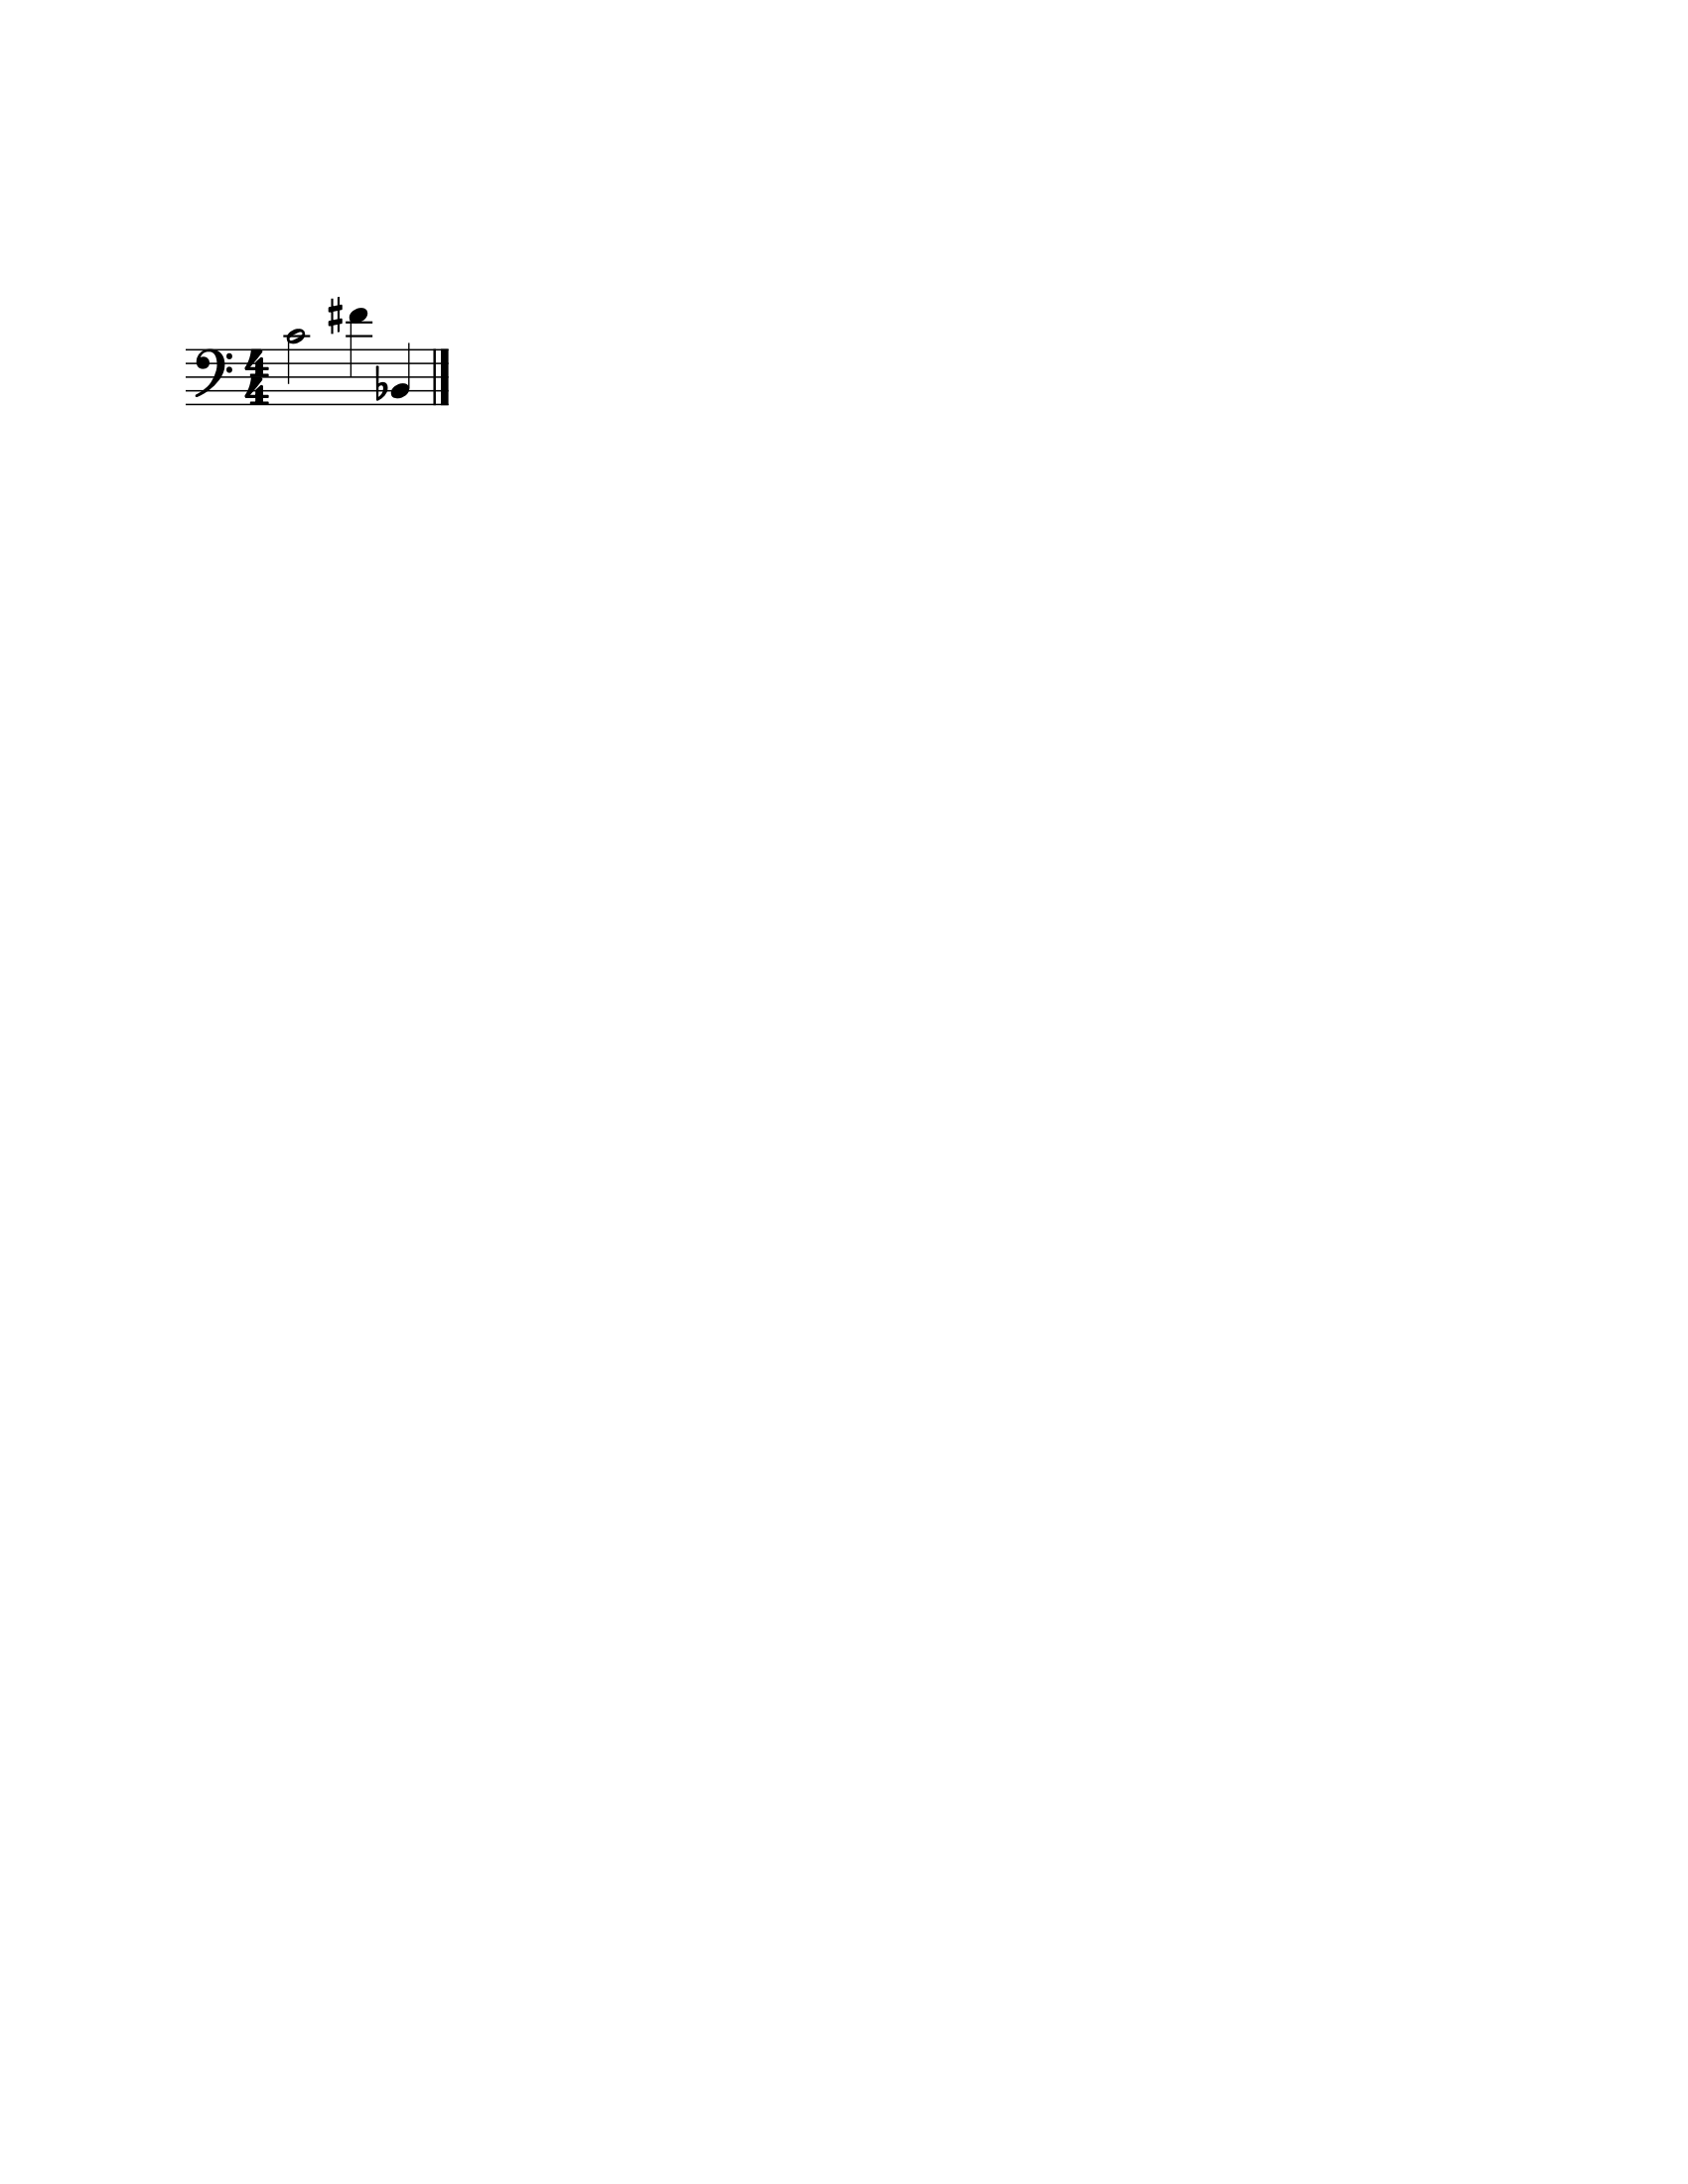

In [93]:
stream1.show()

#### Separating out elements by class with .getElementsByClass()¶

We can also gather elements based on the class (object type) of the element, by offset range, or by specific identifiers attached to the element. Gathering elements from a Stream based on the class of the element provides a way to filter the Stream for desired types of objects. The getElementsByClass() method iterates over a Stream of elements that are instances or subclasses of the provided classes. The example below gathers all Note objects and then all Rest objects. The easiest way to do this is to use for loops with .getElementsByClass():

In [94]:
for thisNote in stream1.getElementsByClass(note.Note):
    print(thisNote, thisNote.offset)

<music21.note.Note C> 0.0
<music21.note.Note F#> 2.0
<music21.note.Note B-> 3.0


In [95]:
for thisNote in stream1.getElementsByClass("Note"):
    print(thisNote, thisNote.offset)

<music21.note.Note C> 0.0
<music21.note.Note F#> 2.0
<music21.note.Note B-> 3.0


It is also possible to pass in a list of classes or strings of class names to .getElementsByClass() which will return anything that matches any of the classes. Notice the [] marks in the next call, indicating that we are creating a list to pass to .getElementsByClass():

In [96]:
for thisNote in stream1.getElementsByClass(['Note', 'Rest']):
    print(thisNote, thisNote.offset)

<music21.note.Note C> 0.0
<music21.note.Note F#> 2.0
<music21.note.Note B-> 3.0


Since there are no note.Rest objects, it’s the same as above. Oh well…

music21 has a couple of shortcuts that are equivalent to .getElementsByClass. For instance .notes is equivalent to .getElementsByClass(['Note', 'Chord']) (we’ll get to chords soon):

In [97]:
for thisNote in stream1.notes:
    print(thisNote)

<music21.note.Note C>
<music21.note.Note F#>
<music21.note.Note B->


In [98]:
for thisNote in stream1.notesAndRests:
    print(thisNote)

<music21.note.Note C>
<music21.note.Note F#>
<music21.note.Note B->


Finally, there’s something slightly different. .pitches begins with a call to .notes, but then returns a list of all the pitches from every Note or Chord in the Stream:

In [99]:
listOut = stream1.pitches
listOut

[<music21.pitch.Pitch C4>,
 <music21.pitch.Pitch F#4>,
 <music21.pitch.Pitch B-2>]

The result of a .getElementsByClass are not technically streams, but you can convert it to a stream with .stream() and then call .show() on it:

In [100]:
streamIterator = stream1.getElementsByClass(note.Note)
sOut = streamIterator.stream()
sOut.show('text')

{0.0} <music21.note.Note C>
{2.0} <music21.note.Note F#>
{3.0} <music21.note.Note B->


#### Separating out elements by offset with .getElementsByOffset()

The getElementsByOffset() method returns a Stream of all elements that fall either at a single offset or within a range of two offsets provided as an argument. In both cases a Stream is returned.

In [101]:
sOut = stream1.getElementsByOffset(3)
len(sOut)

1

In [102]:
sOut[0]

<music21.note.Note B->

Like with .getElementsByClass() if you want a Stream from .getElementsByOffset(), add .stream() to the end of it.

In [103]:
sOut = stream1.getElementsByOffset(2, 3).stream()
sOut.show('text')

{2.0} <music21.note.Note F#>
{3.0} <music21.note.Note B->


We will do more with .getElementsByOffset() later when we also talk about getElementAtOrBefore() and getElementAfterElement()

#### More Stream features

Okay, so far we’ve seen that Streams can do the same things as lists, but can they do more? Let’s call the analyze method on stream to get the ambitus (that is, the range from the lowest note to the highest note) of the Notes in the Stream:

In [104]:
stream1.analyze('ambitus')

<music21.interval.Interval A12>

Let’s take a second to check this. Our lowest note is note3 (B-flat in octave 2) and our highest note is note2 (F-sharp in octave 4). From B-flat to the F-sharp above it, is an augmented fifth. An augmented fifth plus an octave is an augmented twelfth. So we’re doing well so far. (We’ll get to other things we can analyze in chapter 18 and we’ll see what an Interval object can do in chapter 15).

As we mentioned earlier, when placed in a Stream, Notes and other elements also have an offset (stored in .offset) that describes their position from the beginning of the stream. These offset values are also given in quarter-lengths (QLs).

In [105]:
note1.offset

0.0

note2’s offset will be 2.0, since note1 is a half note, worth two quarter notes:

In [106]:
note2.offset

2.0

And note3, which follows the quarter note note2 will be at offset 3.0:

In [107]:
note3.offset

3.0

(If we made note2 an eighth note, then note3’s offset would be the floating point [decimal] value 2.5. But we didn’t.) So now when we’re looping we can see the offset of each note. Let’s print the note’s offset followed by its name by putting .offset and .name in the same line, separated by a comma:

In [108]:
for thisNote in stream1:
    print(thisNote.offset, thisNote.name)

0.0 C
2.0 F#
3.0 B-


(Digression: It’s probably not too early to learn that a safer form of .offset is .getOffsetBySite(stream1):

In [109]:
note2.offset

2.0

In [110]:
note2.getOffsetBySite(stream1)

2.0

What’s the difference?

Remember how I said that .offset refers to the number of quarter notes that the Note is from the front of a Stream? 

Well, eventually you may put the same Note in different places in multiple Streams, so the .getOffsetBySite(X) command is a safer way that specifies exactly which Stream we are talking about. End of digression…)

As a final note about offsets, the lowestOffset property returns the minimum of all offsets for all elements on the Stream.

So, what else can we do with Streams? Like Note objects, we can show() them in a couple of different ways. Let’s hear these three Notes as a MIDI file:

In [113]:
# Let's play it
StreamPlayer(stream1).play()

pygame 2.3.0 (SDL 2.24.2, Python 3.10.10)
Hello from the pygame community. https://www.pygame.org/contribute.html


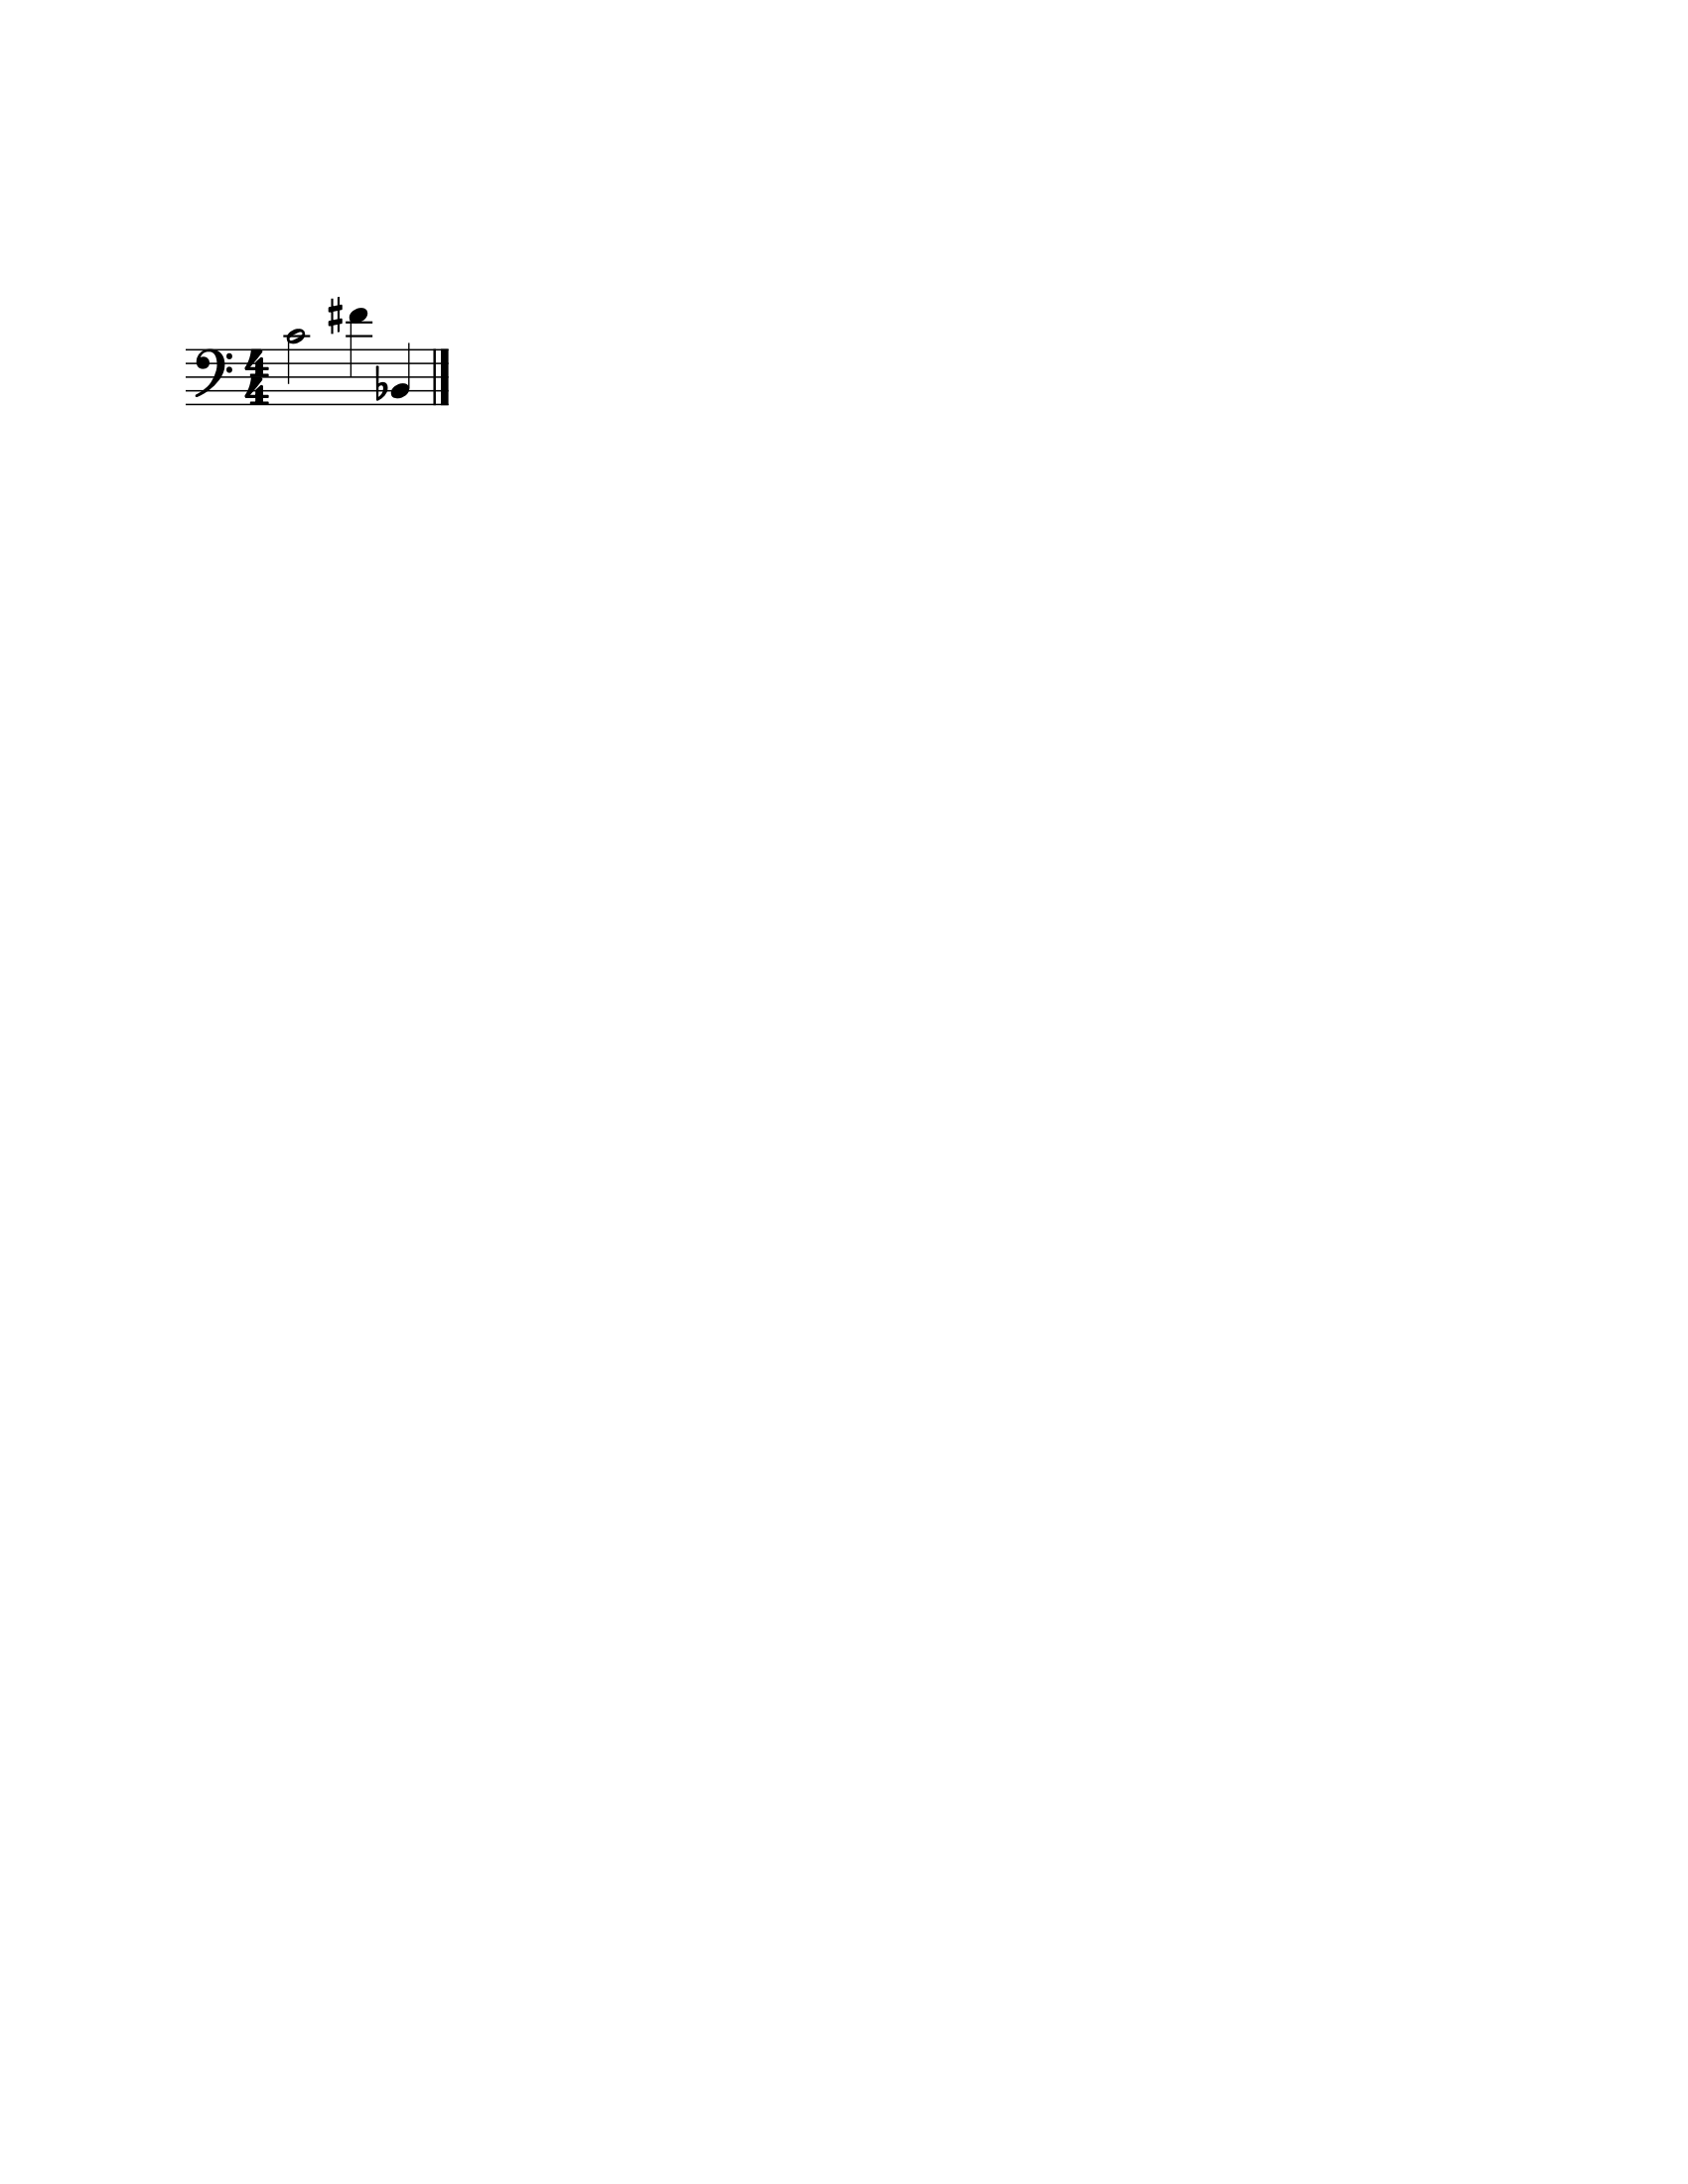

In [114]:
#Or let’s see them as a score:
stream1.show()

You might ask why is the piece in common-time (4/4)? This is just the default for new pieces, which is in the defaults module:

In [115]:
defaults.meterNumerator

4

In [116]:
defaults.meterDenominator

'quarter'

(Some of these examples use a system that automatically tries to get an appropriate time signature and appropriate clef; in this case, music21 figured out that that low B-flat would be easier to see in bass clef than treble.)

We’ll learn how to switch the TimeSignature soon enough.

In [117]:
stream1.show('text')

{0.0} <music21.note.Note C>
{2.0} <music21.note.Note F#>
{3.0} <music21.note.Note B->


This display shows the offset for each element (that is, each object in the Stream) along with what class it is, and a little bit more helpful information. The information is the same as what’s called the __repr__ (representation) of the object, which is what you get if you type its variable name at the prompt:

By the way, Streams have a __repr__ as well:

In [118]:
stream1

<music21.stream.Stream 0x12fbbb6d0>

that number at the end is the hex form of the .id of the Stream, which is a way of identifying it. Often the .id of a Stream will be the name of the Part (“Violin II”), but if it’s undefined then a somewhat random number is used (actually the location of the Stream in your computer’s memory). We can change the .id of a Stream:

In [119]:
stream1.id = 'some_notes'
stream1

<music21.stream.Stream some_notes>

We could have also changed the .id of any of our Note objects, but it doesn’t show up in the Note’s __repr__:

In [120]:
note1.id = 'my_favorite_C'
note1

<music21.note.Note C>

Now, a Stream is a Music21Object just like a Note is. This is why it has an .id attribute and, more importantly, why you can call .show() on it.`

What else makes a Music21Object what it is? It has a .duration attribute which stores a Duration object:

In [121]:
stream1.duration

<music21.duration.Duration 4.0>

In [122]:
stream1.duration.type

'whole'

In [123]:
stream1.duration.quarterLength

4.0

(Notice that the len() of a Stream, which stands for “length”, is not the same as the duration. the len() of a Stream is the number of objects stored in it, so len(stream1) is 3).

A related concept to the .duration of a Stream is its .highestTime, which is the time at which the latest element in the Stream ends. Usually this is the last element of the stream’s .offset plus its .quarterLength.

In [124]:
stream1.highestTime

4.0

#### Streams within Streams

And, as a Music21Object, a Stream can be placed inside of another Stream object. Let’s create a stream, called biggerStream (for reasons that will become obvious), that holds a Note D# at the beginning

In [125]:
biggerStream = stream.Stream()
note2 = note.Note("D#5")
biggerStream.insert(0, note2)

Now we use the .append functionality to put stream1 at the end of biggerStream:

In [126]:
biggerStream.append(stream1)

Notice that when we call .show('text') on biggerStream, we see not only the presence of note2 and stream1 but also all the contents of stream1 as well:

In [127]:
biggerStream.show("text")

{0.0} <music21.note.Note D#>
{1.0} <music21.stream.Stream some_notes>
    {0.0} <music21.note.Note C>
    {2.0} <music21.note.Note F#>
    {3.0} <music21.note.Note B->


Notice though that the offsets, the little numbers inside curly brackets, for the elements of stream1 (“some notes”) relate only to their positions within stream1, not to their position within biggerStream.

This is because each Music21Object knows its offset only in relation to its containing Stream, not necessarily to the Stream containing that Stream.

Also notice that note1 knows that it is in stream1 but doesn’t know that it is somewhere inside biggerStream:

In [128]:
note1 in stream1

True

In [129]:
note1 in biggerStream

False

All this might not seem like much of a big deal, until we tell you that in music21, Scores are made up of Streams within Streams within Streams. So if you have an orchestral score, it is a Stream, and the viola part is a Stream in that Stream, and measure 5 of the viola part is a Stream within that Stream, and, if there were a ‘’divisi’‘, then each’‘diviso’’ voice would be a Stream within that Stream. Each of these Streams has a special name and its own class (Score, Part, Measure, and Voice), but they are all types of Streams.
So how do we find note1 inside biggerStream? That’s what the next two chapters are about.
Chapter 5 covers Lists of Lists. Those with programming experience who have familiarity with lists of lists and defining functions might want to skip to Chapter 6 Streams of Streams.

## Chapter 5 : Lists of Lists, functions and Recursion

In this chapter we will work on how to exploit the power of nested Streams. We’ll begin with a discussion of recursive lists (since Streams work a lot like lists). Those with some programming will probably want to skip to the following section.

### Lists of Lists

Lists (similar to Arrays in other languages) can hold all sorts of other things inside them including other lists. So let’s begin by creating two lists:

In [130]:
listA = [10, 20, 30]
listB = [1, 2, 3, listA]

In [131]:
for number in listB:
    print(number)

1
2
3
[10, 20, 30]


The isinstance() test is something i didn't know about. It allows to get elements inside a nested list more easily

In [132]:
for thing in listB:
    if isinstance(thing, list):
        for number in thing:
            print(number)
    else:
        print(thing)

1
2
3
10
20
30


if isinstance(thing, list): checks if the thing is a list. If that is True then we get to an inner loop, where we look at “thing” (which in this case is listA, but the program doesn’t know that) and get the “number” from it.

But if “thing” is not a list, that’s where the else comes in, which is what we run if we don’t have a list, which just says, print the number.

(We’re assuming in this case that there are only two types of things in listB, numbers and other lists.) If you get an error, be sure not to forget the ending “:” or to indent the next line.

### Functions and recursions

But what if we did this:

In [133]:
listC = [100, 200, 300, listB]

Now since listB contains listA, we end up with a list within a list within a list:

In [134]:
listC

[100, 200, 300, [1, 2, 3, [10, 20, 30]]]

If we wanted to print all the numbers in listC, we could write an ugly set of commands like this one (I’ll understand if you don’t actually want to type this and just want to trust me that this works):

In [135]:
for thing in listC:
    if isinstance(thing, list):
        for innerThing in thing:
            if isinstance(innerThing, list):
                for number in innerThing:
                    print(number)
            else:
                print(innerThing)
    else:
        print(thing)

100
200
300
1
2
3
10
20
30


Whew! If this were the only way to do it, I wouldn’t blame you if you decided that programming just wasn’t worth the headache. Especially since you’ve probably already guessed that we could make: listD = [4, 5, listC, 6, 7] and get another layer of lists. Fortunately, there’s a little bit of programming magic called “recursion” that we can use to get to the heart of the matter. Notice that in the code I just wrote, there are a few lines that are basically the same (with a few words changed) as other parts of the code. With recursive coding, we’ll find a way to save those lines to reuse them. Type these six lines:

In [136]:
def flatPrint(myList):
    for thing in myList:
        if isinstance(thing, list):
            flatPrint(thing)
        else:
            print(thing)

What we’ve done is created a new function called ‘’flatPrint’’ which reaches into lists of lists and prints anything that is in them.

Now try:

In [137]:
flatPrint(listC)

100
200
300
1
2
3
10
20
30


## Chapter 6 : Streams, Hierarchies, Recursion and Flattening

In [138]:
#Variables Reset :
note1 = note.Note("C4")
note1.duration.type = 'half'
note2 = note.Note("F#4")
note3 = note.Note("B-2")

stream1 = stream.Stream()
stream1.id = 'some notes'
stream1.append(note1)
stream1.append(note2)
stream1.append(note3)

biggerStream = stream.Stream()
note2 = note.Note("D#5")
biggerStream.insert(0, note2)
biggerStream.append(stream1)

### Classes and Subclasses

An object, such as a note or pitch, is basically a collection of information along with some actions that can be performed on that information. A class is something that can make new objects of a certain type (sometimes this is called a factory). We’ve seen classes such as the note.Note class, where the lowercase note is the “module” that the class Note lives in:

We create an object from a class by using the class name with () after it:

In [139]:
n = note.Note()
n

<music21.note.Note C>

As we’ve seen, we can sometimes put additional information into the (), such as a pitch name in the case of a Note:

In [140]:
d = note.Note('D#5')
d

<music21.note.Note D#>

The variable d is now a Note object created from the Note class. It’s all a bit confusing, I know. But we’ll get to the point in a second. If you want to find out more about what a Note object can do, the best thing is to read the music21 instruction manual. :-) But for any class in Python, you can use the function help(Class) to find out what it can do:

In [141]:
help(note)

Help on module music21.note in music21:

NAME
    music21.note - Classes and functions for creating Notes, Rests, and Lyrics.

DESCRIPTION
    The :class:`~music21.pitch.Pitch` object is stored within,
    and used to configure, :class:`~music21.note.Note` objects.

CLASSES
    music21.base.Music21Object(music21.prebase.ProtoM21Object)
        GeneralNote
            NotRest
                Note
                Unpitched
            Rest
    music21.exceptions21.Music21Exception(builtins.Exception)
        LyricException
        NotRestException
        NoteException
    music21.prebase.ProtoM21Object(builtins.object)
        Lyric(music21.prebase.ProtoM21Object, music21.style.StyleMixin)
    music21.style.StyleMixin(music21.common.objects.SlottedObjectMixin)
        Lyric(music21.prebase.ProtoM21Object, music21.style.StyleMixin)
    
    class GeneralNote(music21.base.Music21Object)
     |  GeneralNote(*, duration: 't.Optional[Duration]' = None, lyric: 't.Union[None, str, Lyric]' = No

So classes and subclasses are a great way of making sure that things that are mostly similar have many of the same properties, but that they can have their own distinct information (attributes) and actions (methods). Just FYI, here’s how we create a subclass. We can create a Class called Japan and then a subclass called Okinawa (my ancestral home) which has an additional attribute.

In [142]:
class Japan:
    food = "sushi"
    drink = "sake"

class Okinawa(Japan):
    evenBetterFood = "spam potstickers"

The (Japan) in the class definition of Okinawa means that it inherits everything that Japan has and more:

In [143]:
o = Okinawa()
print(o.food, o.drink, o.evenBetterFood)

sushi sake spam potstickers


The first subclasses we will be working with are the three fundamental subclasses of Stream: Score, Part, and Measure.

### Accessing Scores, Parts, Measures, and Notes

Streams provide a way to structure and position music21 objects both hierarchically and temporally.

A Stream, or a Stream subclass such as Measure, can be placed within another Stream.

A common arrangement of nested Streams is a Score Stream containing one or more Part Streams, each Part Stream in turn containing one or more Measure Streams.

Such an arrangement of Stream objects is the common way musical scores are represented in music21. For example, importing a four-part chorale by J. S. Bach will provide a Score object with four Part Streams, each Part containing multiple Measure objects. 

Music21 comes with a music21.corpus module that provides access to a large collection of scores, including all the Bach chorales. We can parse the score from the corpus with the parse() function, which we will discuss more in a bit.

In [144]:
sBach = corpus.parse('bach/bwv57.8')

We can access and examine elements at each level of this Score by using standard Python syntax for lists within lists. Thus, we can see the length of each component: first the Score which has six elements: a Metadata object, a StaffGroup object, and four Part objects. Then we find the length of first Part at index three which indicates 14 objects (13 of them are measures). Then within that part we find an object (a Measure) at index 1. All of these subprograms can be accessed from looking within the same score object sBach.

In [145]:
len(sBach)

9

In [146]:
len(sBach[3])

14

In [147]:
len(sBach[3][1])

7

But how did we know that index [3] would be a Part and index [1][1] would be a measure? As writers of the tutorial, we know this piece well enough to know that. But as we noted above, more than just Measures might be stored in a Part object (such as Instrument objects), and more than just Note and Rest objects might be stored in a Measure (such as TimeSignature and KeySignature objects). Therefore, it’s much safer to filter Stream and Stream subclasses by the class we seek.
To repeat the count and select specific classes, we can use the getElementsByClass() method that we discussed in Chapter 4.

Notice how the counts deviate from the examples above.

In [148]:
len(sBach.getElementsByClass(stream.Part))

4

In [149]:
len(sBach.getElementsByClass(stream.Part)[0].getElementsByClass(stream.Measure))

13

In [150]:
len(sBach.getElementsByClass(stream.Part)[0].getElementsByClass(
        stream.Measure)[1].getElementsByClass(note.Note))

3

Recall from Chapter 4 that the getElementsByClass() method can also take a string representation of the last section of the class name. Thus we could’ve rewritten the first call above as:

In [151]:
len(sBach.getElementsByClass('Part'))

4

This way of doing things is a bit faster to code, but a little less safe. Suppose, for instance there were objects of type stream.Measure and tape.Measure; the latter way of writing the code would get both of them. (But this ambiguity is rare enough that it’s safe enough to use the strings in most code.)
When we introduced .getElementsByClass() we also introduced the convenience properties .notes and .notesAndRests. There is a convenience property for getting parts out as well:

In [152]:
len(sBach.parts)

4

You might think that there should be a convenience property .measures to get all the measures. But the problem with that is that measure numbers would be quite different from index numbers. For instance, most pieces (that don’t have pickup measures) begin with measure 1, not zero. Sometimes there are measure discontinuities within a piece (e.g., some people number first and second endings with the same measure number).

For that reason, gathering Measures is best accomplished not with getElementsByClass(stream.Measure) but instead with either the measures() method (returning a Stream of Parts or Measures) or the measure() method (returning a single Measure).
These are methods, not properties, so they use the () call. Let’s look at how we might use them:

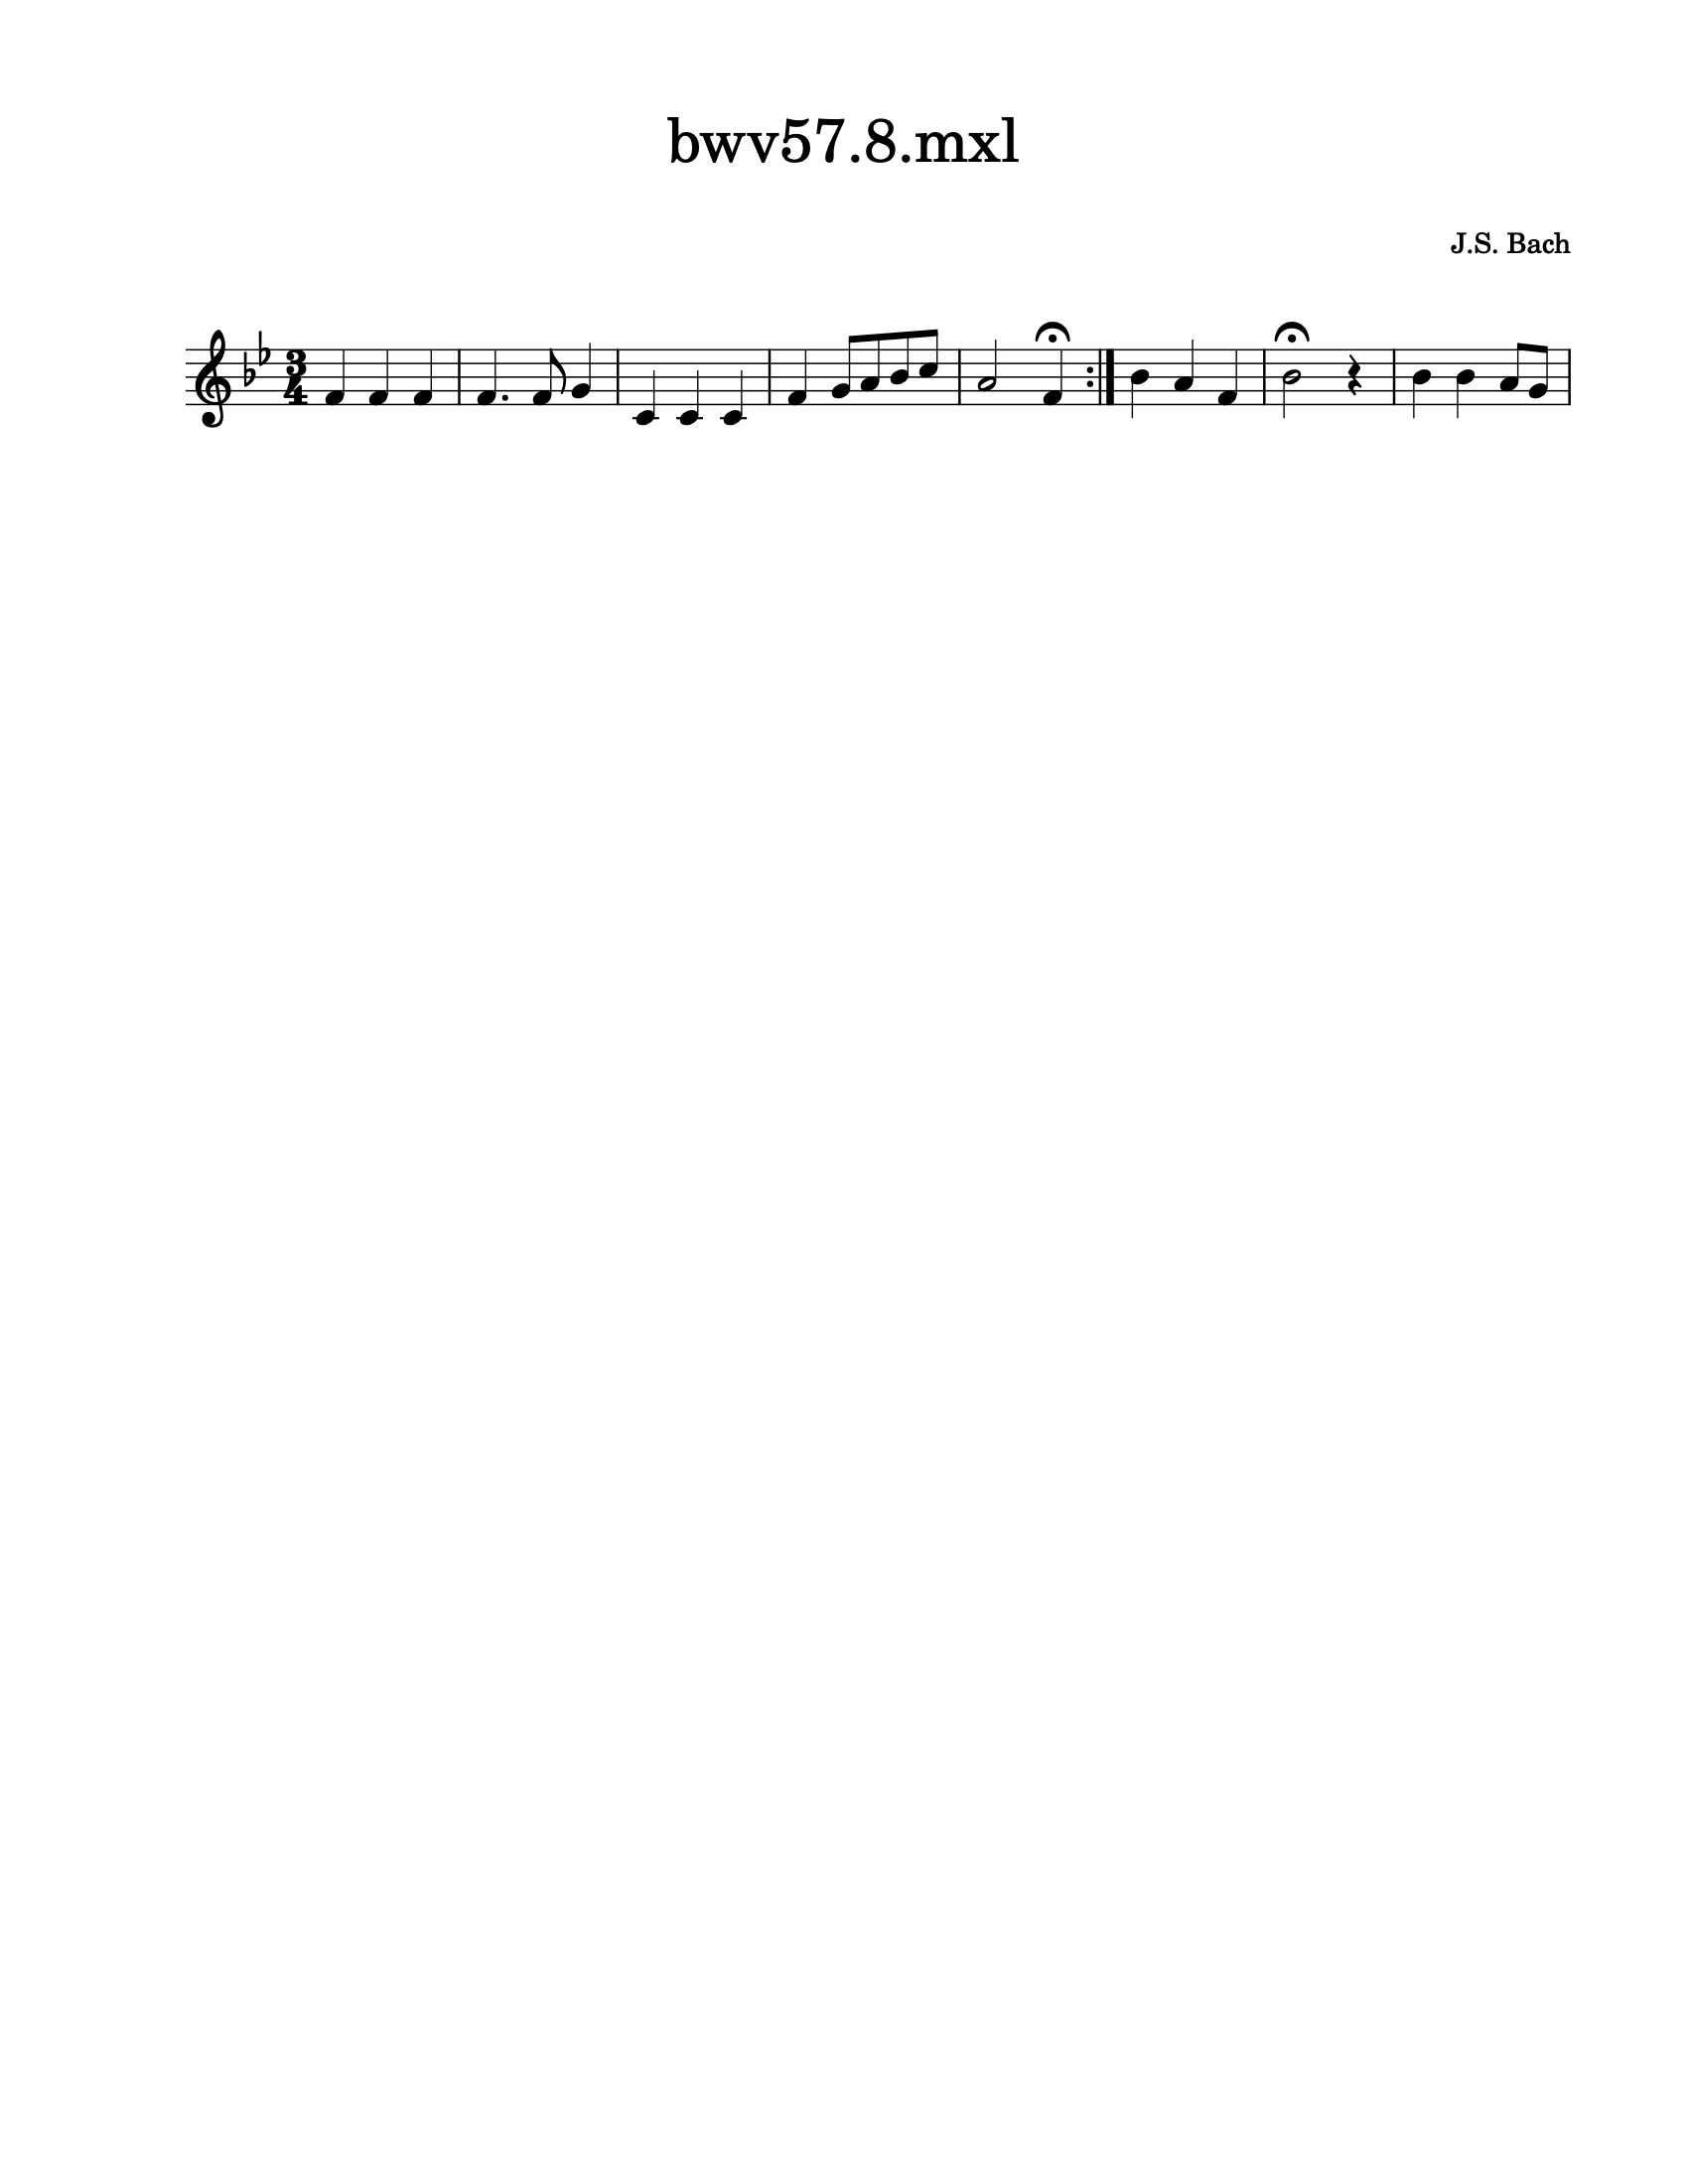

In [153]:
alto = sBach.parts[1]  # parts count from zero, so soprano is 0 and alto is 1
excerpt = alto.measures(1,8)
excerpt.show()

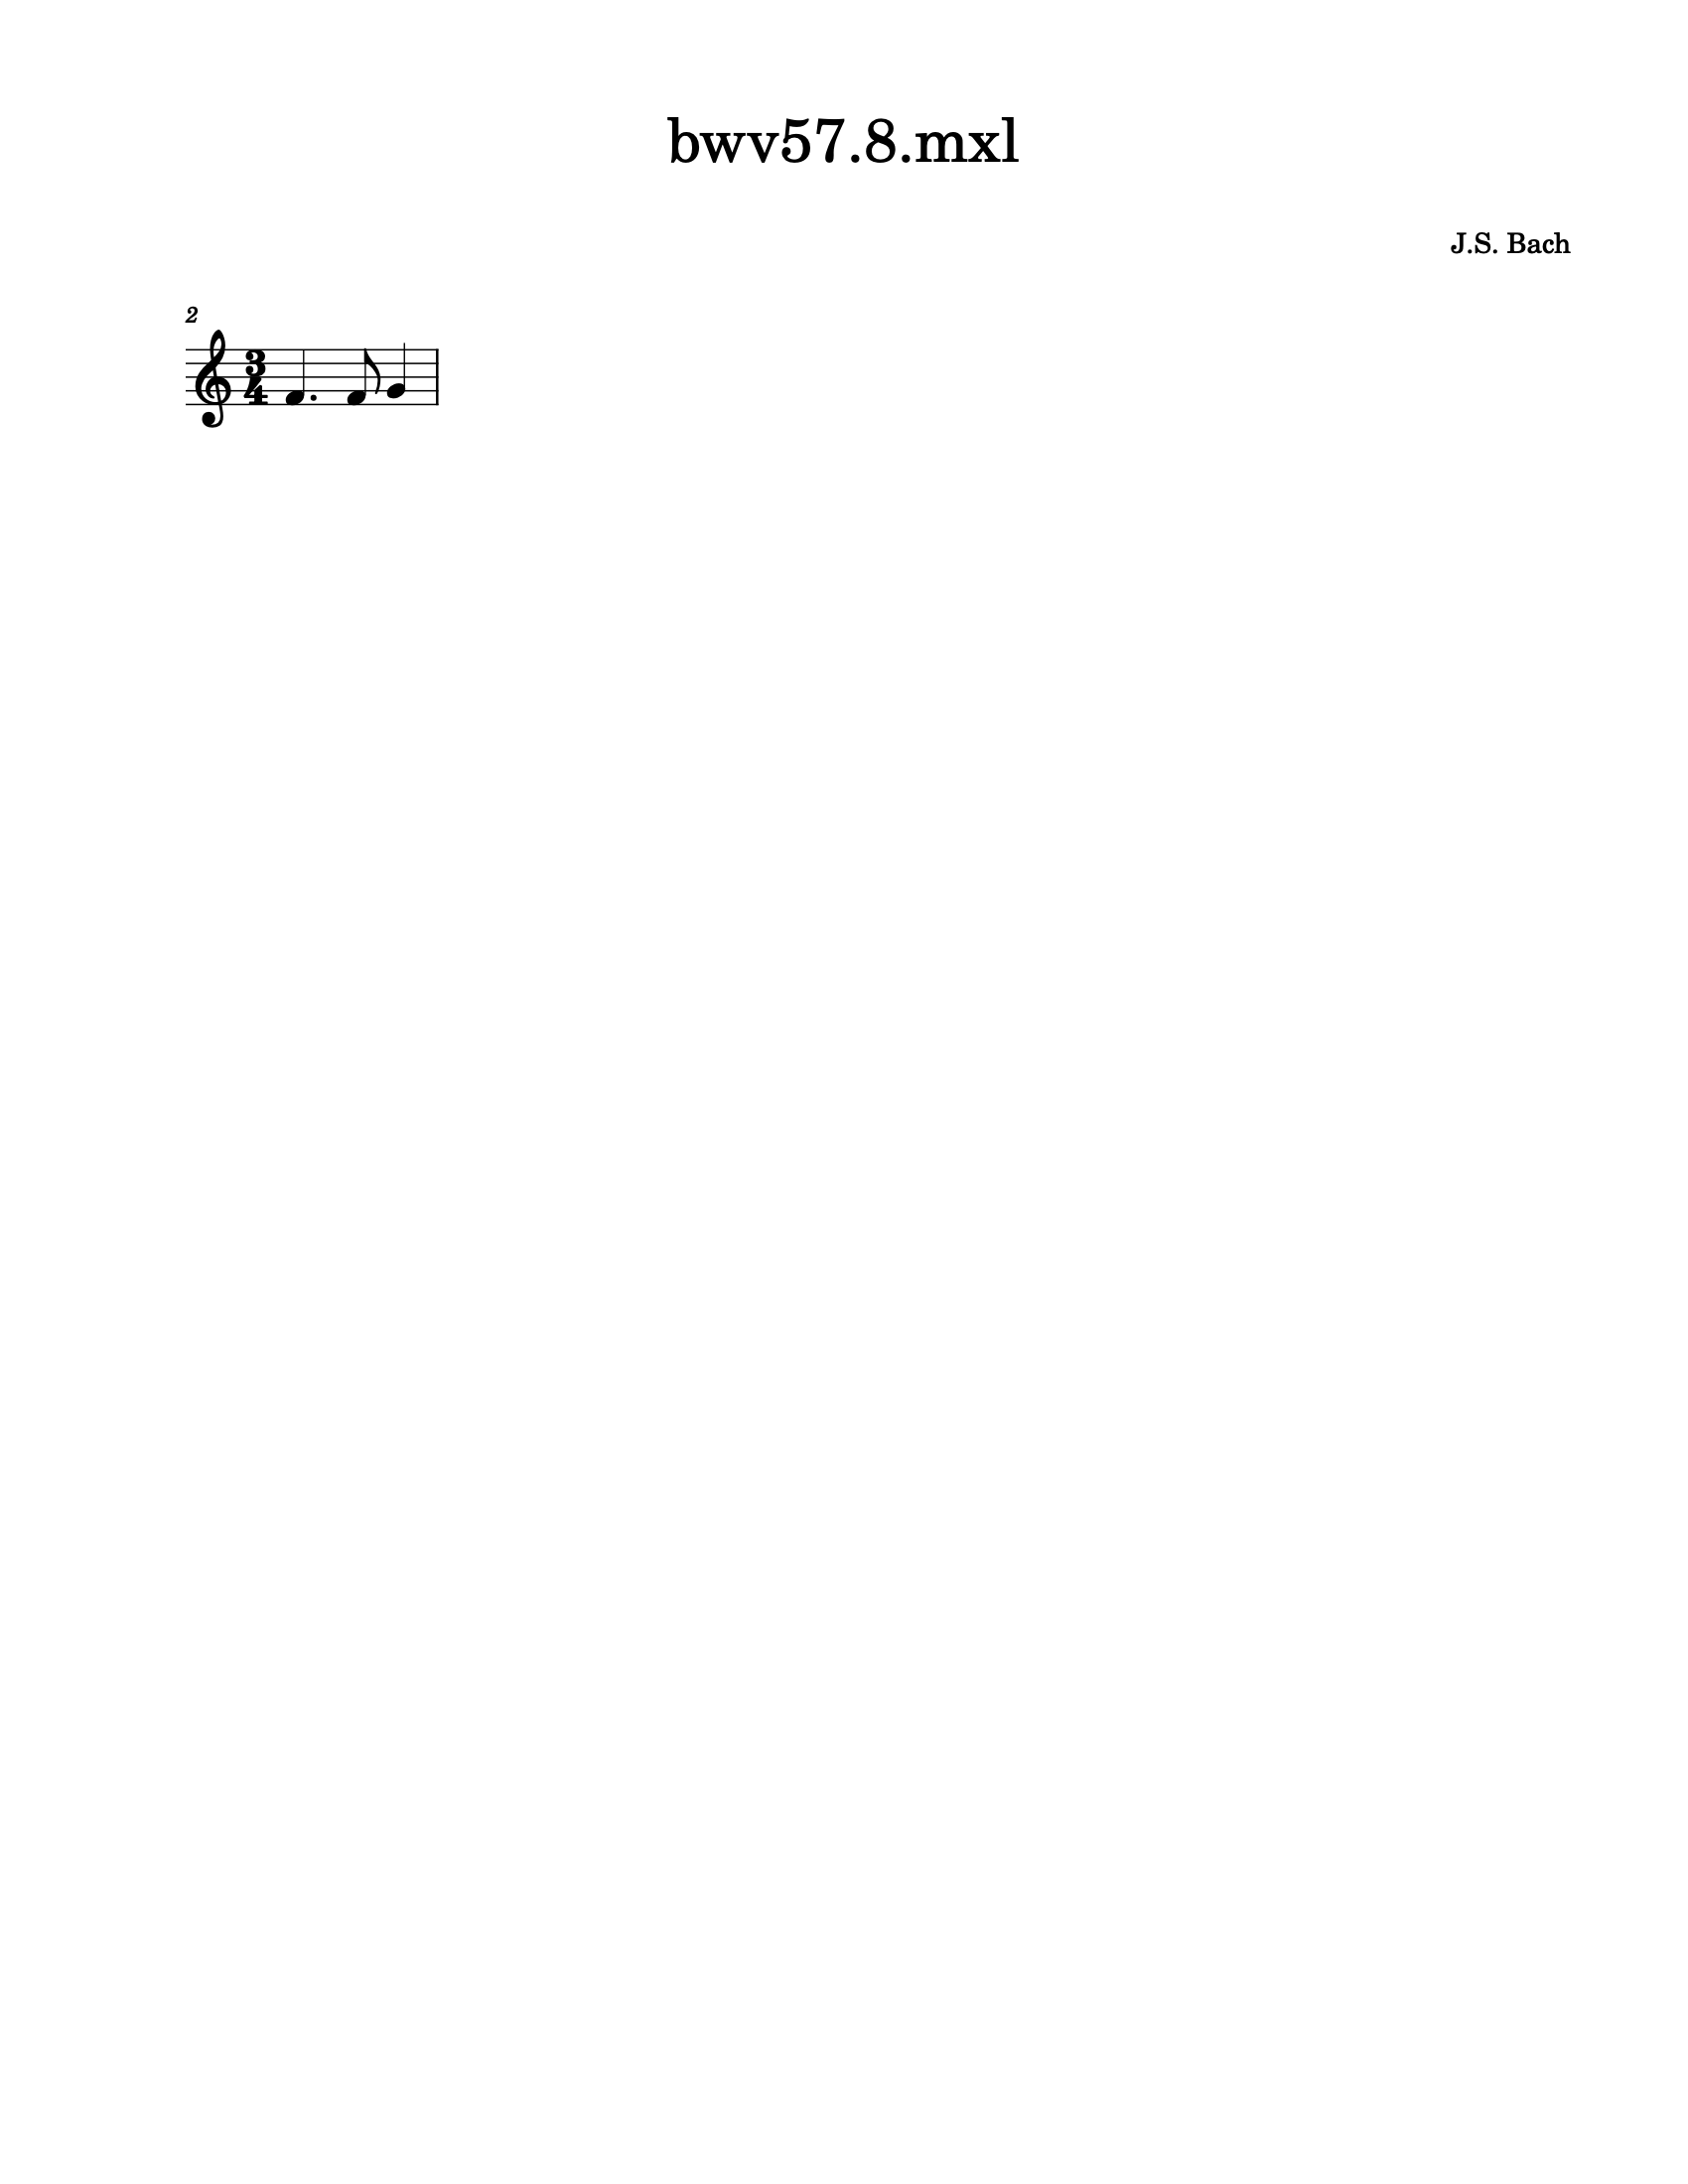

In [154]:
measure2 = alto.measure(2)  # measure not measure_s_
measure2.show()

What is great about .measure() and .measures() is that they can work on a whole score and not just a single part. Sometimes computational musicologists and programmers call a collection of measures across parts a “measureStack”. So let’s get the measure stack consisting of measure numbers 2 and 3 across all parts:

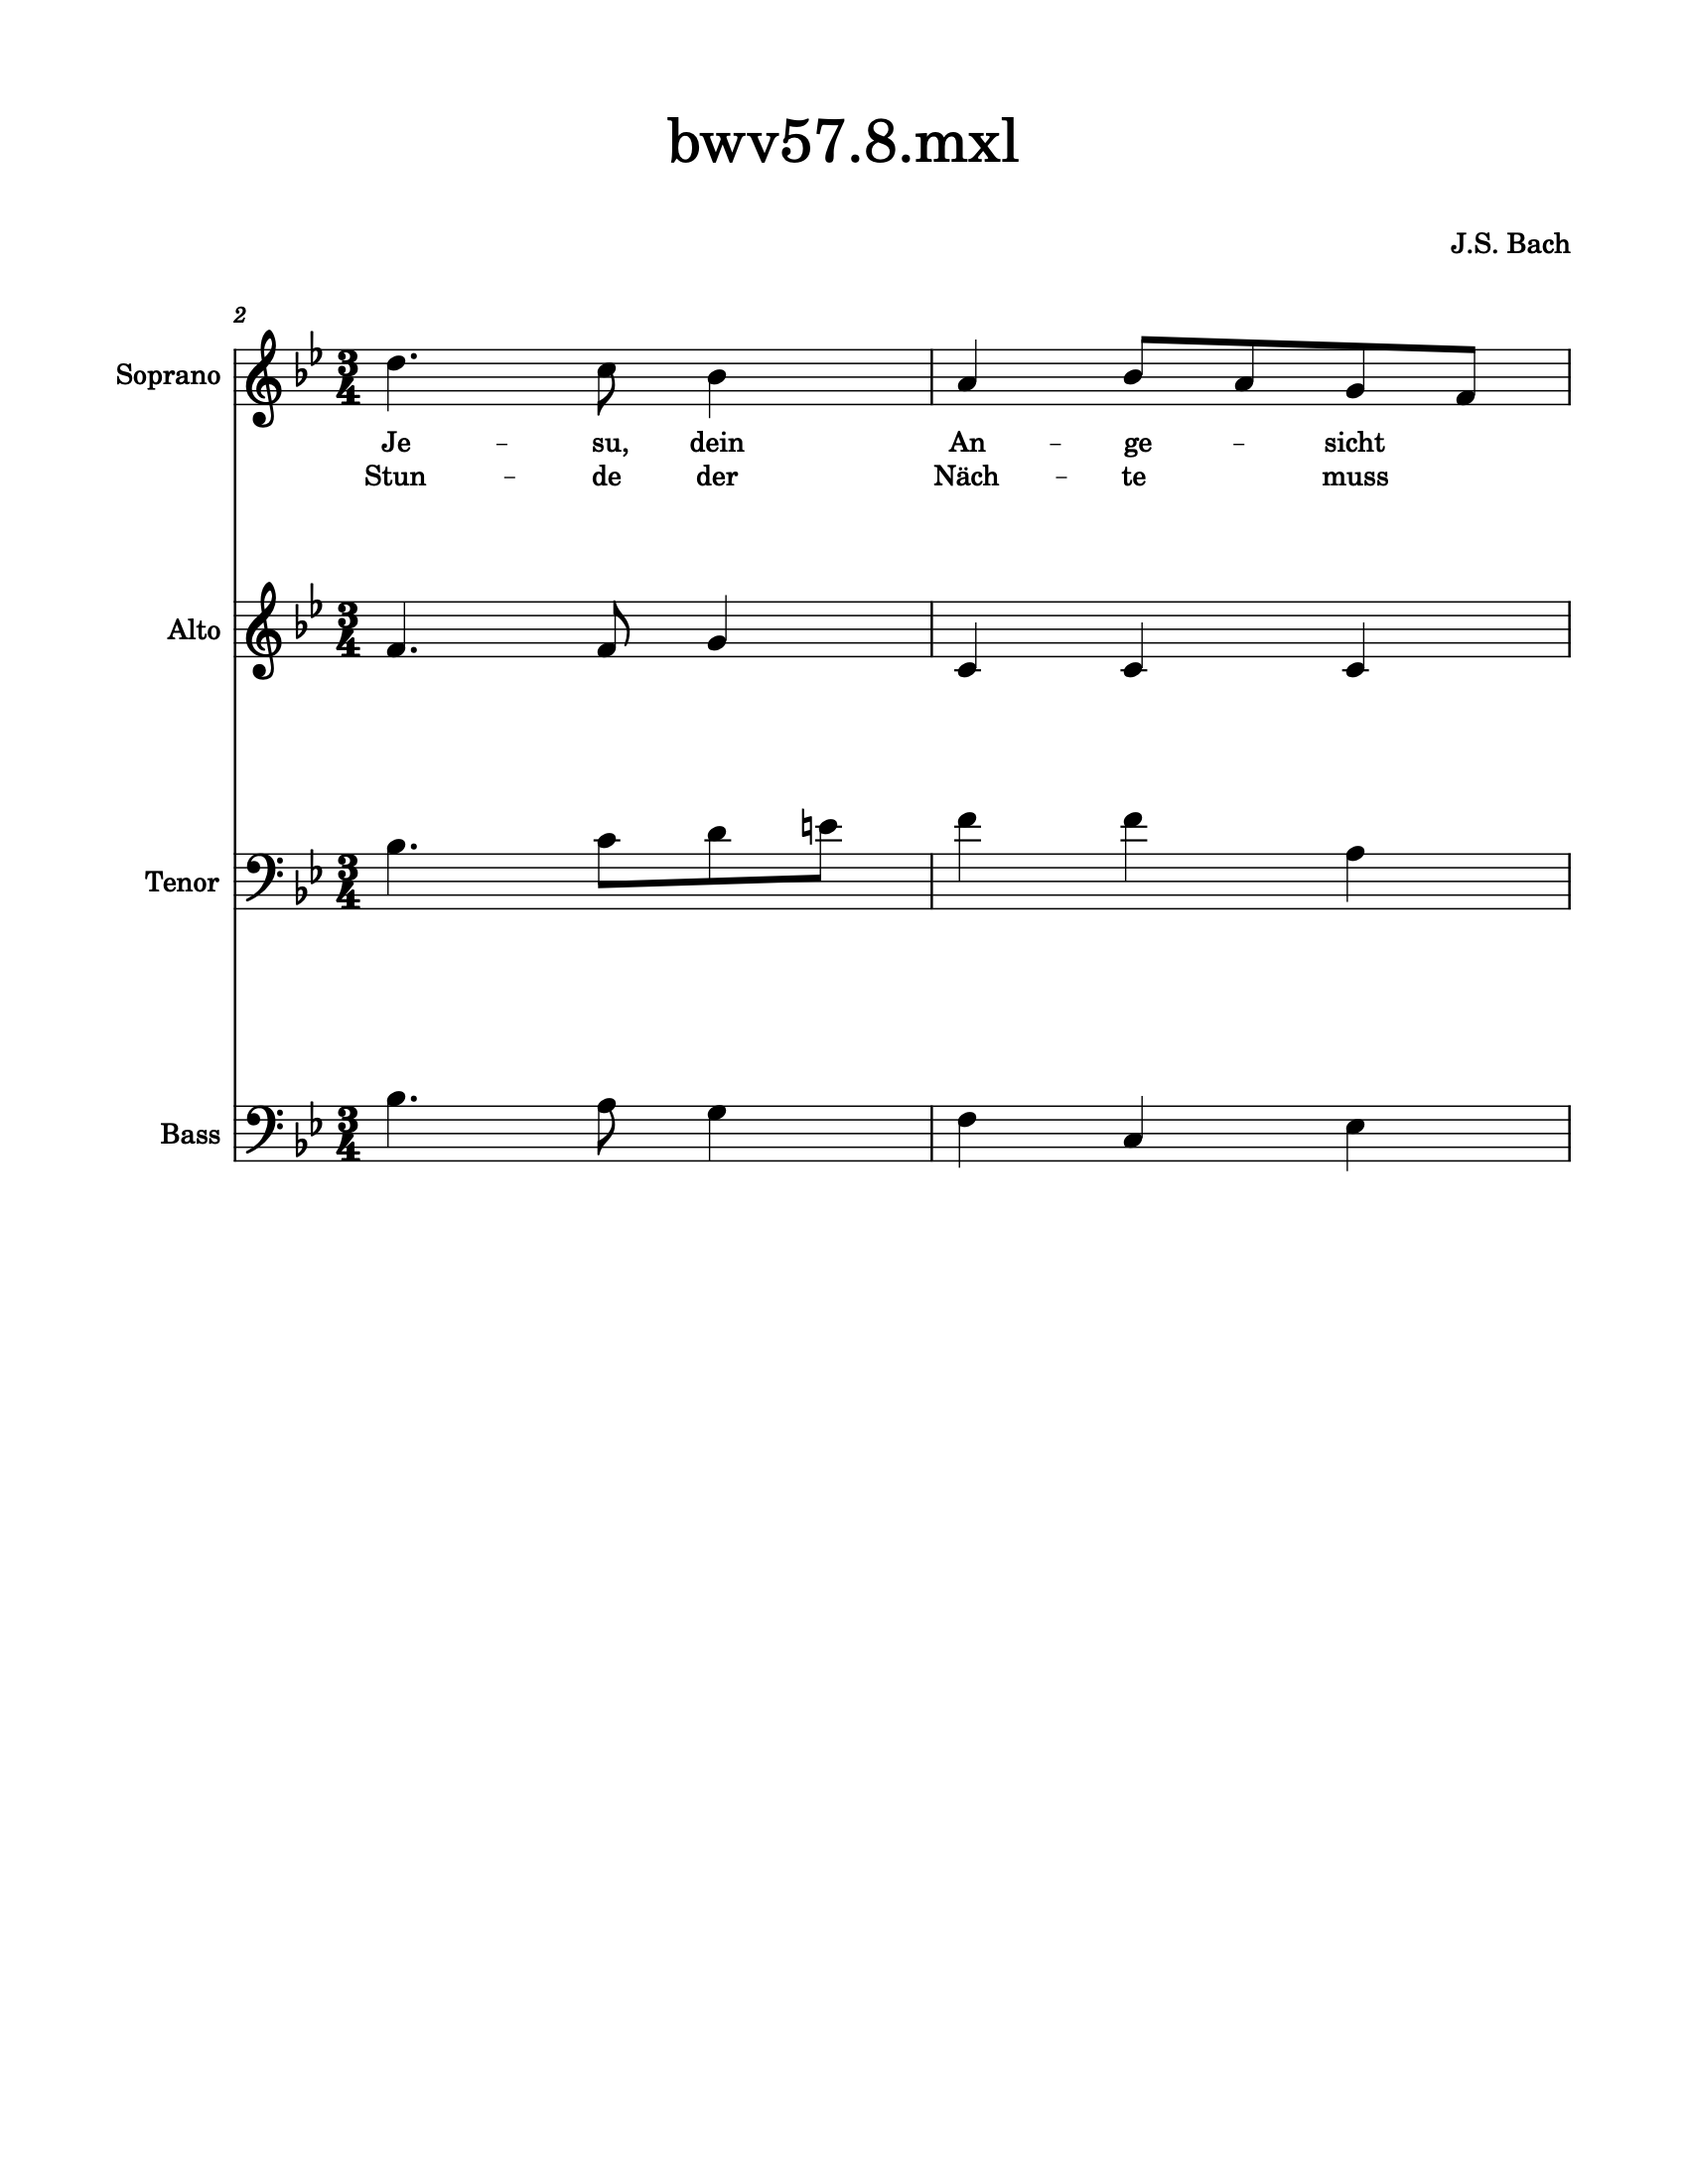

In [155]:
measureStack = sBach.measures(2, 3)
measureStack.show()
#This shows clearly the 4 parts of our Score (Soprano, Alto, Tenor and Bass)

### Recursion in streams

Streams are hierarchical objects where the contained elements can themselves be Streams. In order to get at each lower layer of the stream, a generator method on every stream called recurse() will visit every element in the stream, starting from the beginning, and if any of the subelements are also Streams, they will visit every element in that Stream.
Let’s create a simpler Stream to visualize what .recurse() does.

In [156]:
s = stream.Score(id='mainScore')
p0 = stream.Part(id='part0')
p1 = stream.Part(id='part1')

m01 = stream.Measure(number=1)
m01.append(note.Note('C', type="whole"))
m02 = stream.Measure(number=2)
m02.append(note.Note('D', type="whole"))
p0.append([m01, m02])

m11 = stream.Measure(number=1)
m11.append(note.Note('E', type="whole"))
m12 = stream.Measure(number=2)
m12.append(note.Note('F', type="whole"))
p1.append([m11, m12])

s.insert(0, p0)
s.insert(0, p1)
s.show('text')

{0.0} <music21.stream.Part part0>
    {0.0} <music21.stream.Measure 1 offset=0.0>
        {0.0} <music21.note.Note C>
    {4.0} <music21.stream.Measure 2 offset=4.0>
        {0.0} <music21.note.Note D>
{0.0} <music21.stream.Part part1>
    {0.0} <music21.stream.Measure 1 offset=0.0>
        {0.0} <music21.note.Note E>
    {4.0} <music21.stream.Measure 2 offset=4.0>
        {0.0} <music21.note.Note F>


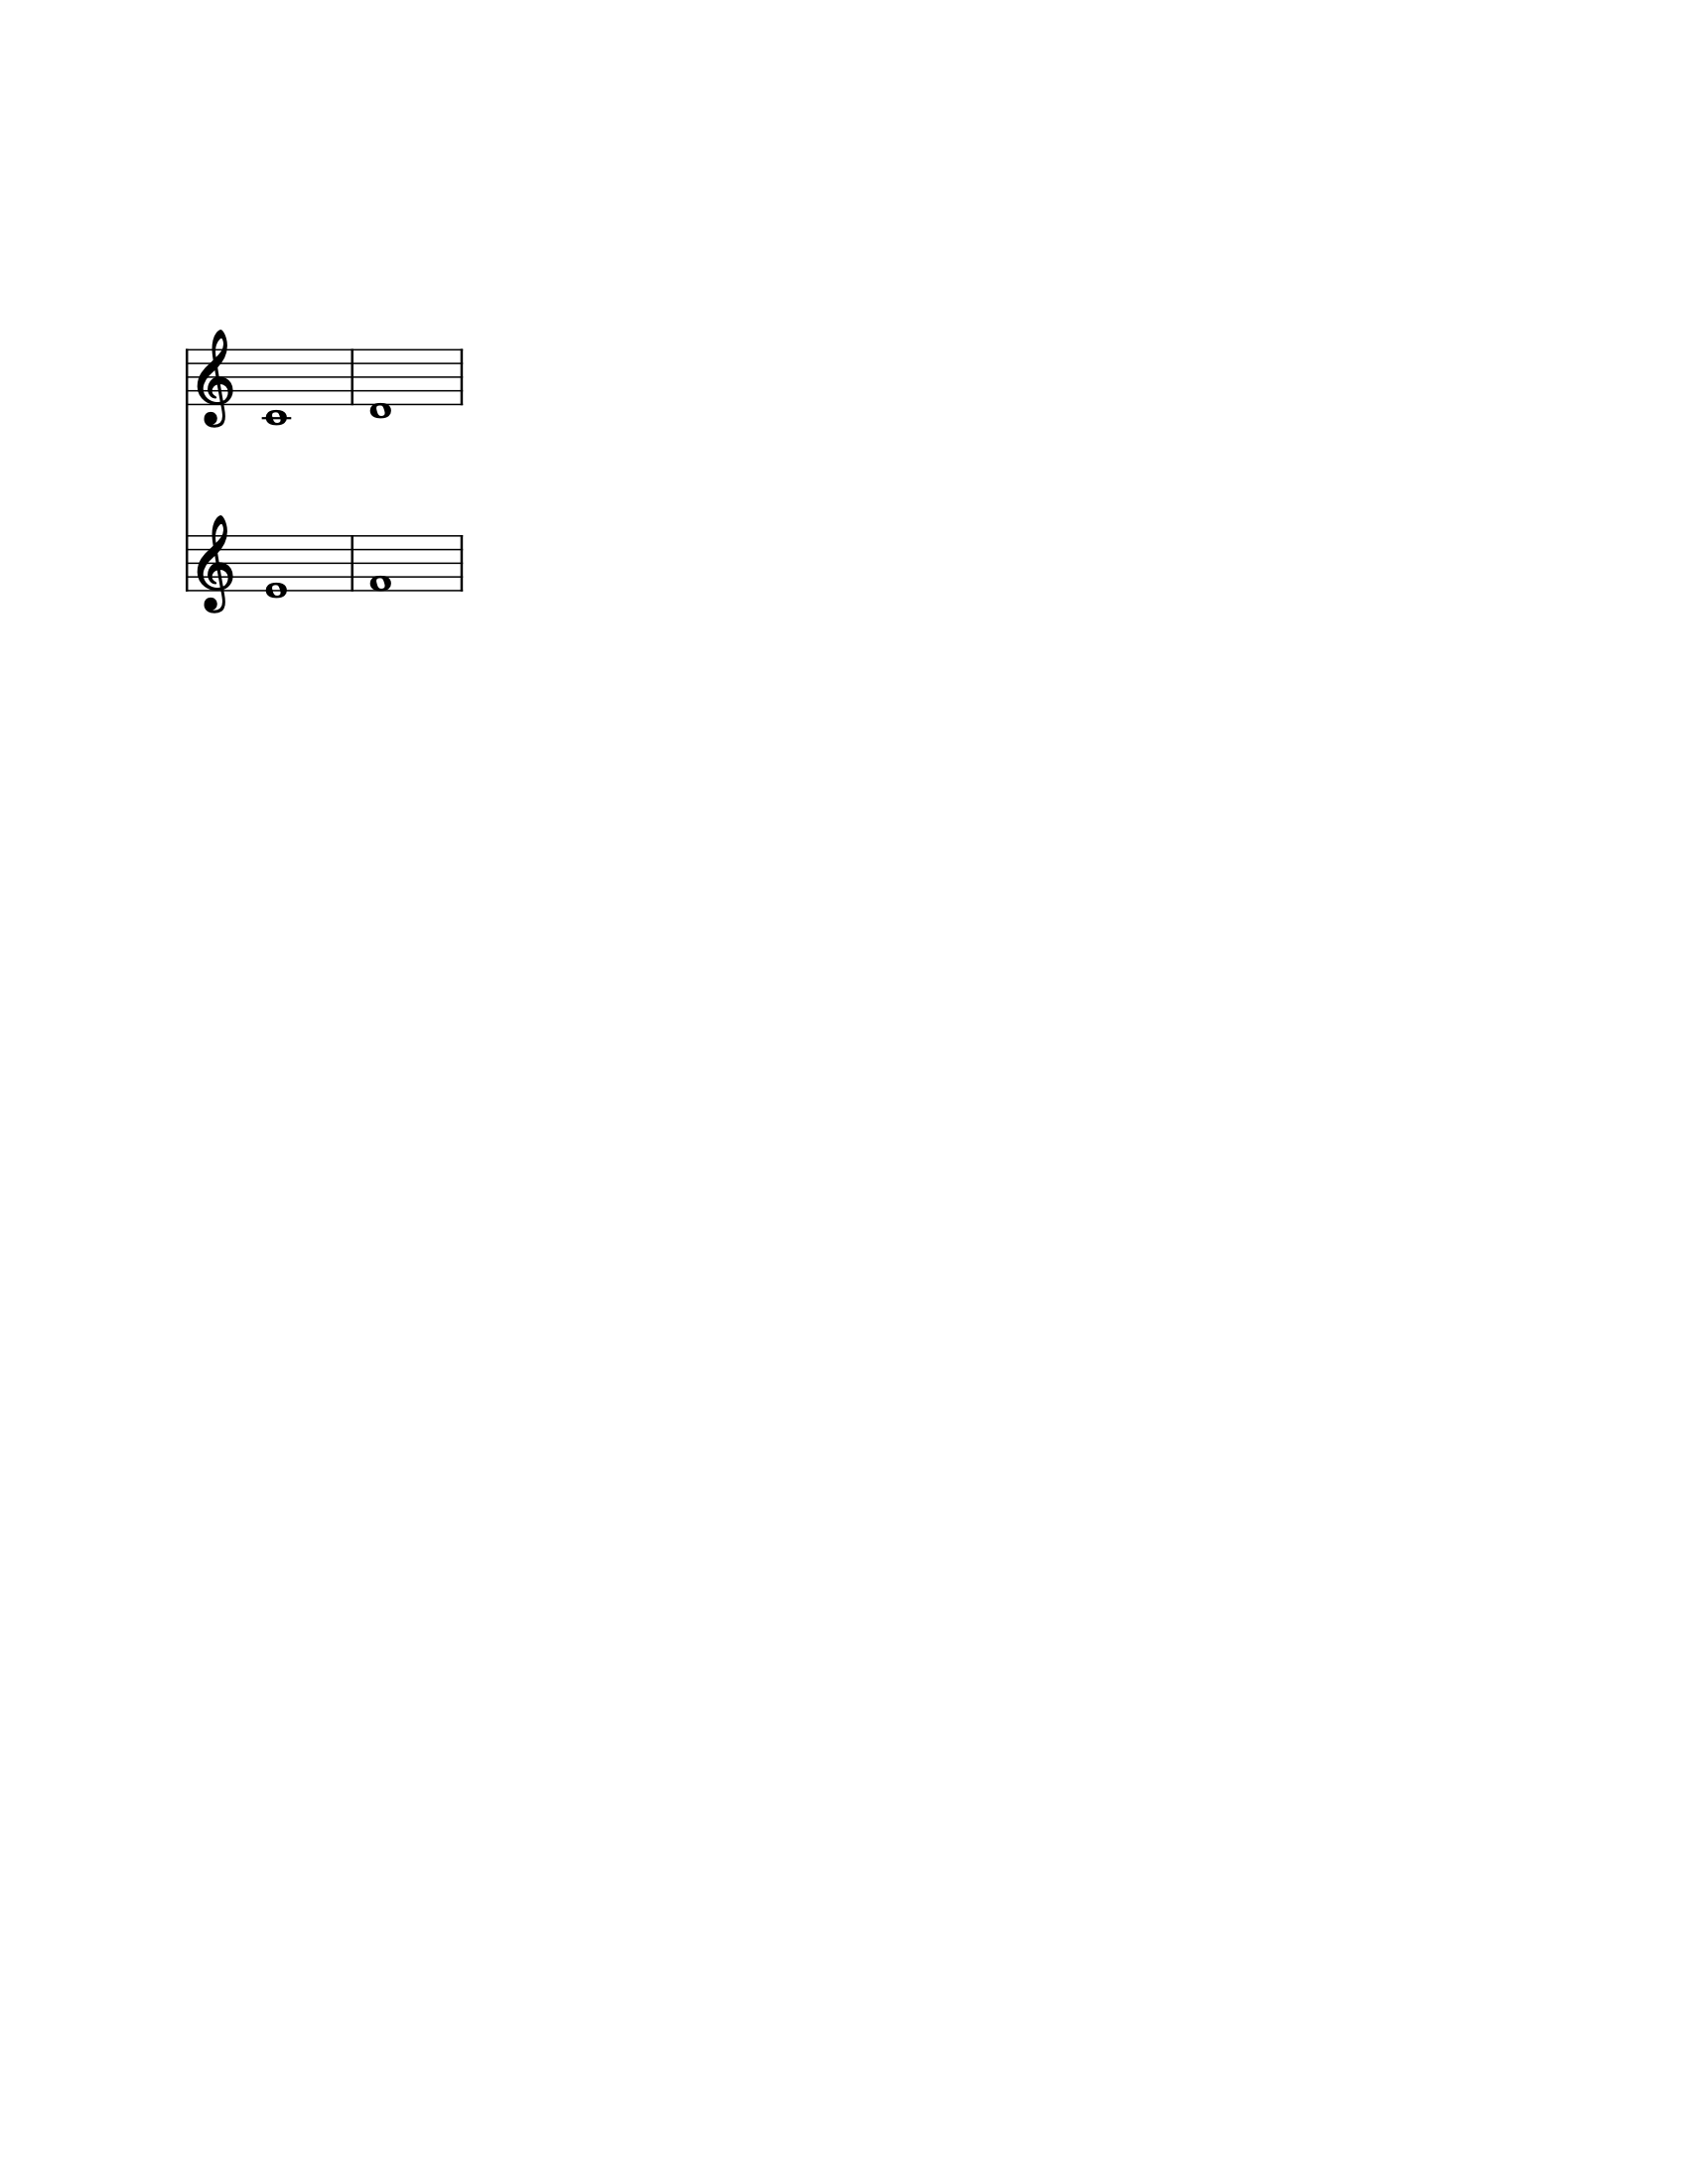

In [157]:
s.show()

Calling .recurse() on its own isn’t very useful.

In [158]:
recurseScore = s.recurse()

In [159]:
recurseScore

<music21.stream.iterator.RecursiveIterator for Score:mainScore @:0>

Where it becomes useful is in a for loop:

In [160]:
for el in s.recurse():
    print(el.offset, el, el.activeSite)

0.0 <music21.stream.Part part0> <music21.stream.Score mainScore>
0.0 <music21.stream.Measure 1 offset=0.0> <music21.stream.Part part0>
0.0 <music21.note.Note C> <music21.stream.Measure 1 offset=0.0>
4.0 <music21.stream.Measure 2 offset=4.0> <music21.stream.Part part0>
0.0 <music21.note.Note D> <music21.stream.Measure 2 offset=4.0>
0.0 <music21.stream.Part part1> <music21.stream.Score mainScore>
0.0 <music21.stream.Measure 1 offset=0.0> <music21.stream.Part part1>
0.0 <music21.note.Note E> <music21.stream.Measure 1 offset=0.0>
4.0 <music21.stream.Measure 2 offset=4.0> <music21.stream.Part part1>
0.0 <music21.note.Note F> <music21.stream.Measure 2 offset=4.0>


This example also introduces the concept of .activeSite, which for now can be thought of as the Stream that the element lives in; though we’ll find that Notes and other elements can be in multiple Streams simultaneously, and this is just the one that they are most recently associated with.
There are a lot of things that we can do with .recurse(), but let’s just introduce one more thing for now. Most “filtering” mechanisms, such as .notes can also be applied between the () of recurse() and the : at the end:

In [161]:
for el in s.recurse().notes:
    print(el.offset, el, el.activeSite)

0.0 <music21.note.Note C> <music21.stream.Measure 1 offset=0.0>
0.0 <music21.note.Note D> <music21.stream.Measure 2 offset=4.0>
0.0 <music21.note.Note E> <music21.stream.Measure 1 offset=0.0>
0.0 <music21.note.Note F> <music21.stream.Measure 2 offset=4.0>


IMPORTANT NOTE : .recurse() is a generator in music21. Thus, it can only be used in for loops and other things that iterate over each member of a list. To treat the results of .recurse() as a list, you need to wrap it with a list() call like so:

In [162]:
#listRecurse = list(sBach.recurse())

In general, .recurse() is the best way to work through all the elements of a Stream, but there is another way that can be handy in some situations, and that is called .flatten().

### Flattening a stream

While nested Streams offer expressive flexibility, it is often useful to be able to flatten all Stream and Stream subclasses into a single Stream containing only the elements that are not Stream subclasses. The flatten() property provides immediate access to such a flat representation of a Stream. For example, doing a similar count of components, such as that show above, we see that we cannot get to all of the Note objects of a complete Score until we flatten its Part and Measure objects by accessing the flat attribute. Note that for historical reasons, .flat is a property, so you do not use () around it.

Let’s look at what .flatten() does to the example score we created.

In [163]:
for el in s.flatten():
    print(el.offset, el, el.activeSite)

0.0 <music21.note.Note C> <music21.stream.Score mainScore_flat>
0.0 <music21.note.Note E> <music21.stream.Score mainScore_flat>
4.0 <music21.note.Note D> <music21.stream.Score mainScore_flat>
4.0 <music21.note.Note F> <music21.stream.Score mainScore_flat>


A new, temporary Stream with id of “mainScore_flat” has been created, and all of the Note objects are in there. We didn’t filter out non-Notes: .flat automatically removes all Stream objects and in this case there’s nothing else but Notes in there.

All the Note objects are now in the new temporary mainScore_flat object, and their offsets are no longer all 0.0, but are instead measured from the start of the score being flattened. So the whole notes in measure 2 are given offset 4.

Compare what .flatten() lets you do when looking at a larger score.
There are no Notes in the sBach stream…

In [164]:
len(sBach.getElementsByClass(note.Note))

0

…they are all inside Measures inside Parts inside the stream. (in a more complex score, they may be in Voices inside Measures inside Parts, etc.). But they are all inside the flat version of the Stream:

In [165]:
len(sBach.flatten().getElementsByClass(note.Note))

150

Element offsets are always relative to the Stream that contains them. For example, a Measure, when placed in a Stream, might have an offset of 16. This offset describes the position of the Measure in the Stream. Components of this Measure, such as Notes, have offset values relative only to their container, the Measure.

The first Note of this Measure, then, has an offset of 0. In the following example we find that the offset of measure eight (using the getOffsetBySite() method) is 21; the offset of the second Note in this Measure (index 1), however, is 1.

In [166]:
m = sBach.parts[0].getElementsByClass('Measure')[7]
m.getOffsetBySite(sBach.parts[0])

21.0

In [167]:
n = sBach.parts[0].measure(8).notes[1]
n

<music21.note.Note E->

In [168]:
n.getOffsetBySite(m)

1.0

Flattening a structure of nested Streams will set new, shifted offsets for each of the elements on the Stream, reflecting their appropriate position in the context of the Stream from which the flat property was accessed. For example, if a flat version of the first part of the Bach chorale is obtained, the note defined above has the appropriate offset of 22 (the Measure offset of 21 plus the Note offset within this Measure of 1).

In [169]:
pFlat = sBach.parts[0].flatten()
indexN = pFlat.index(n)
pFlat[indexN]

<music21.note.Note E->

In [170]:
pFlat[indexN].offset

22.0

As an aside, it is important to recognize that the offset of the Note has not been edited; instead, a Note, as all Music21Objects, can store multiple pairs of sites and offsets. 

Music21Objects retain an offset relative to all Stream or Stream subclasses they are contained within, even if just in passing.

(Note that if you are on a version of music21 before v.7, instead of .flatten() you would write .flat without the parentheses)

There’s still a lot more to learn about Streams, but we can do that later. For now, let’s move on to Chapter 7: Chords.

## Chapter 7 : Chords


Chords, as the name might suggest, are objects that combine multiple Pitch objects on a single stem. They can be found in the music21.chord module.

The most general way to create a Chord object is by passing in a list of pitch names you want in the chord:

In [171]:
from music21 import *
cMinor = chord.Chord(["C4","G4","E-5"])

Note and Chord objects, since both are subclasses of the GeneralNote object share many features in common:

In [172]:
cMinor.duration.type = 'half'
cMinor.quarterLength

2.0

But since a Chord contains many pitches, it does not have a .pitch attribute:

In [173]:
cMinor.pitch

AttributeError: 'Chord' object has no attribute 'pitch'

Instead it has a .pitches attribute which returns a Tuple of pitches in the Chord.

In [174]:
cMinor.pitches

(<music21.pitch.Pitch C4>, <music21.pitch.Pitch G4>, <music21.pitch.Pitch E-5>)

A little bit more about Python. .pitches returns a tuple, what’s that? A tuple is like a list, except that unlike a list which has square brackets around it, a tuple has parentheses around it:

In [175]:
baroqueTuple = ('Strozzi', 'Bach', 'Handel', 'Telemann')
classicalList = ['Mozart', 'Haydn', 'Saint-George', 'Beethoven']

baroqueTuple

('Strozzi', 'Bach', 'Handel', 'Telemann')

In [176]:
classicalList

['Mozart', 'Haydn', 'Saint-George', 'Beethoven']

Both tuples and lists can find members by accessing them with numbers in square brackets:

But the biggest difference between the two is that you can manipulate a list, but not a tuple. If we try to add someone to the classicalList, using .append it works great.

But a tuple can’t be changed:

In this case, that’s a shame, because Miles belongs with Bach! 

So we shouldn’t have used a tuple there.

But in the class of .pitches it makes sense that it returns a tuple, since changing the result .pitches separate from the Chord could be ambiguous

– did you mean to change the result of .pitches or to change the pitches in the chord itself?

music21 will often return tuples in places where manipulating the result could cause headaches or bugs down the line. In any case, it’s easy to turn a tuple into a list or vice versa:

Okay, back to chord, where we left off:

In [177]:
cMinor.pitches

(<music21.pitch.Pitch C4>, <music21.pitch.Pitch G4>, <music21.pitch.Pitch E-5>)

But you already knew what pitches were in the Chord since you just created it! What else can you do with it?
How about determining if it is a major or a minor triad?

In [178]:
cMinor.isMajorTriad()

False

In [179]:
cMinor.isMinorTriad()

True

You can also figure out if it is in inversion or not:

In [180]:
cMinor.inversion()

0

Chords in root position have inversion of 0. But consider this other chord:

In [181]:
cMajor = chord.Chord(["E3","C4","G4"])
cMajor.inversion()

1

With this chord, two other methods become important:

In [182]:
cMajor.root()

<music21.pitch.Pitch C4>

In [183]:
cMajor.bass()

<music21.pitch.Pitch E3>

You can find the third and fifth of the Chord with .third and .fifth.
Note that these properties do not have () after them. 
This was a mistake in how we created music21 and hopefully this will all be fixed and consistent soon:

In [184]:
cMajor.third

<music21.pitch.Pitch E3>

In [185]:
cMajor.fifth

<music21.pitch.Pitch G4>

There is also a .seventh property, but it won’t do anything here:

In [186]:
cMajor.seventh

The result of that is None which we can test like so…

In [187]:
cMajor.seventh is None

True

We can append or remove notes from a chord, just like in a set:

In [188]:
dMaj = chord.Chord('D4 F#4')
dMaj.add('A5')
dMaj

<music21.chord.Chord D4 F#4 A5>

In [189]:
dMaj.remove('D4')
dMaj

<music21.chord.Chord F#4 A5>

In [190]:
dMaj.add(pitch.Pitch('D3'))
dMaj.add(note.Note('F#5'))
dMaj

<music21.chord.Chord D3 F#4 F#5 A5>

### Displaying Chords

We can display the Chord object just like any Note (Don’t worry if this isn’t working for you yet…we’ll get this set up in Chapter 8)

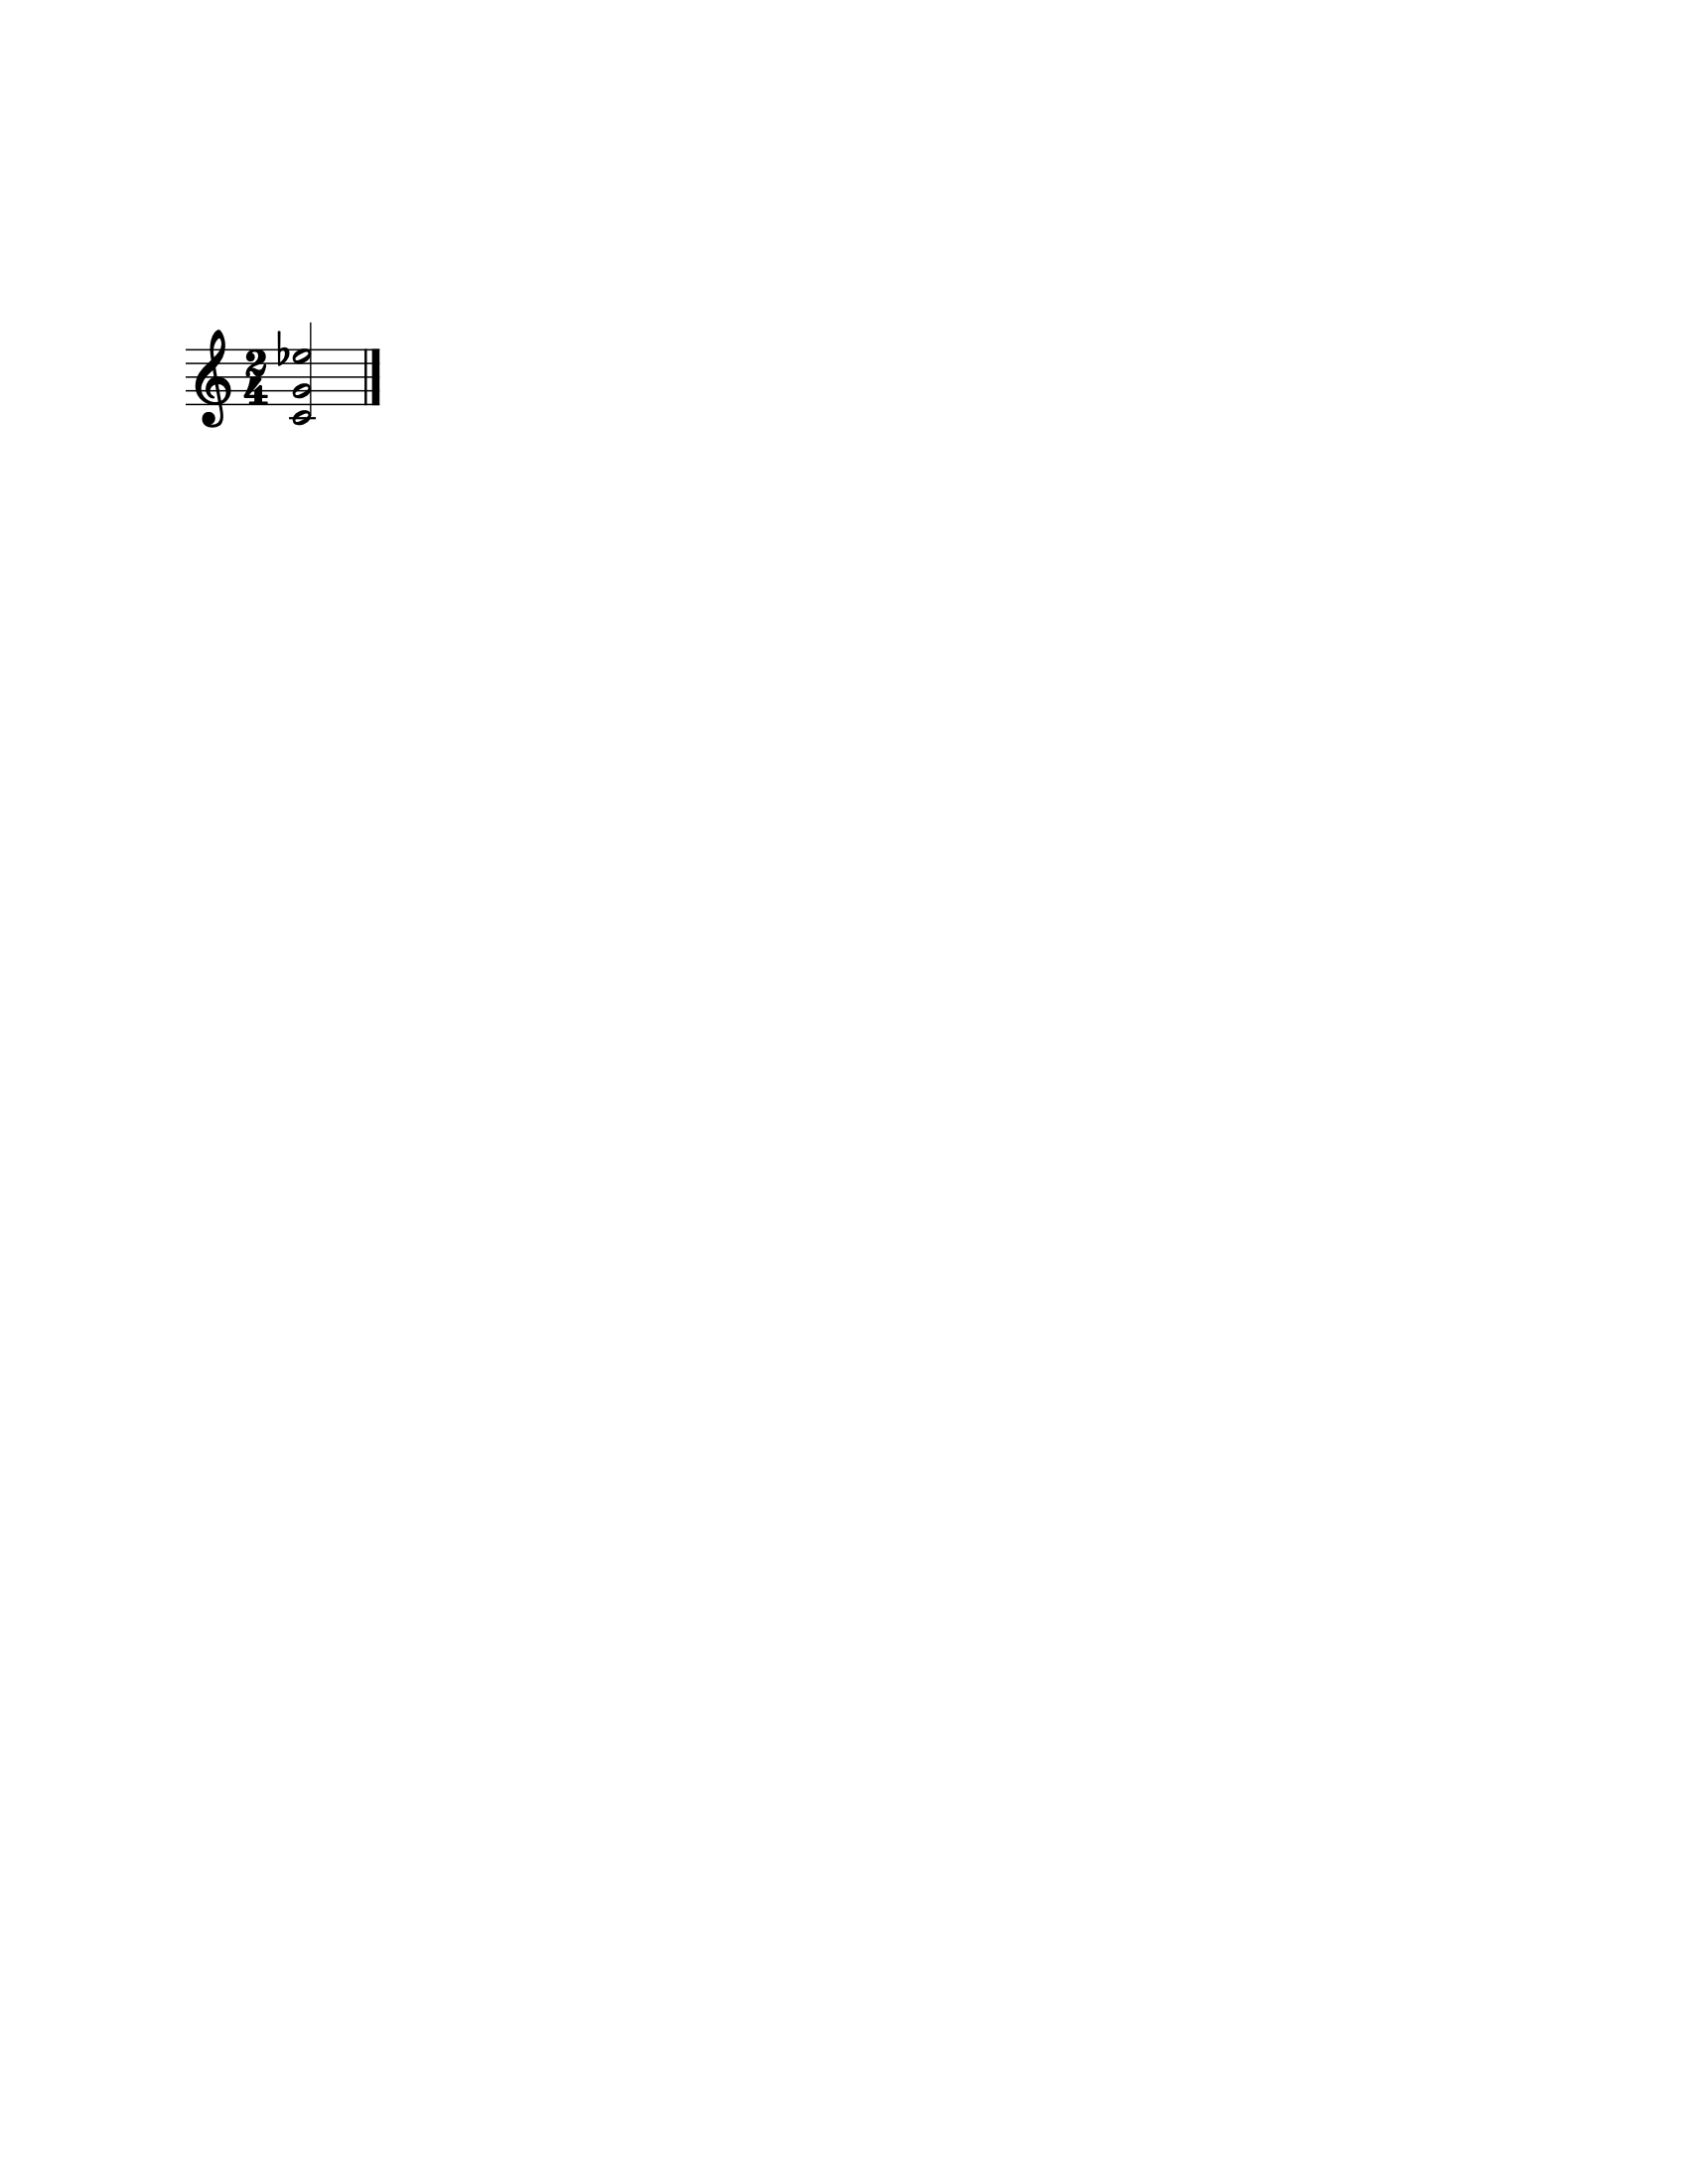

In [191]:
cMinor.show()

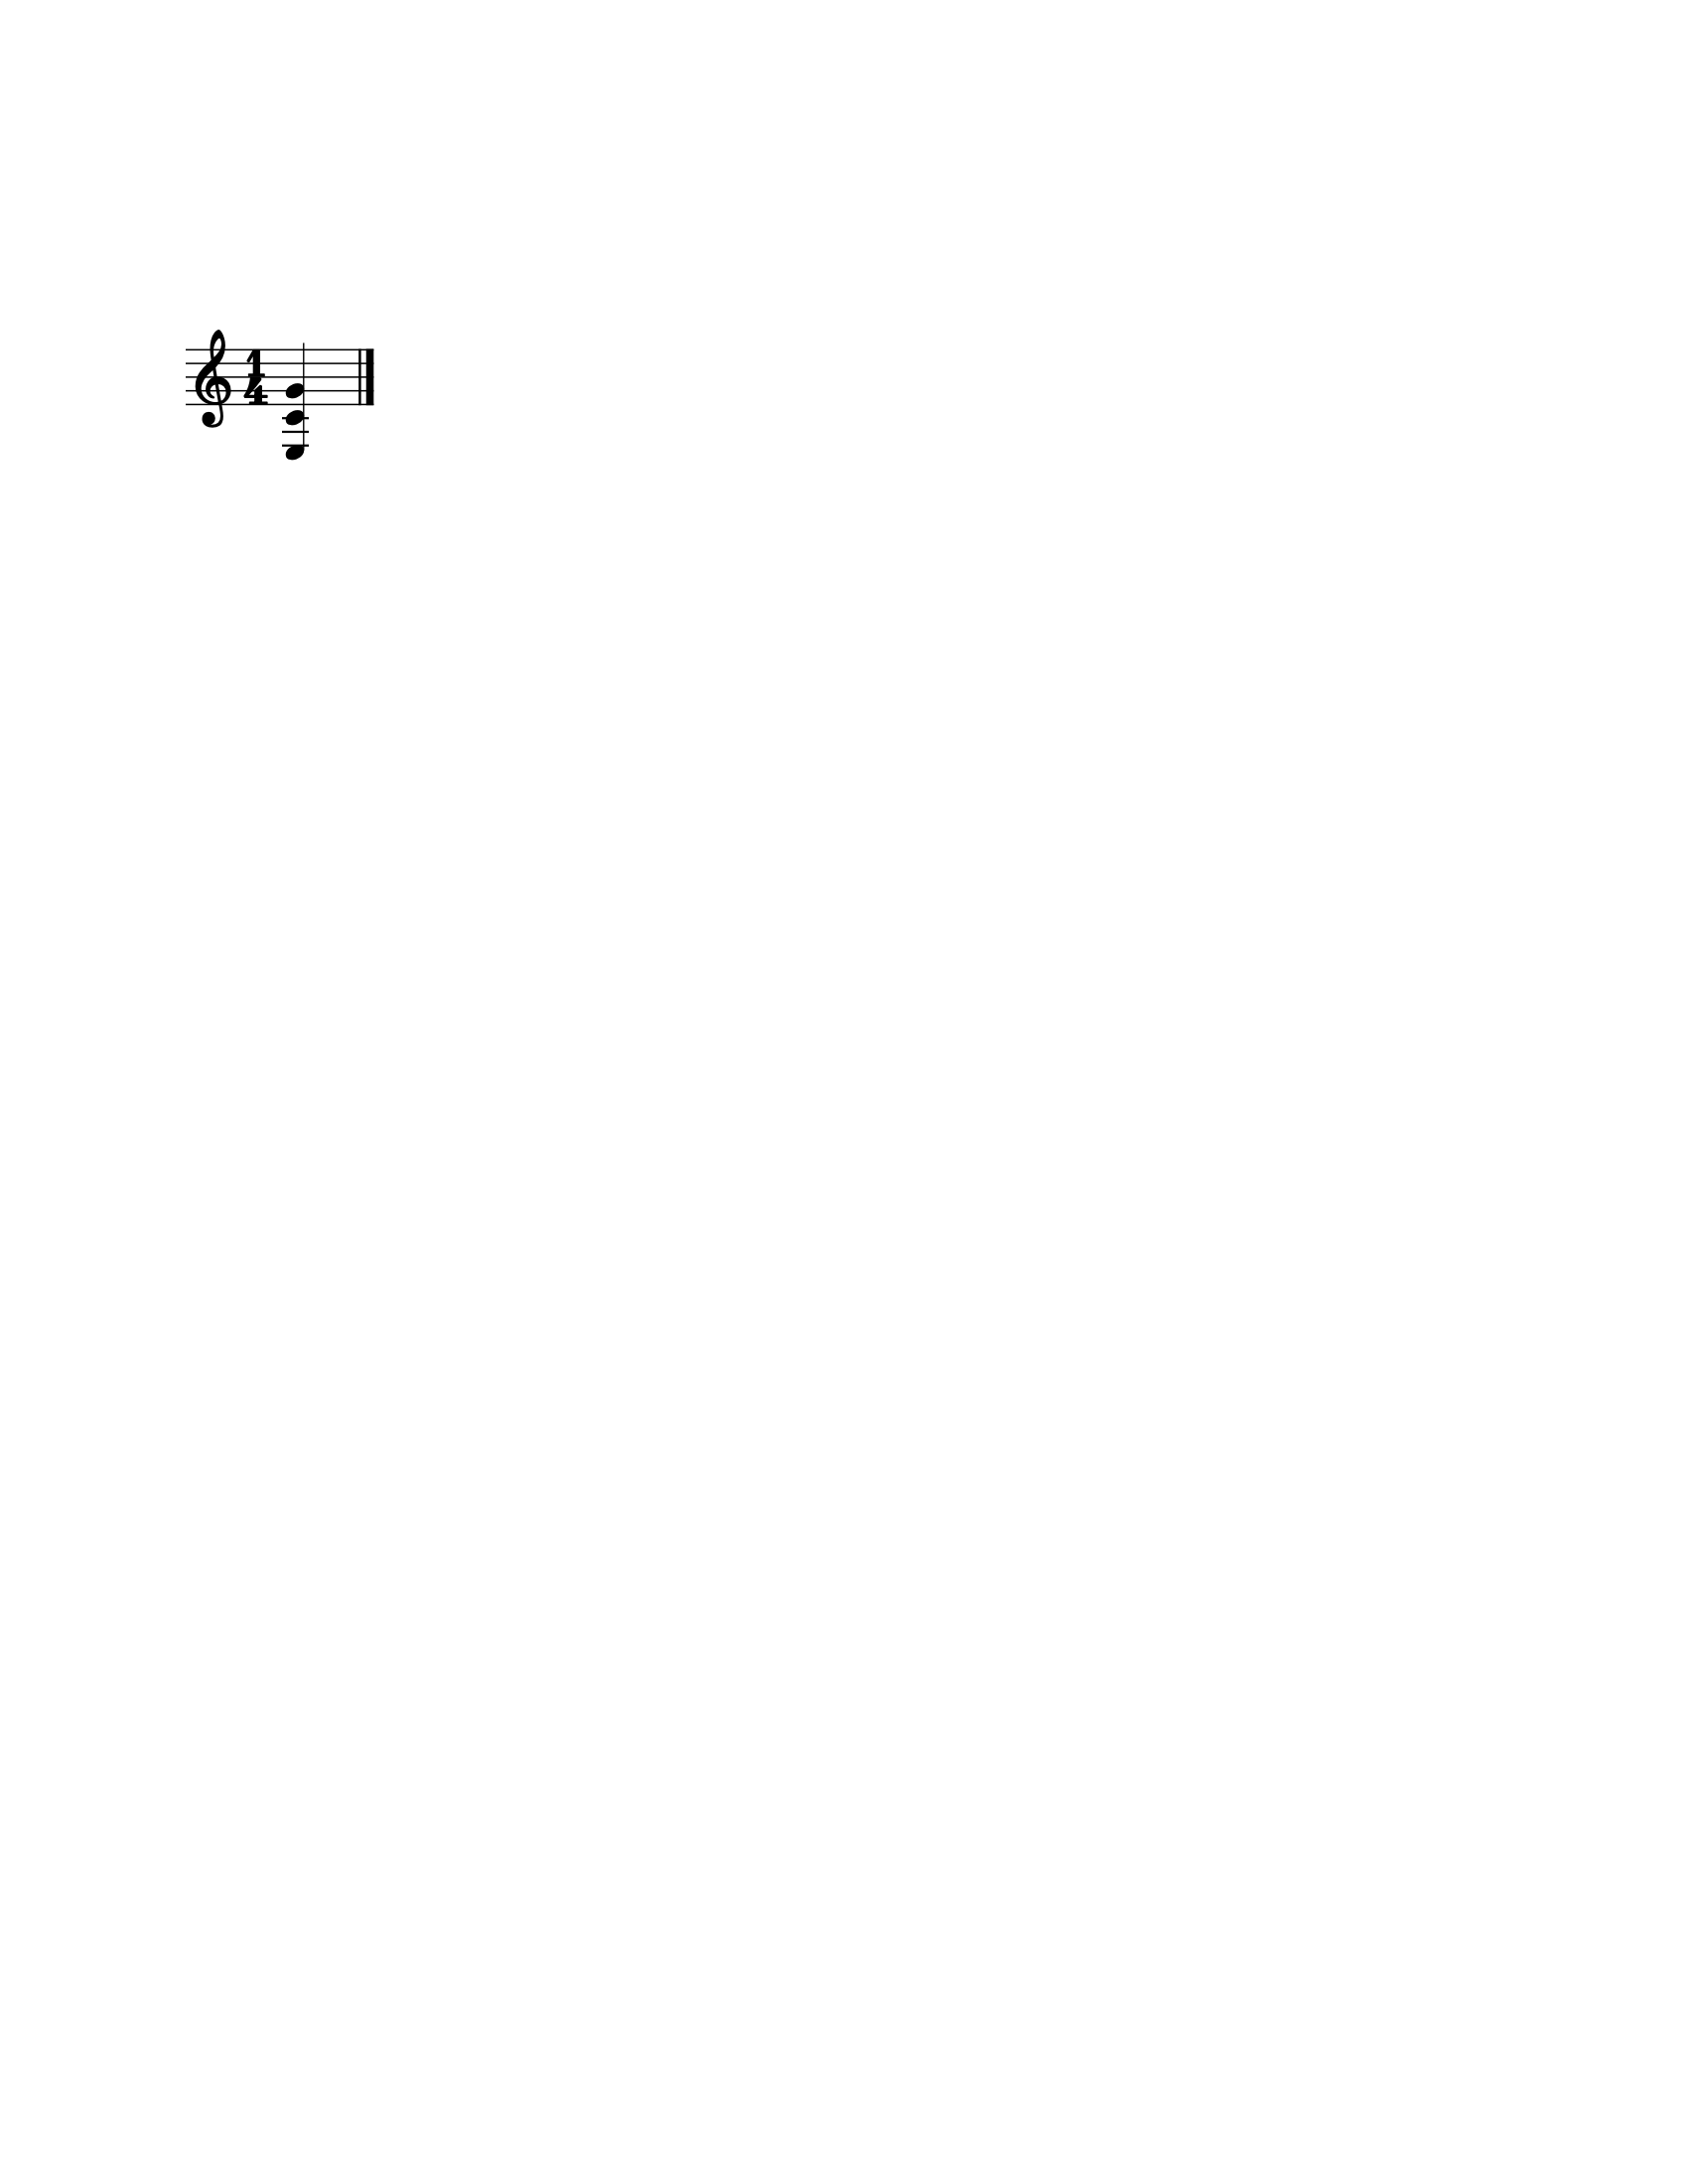

In [192]:
cMajor.show()

These chords are a bit “spacey”, so let’s get c in closedPosition():

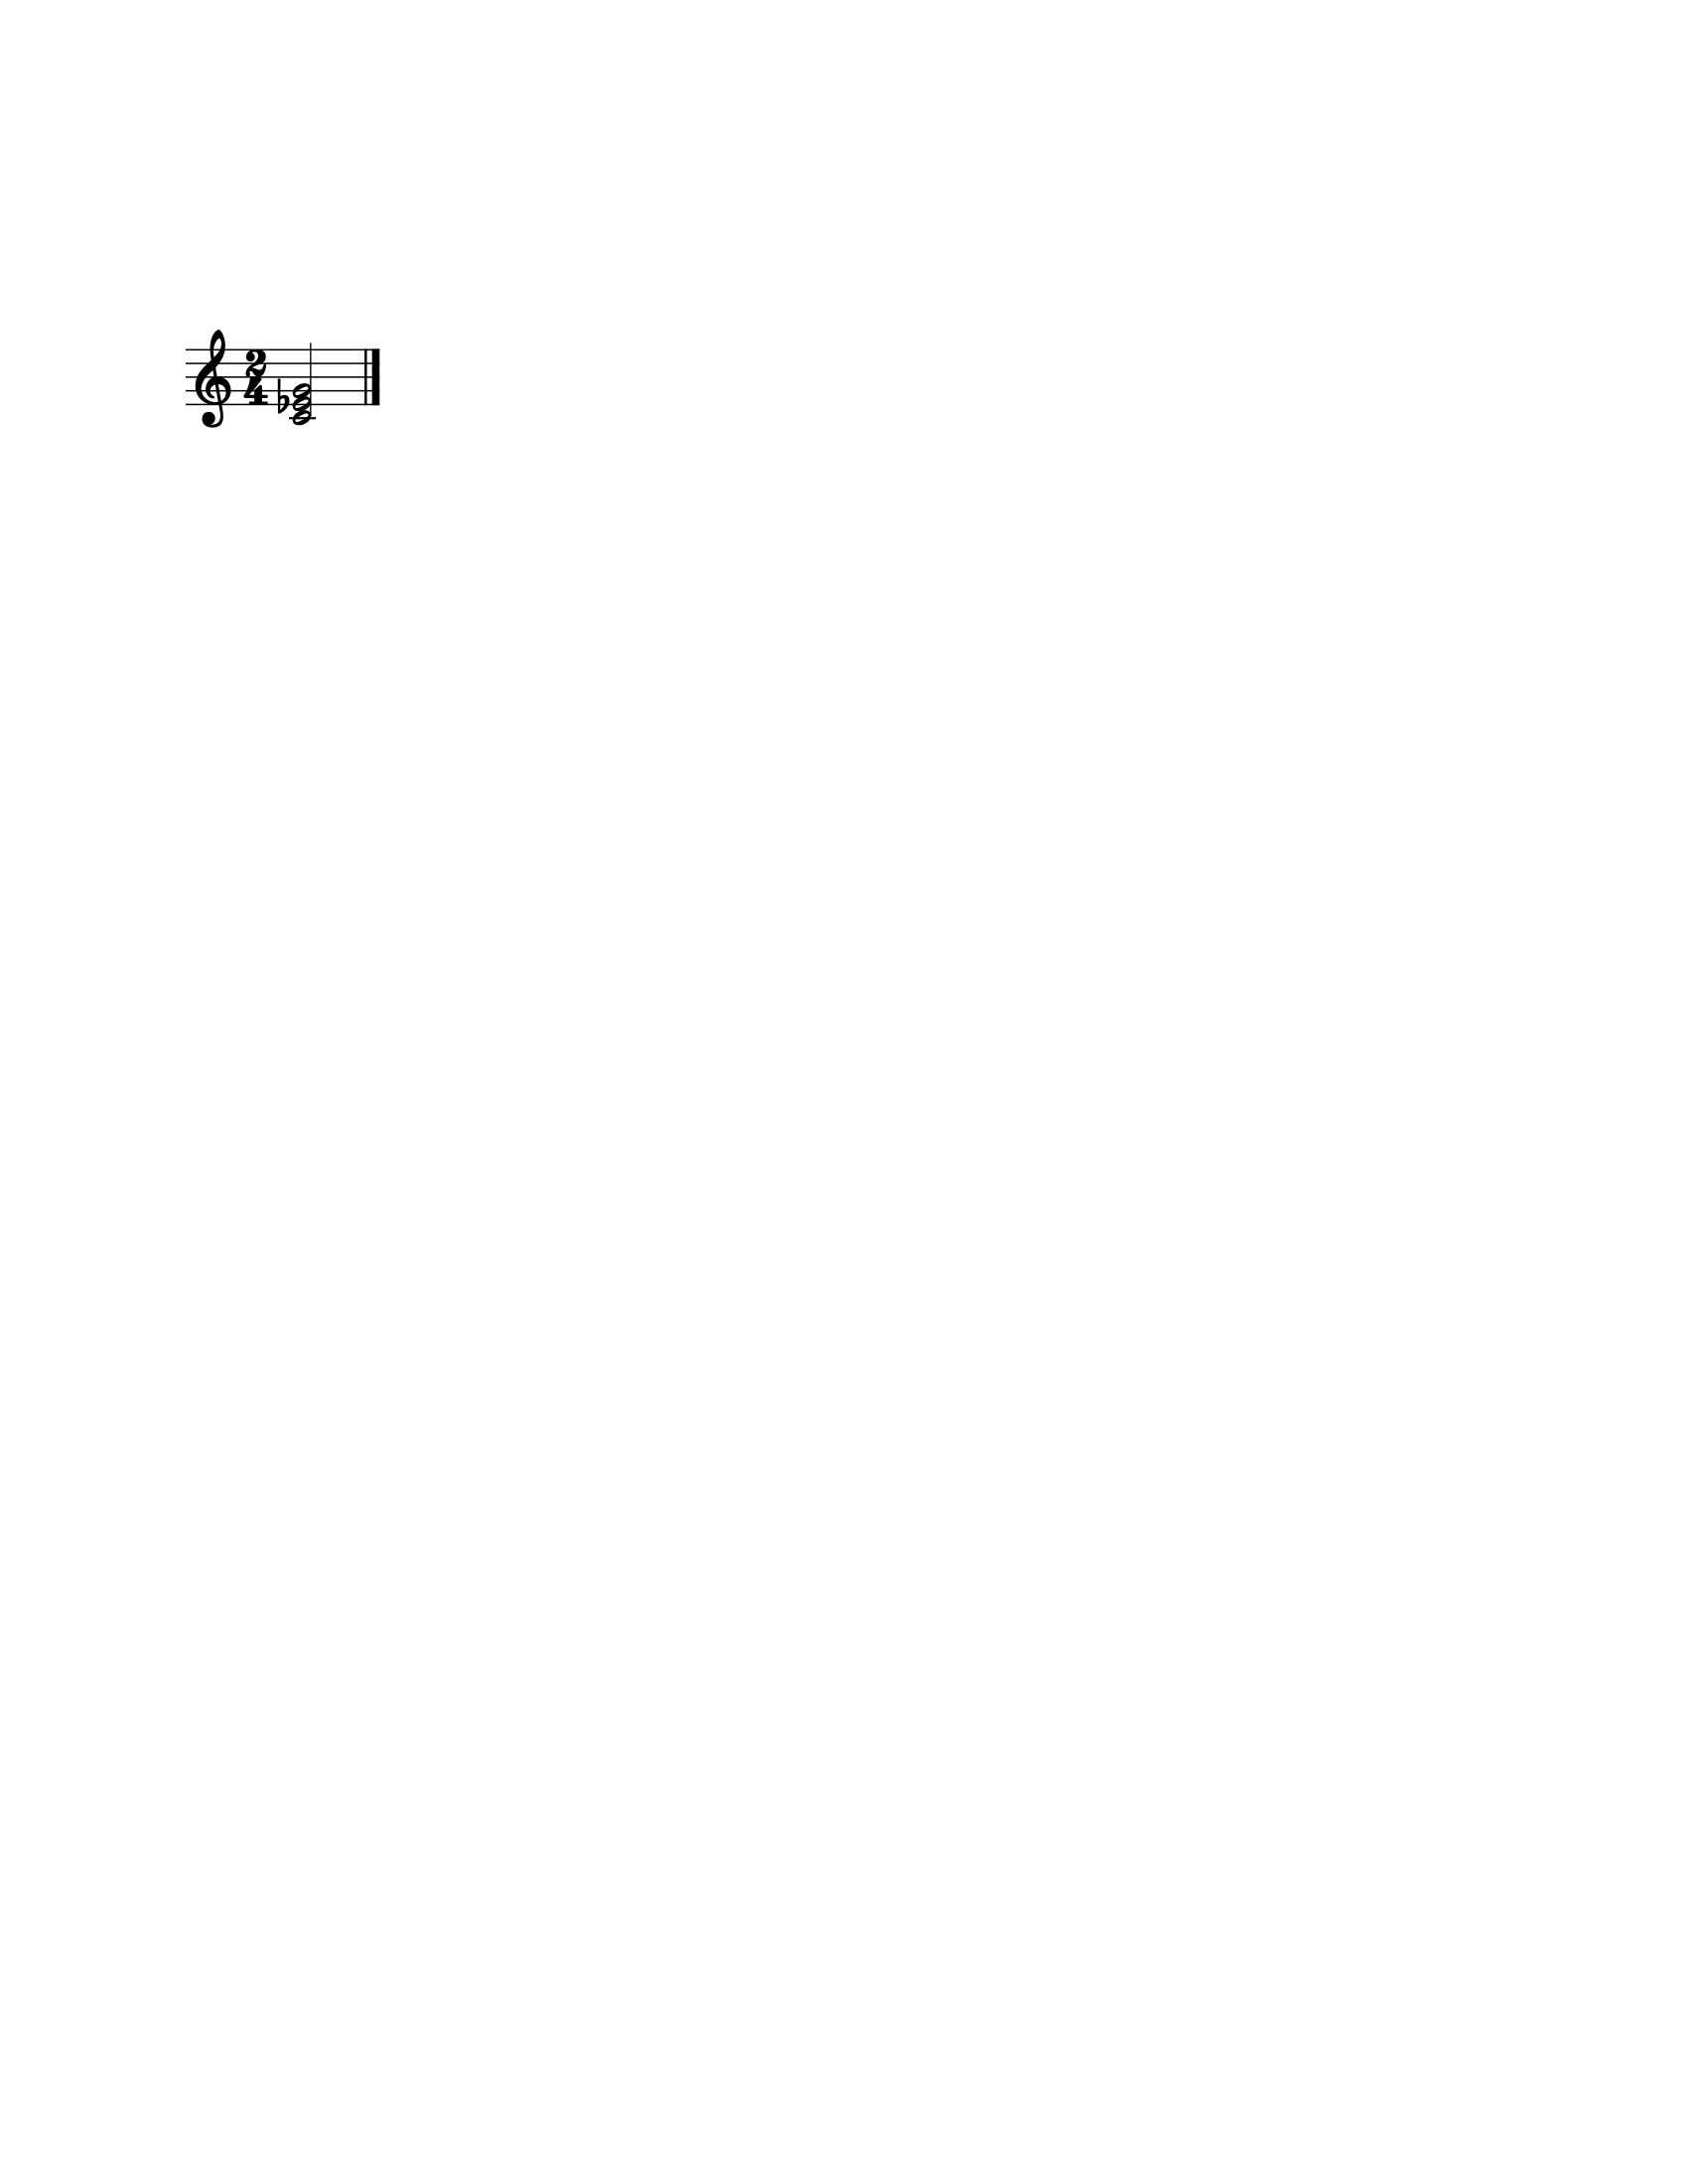

In [193]:
cClosed = cMinor.closedPosition()
cClosed.show()

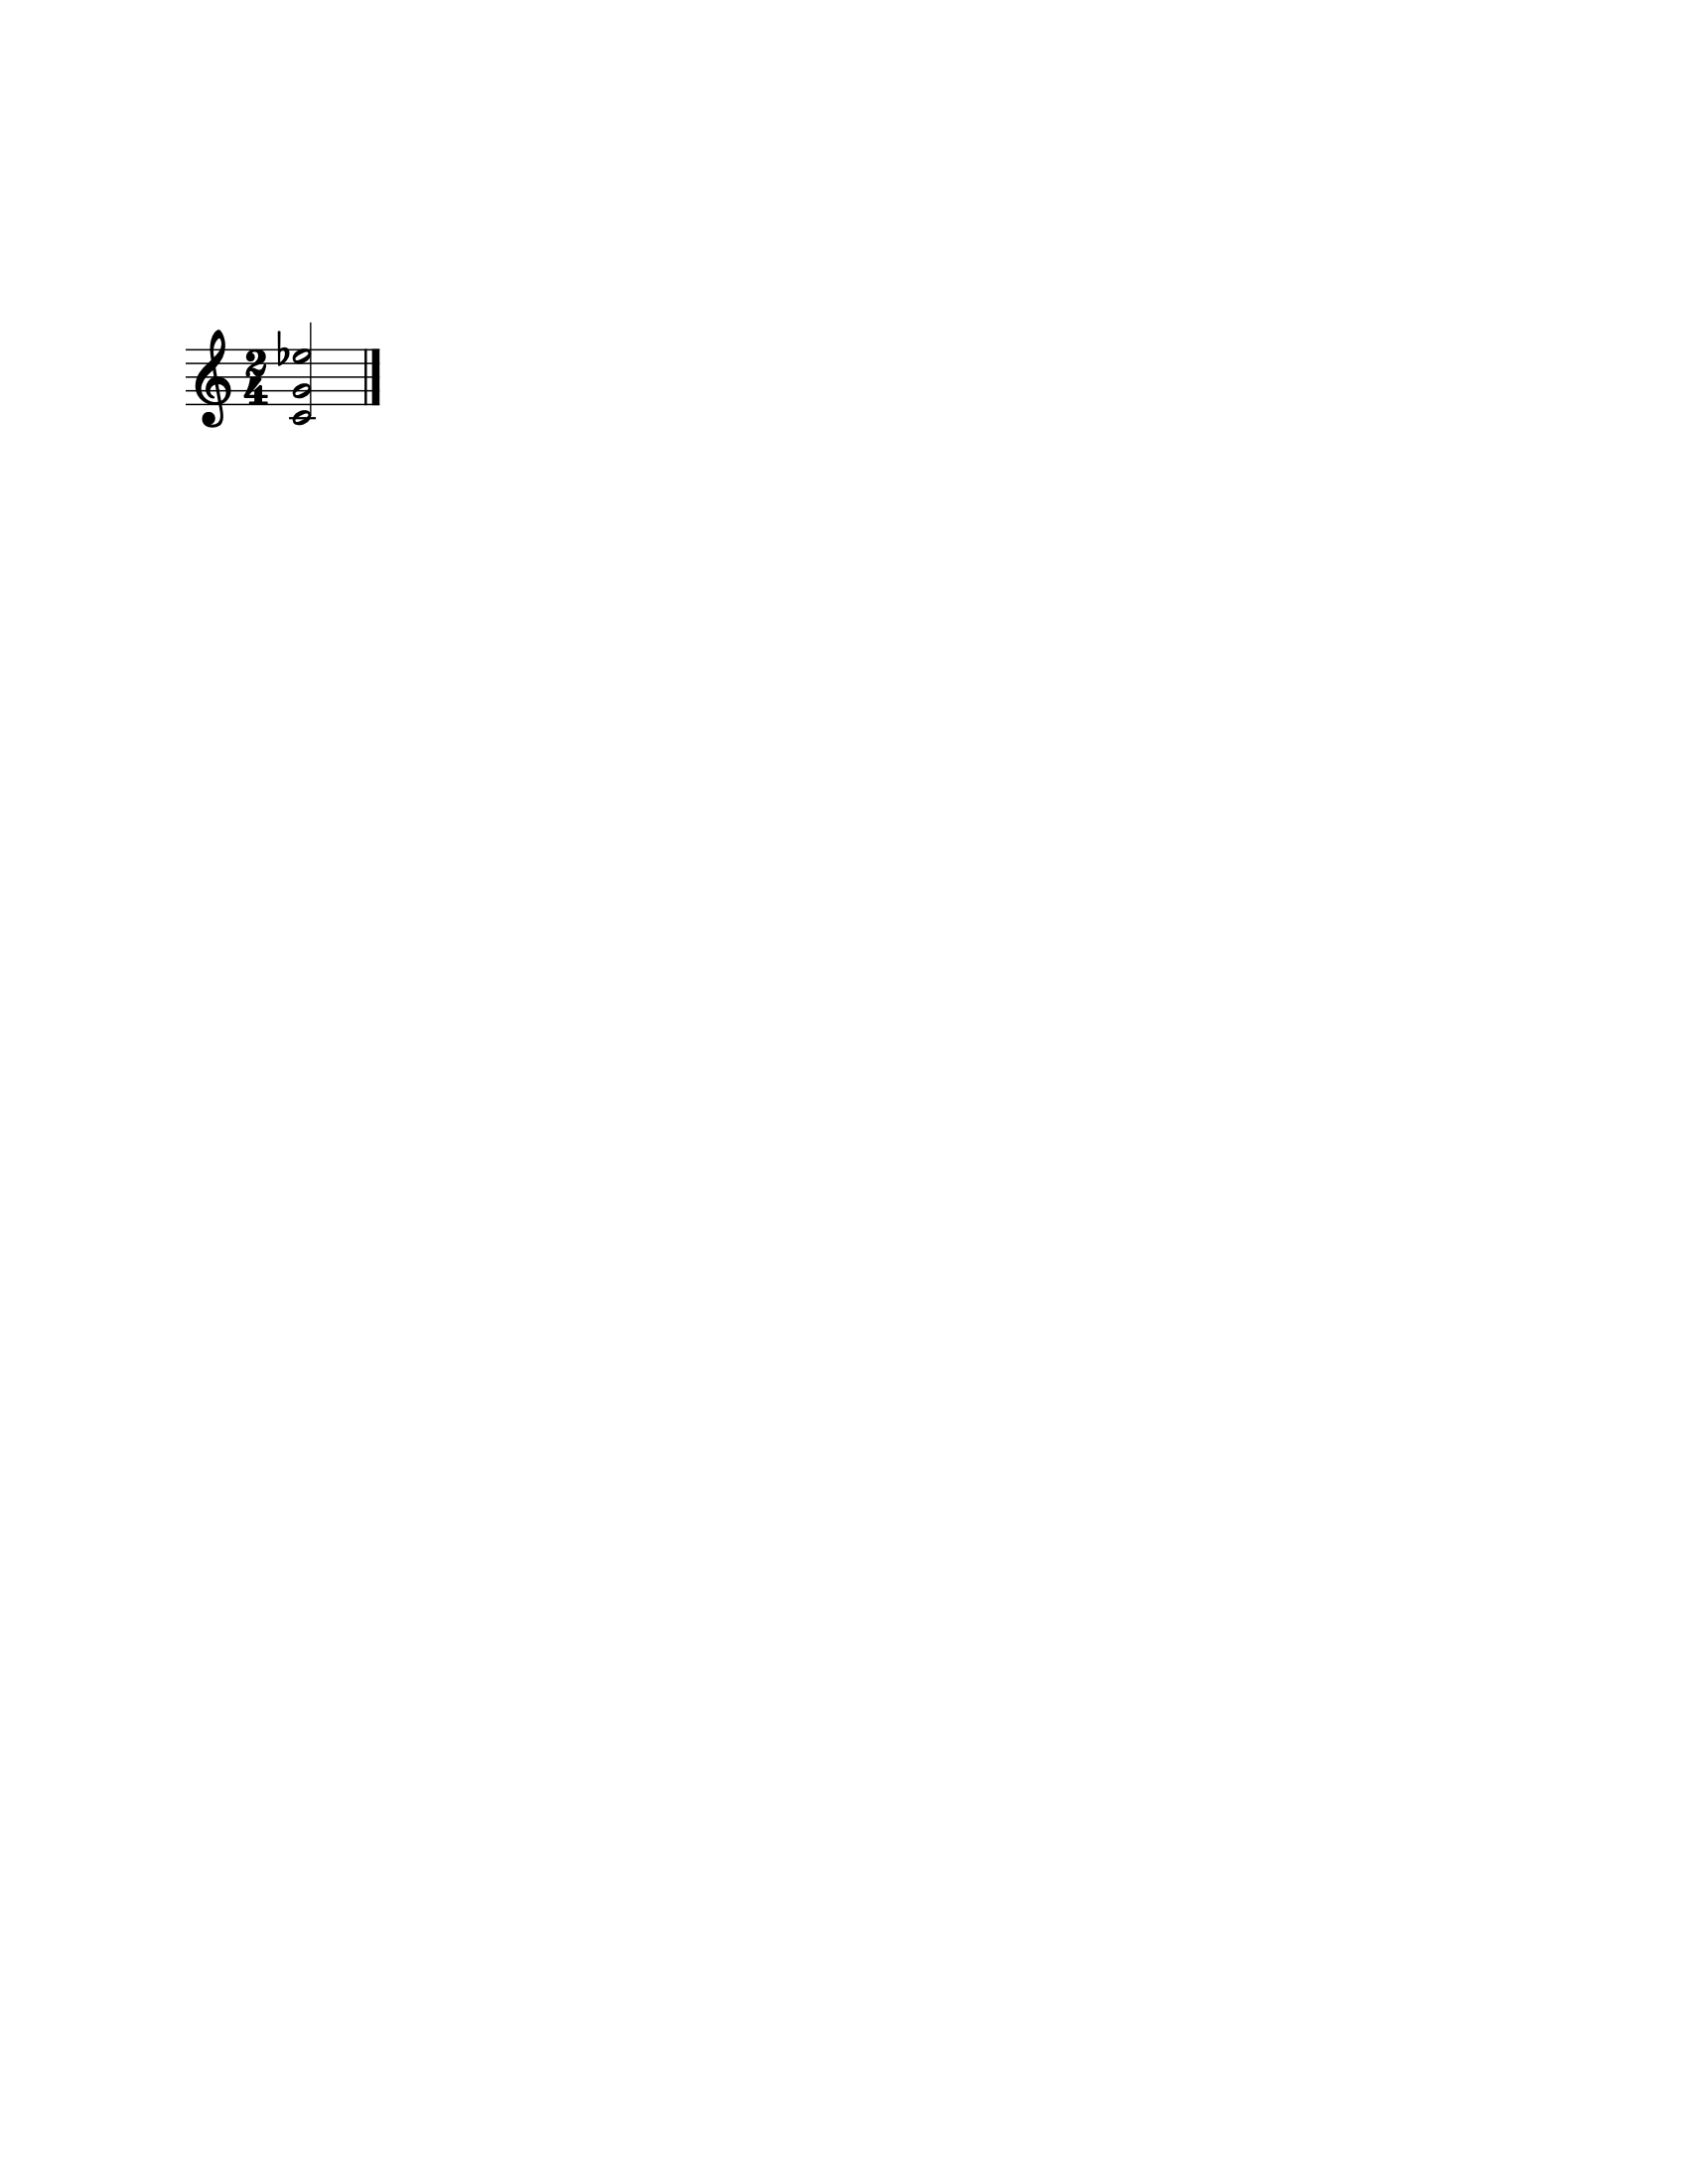

In [194]:
#Notice that cMinor is unchanged. The closed position chord is only cClosed:
cMinor.show()

If we wanted to change the Chord object itself, we call .closedPosition(inPlace=True) which alters the original. Since the original is altered, we don’t put x = ... in front of it.

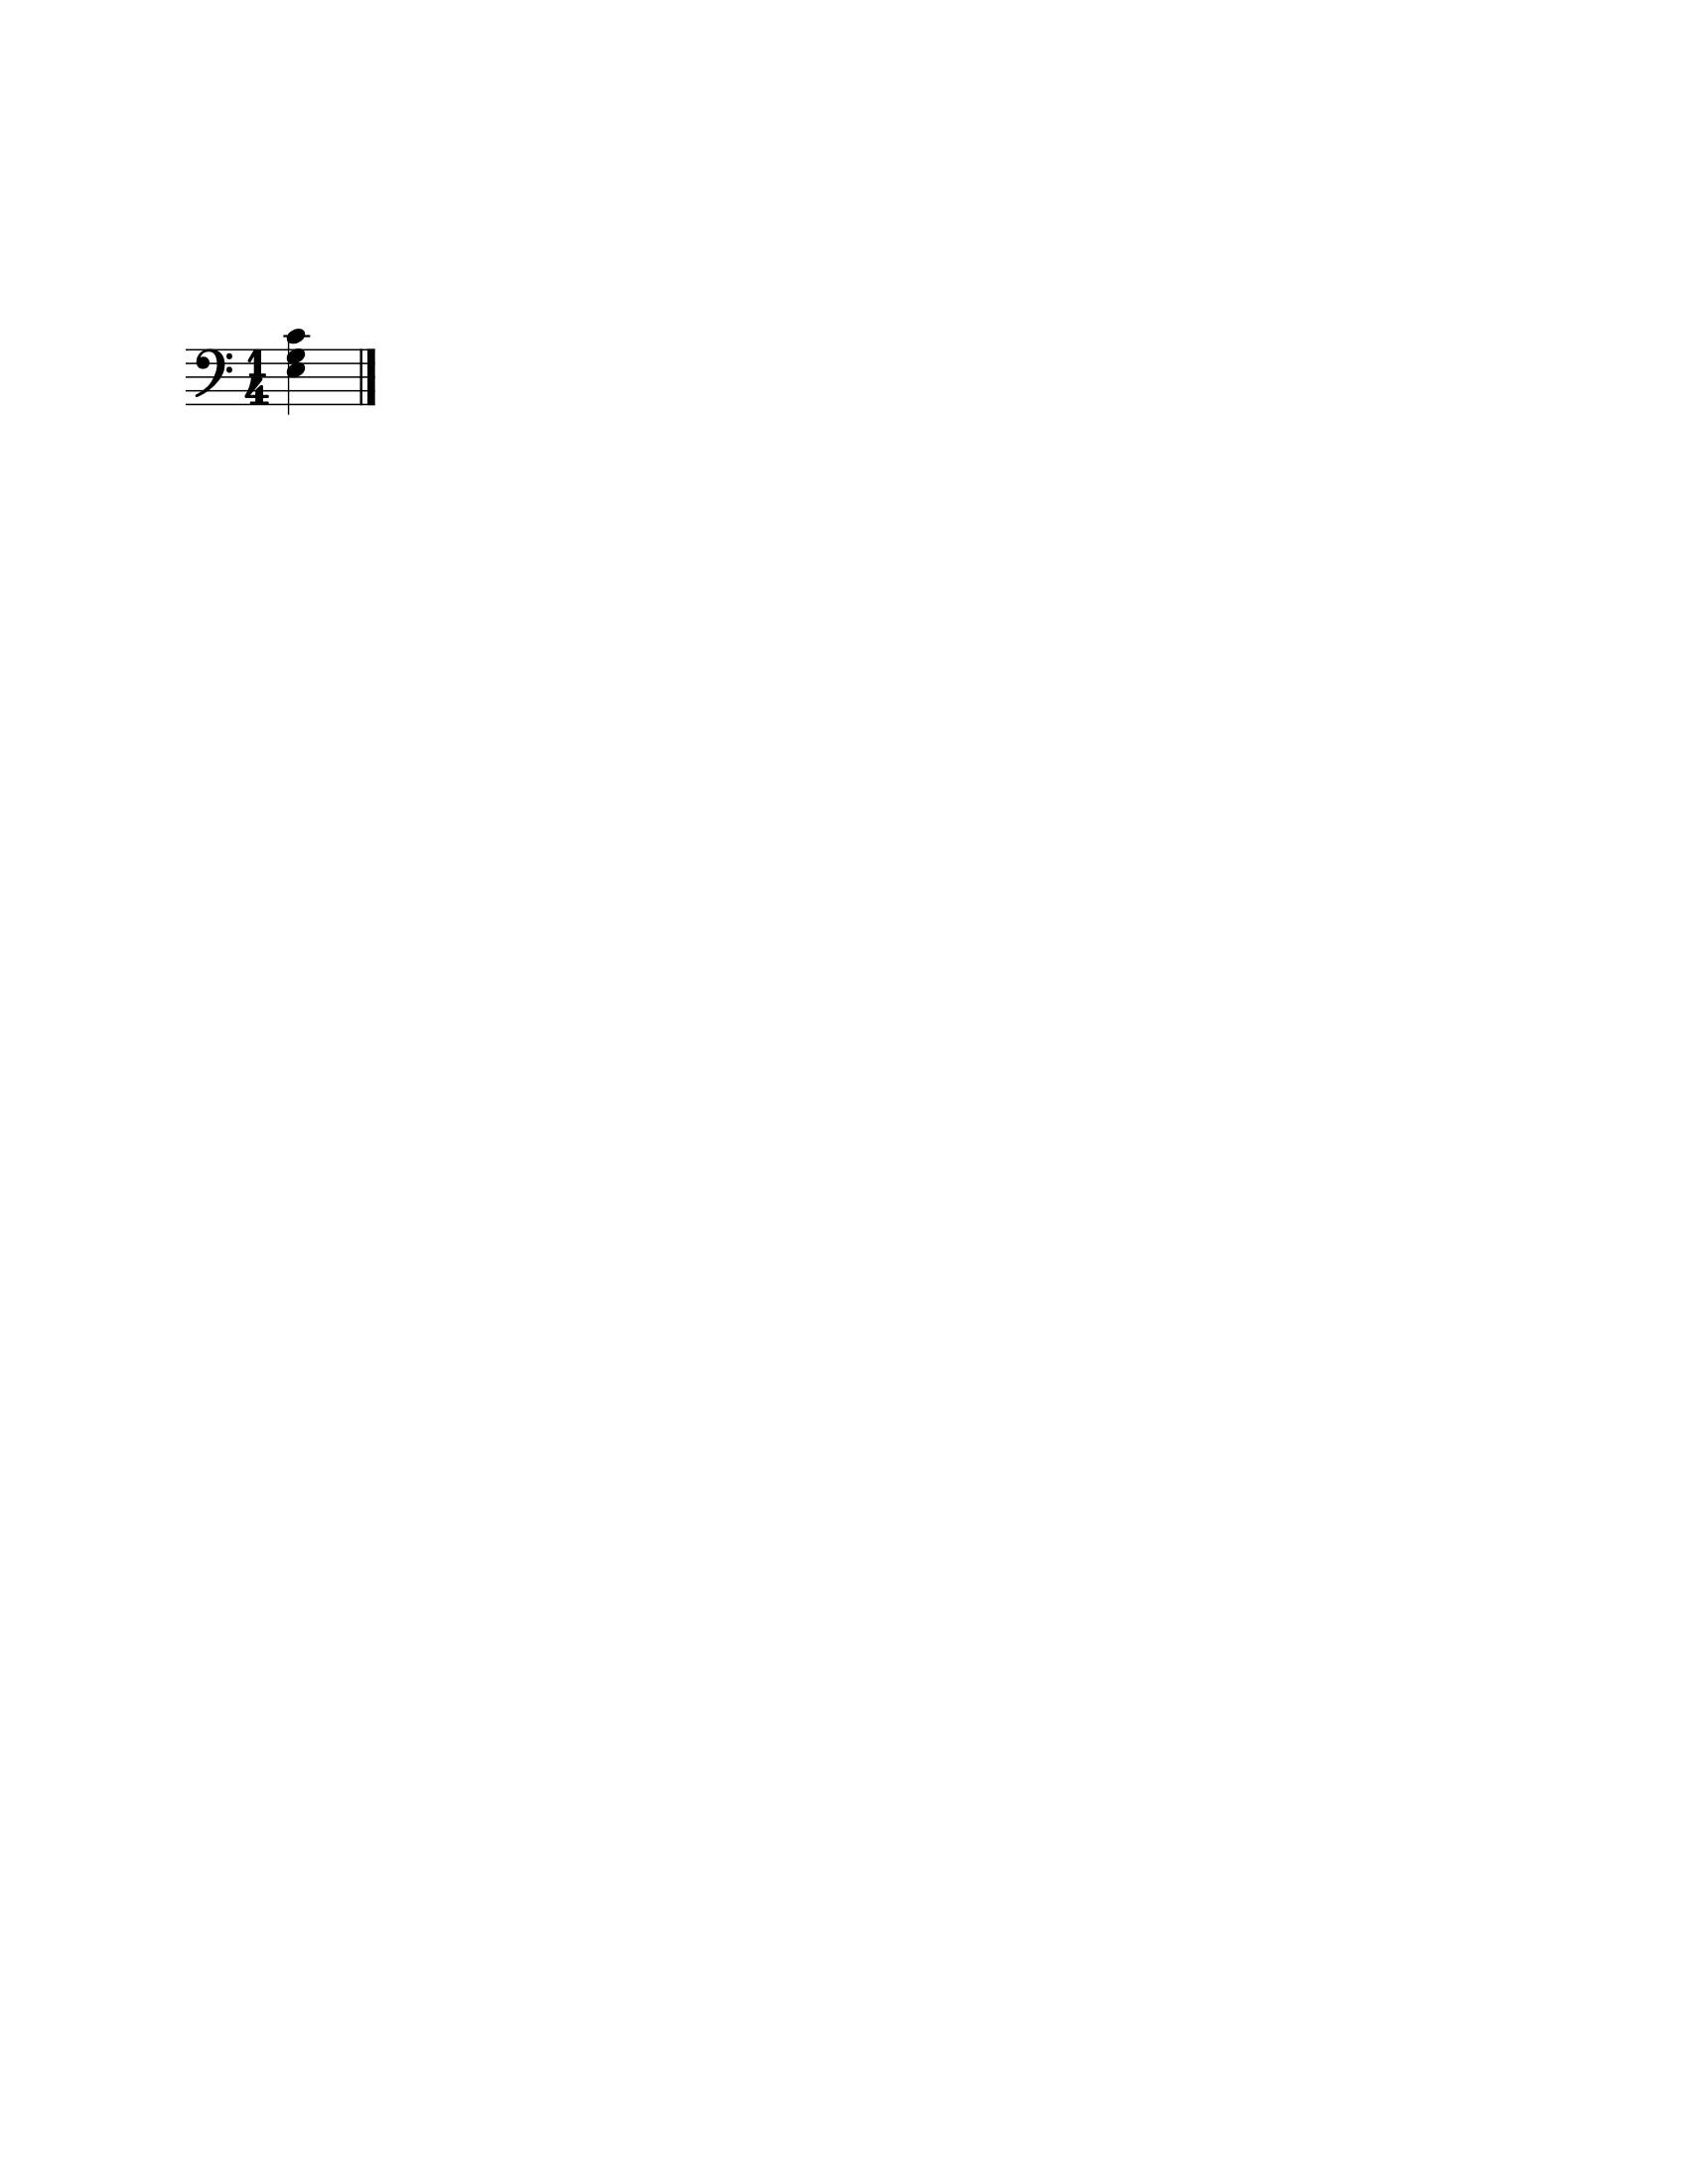

In [195]:
cMajor.closedPosition(inPlace=True)
cMajor.show()

There is also a method, semiClosedPosition() which acts like .closedPosition except that if there is already a pitch at that step (i.e., D-flat and D-sharp are both step “D”), then the note is moved up an octave. This is useful for displaying complex, post tonal chords in the most compact form possible:

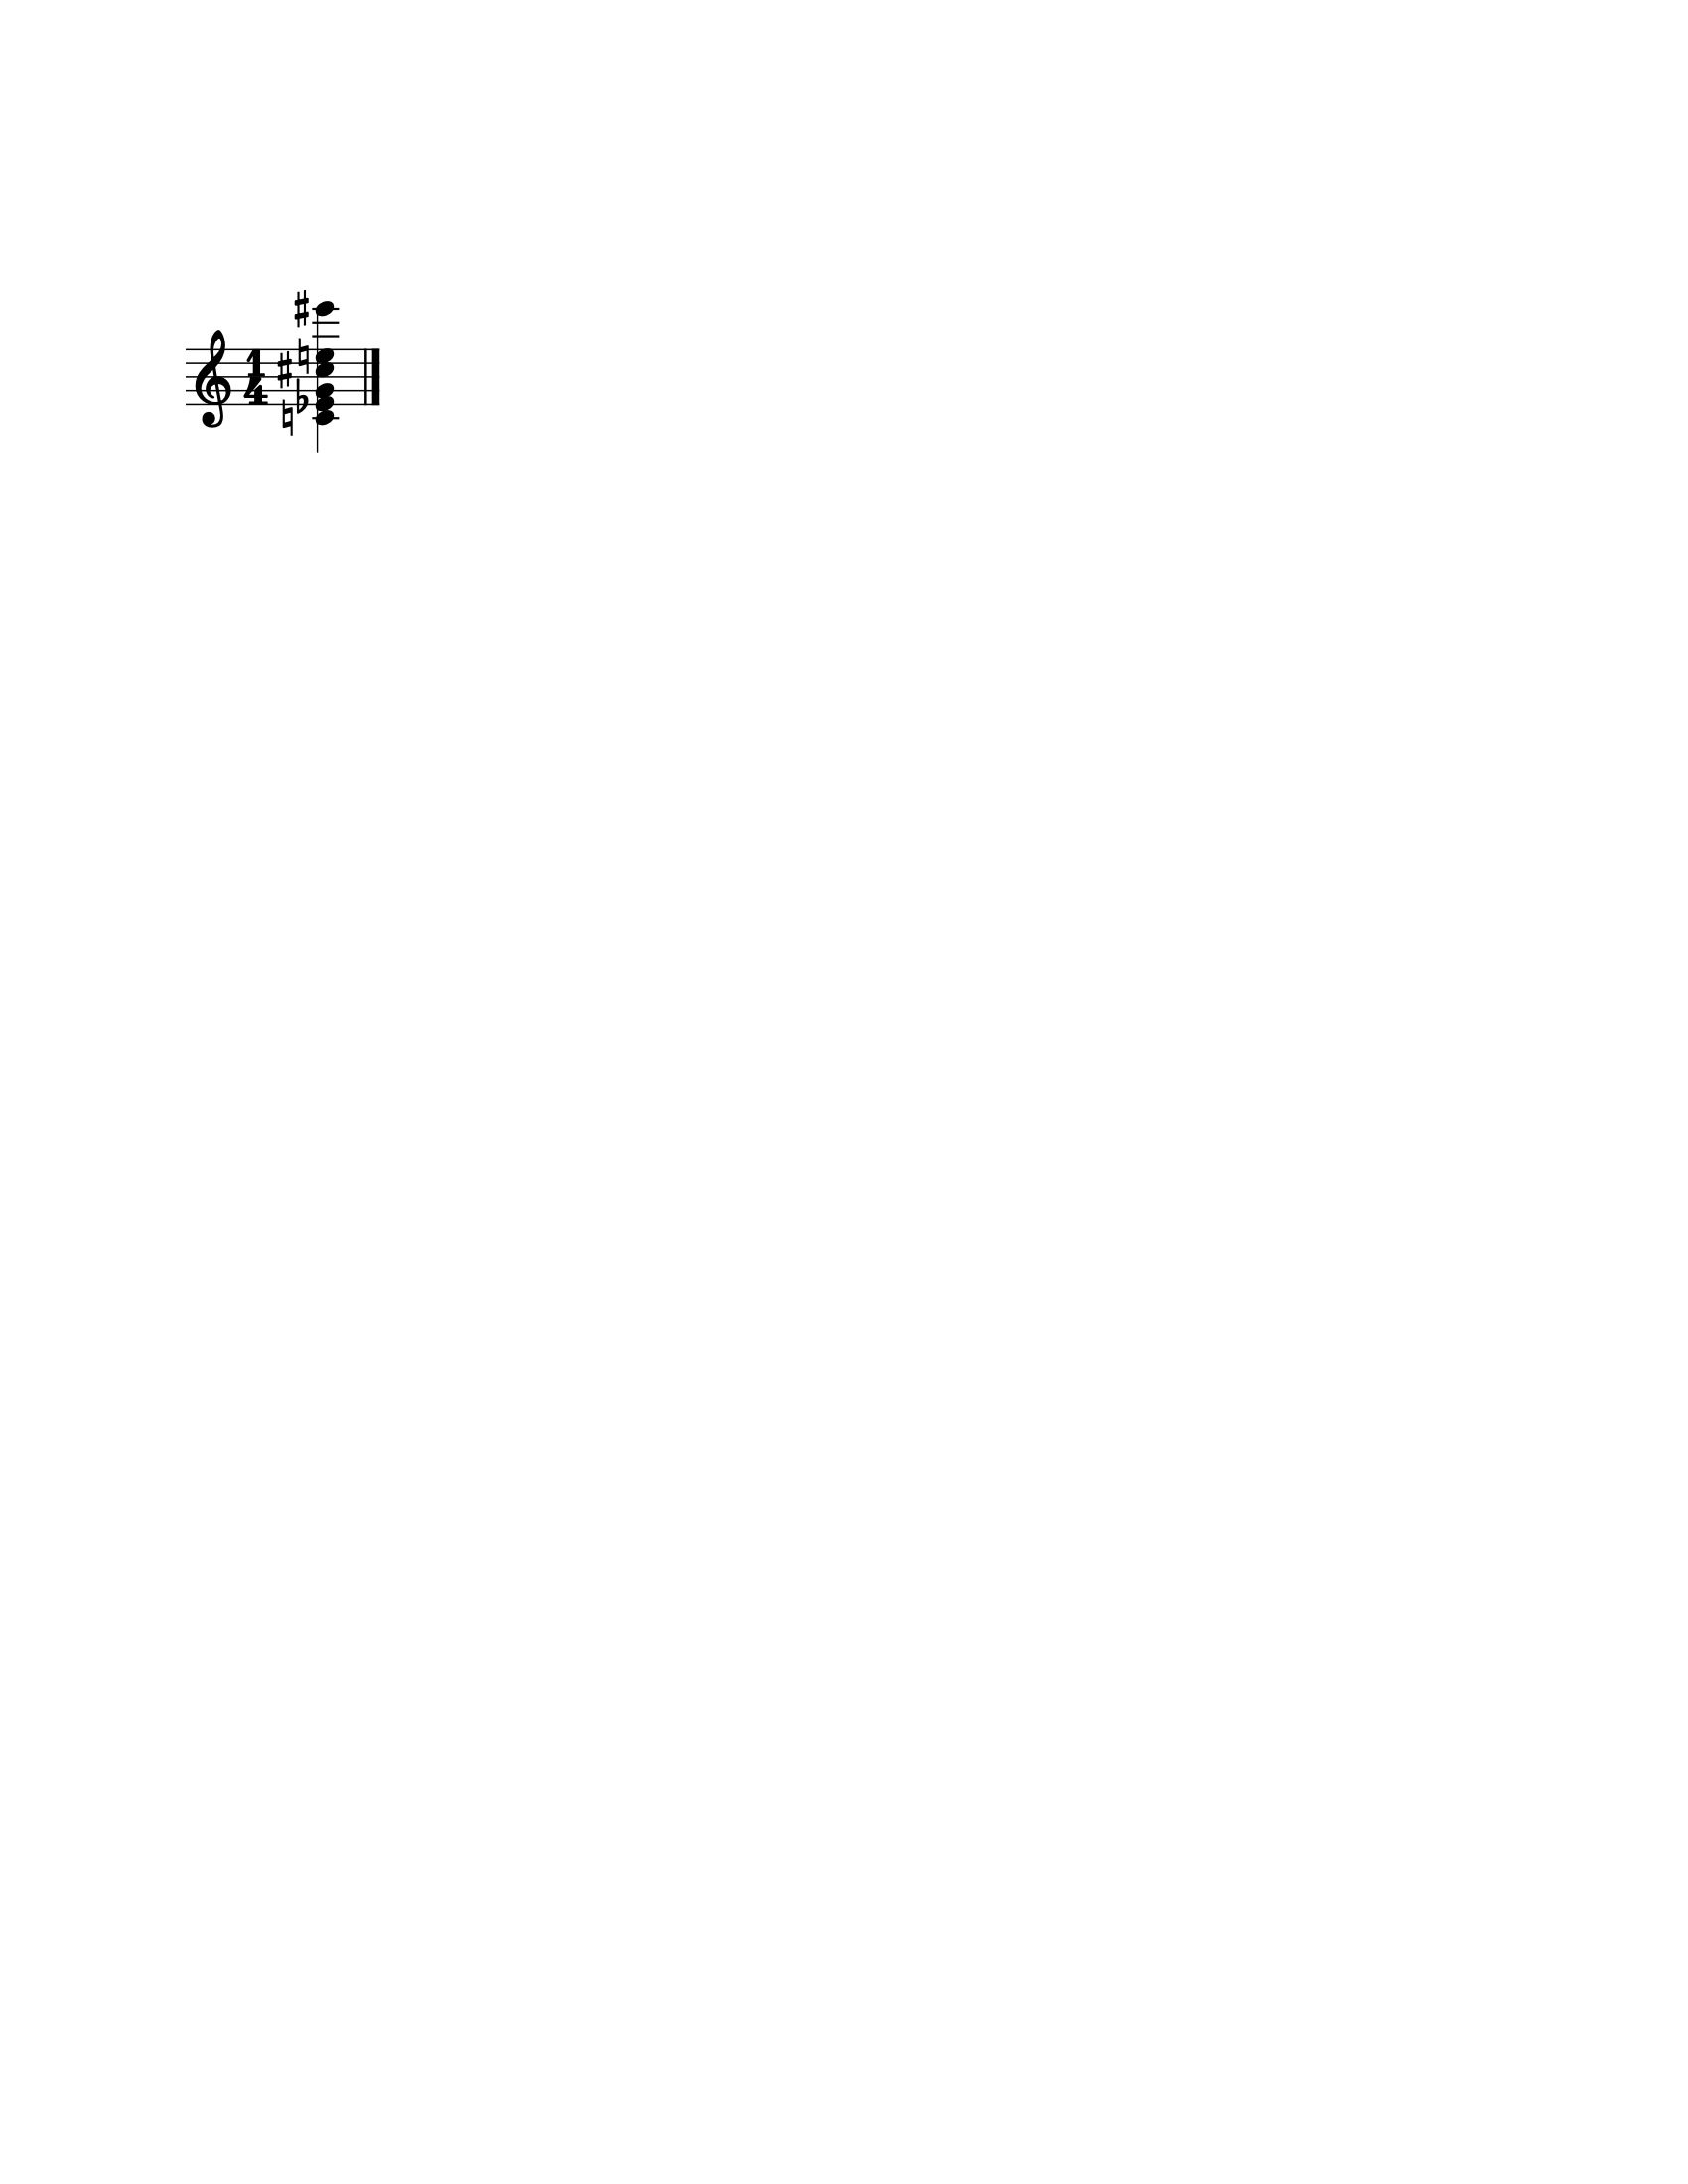

In [196]:
c1 = chord.Chord(['C4', 'E5', 'C#6', 'E-7', 'G8', 'C9', 'E#9'])
c2 = c1.semiClosedPosition()
c2.show()

We can get the common name of each of these Chords:

In [197]:
cn1 = cMinor.commonName
print(cn1)

minor triad


In [198]:
print(cMajor.commonName)

major triad


More complex chords have less common “commonNames”. Here’s one that the American composer Elliott Carter liked a lot.

In [199]:
elliottCarterChord = chord.Chord(['C4','D-4','E4','F#4'])
elliottCarterChord.commonName

'all-interval tetrachord'

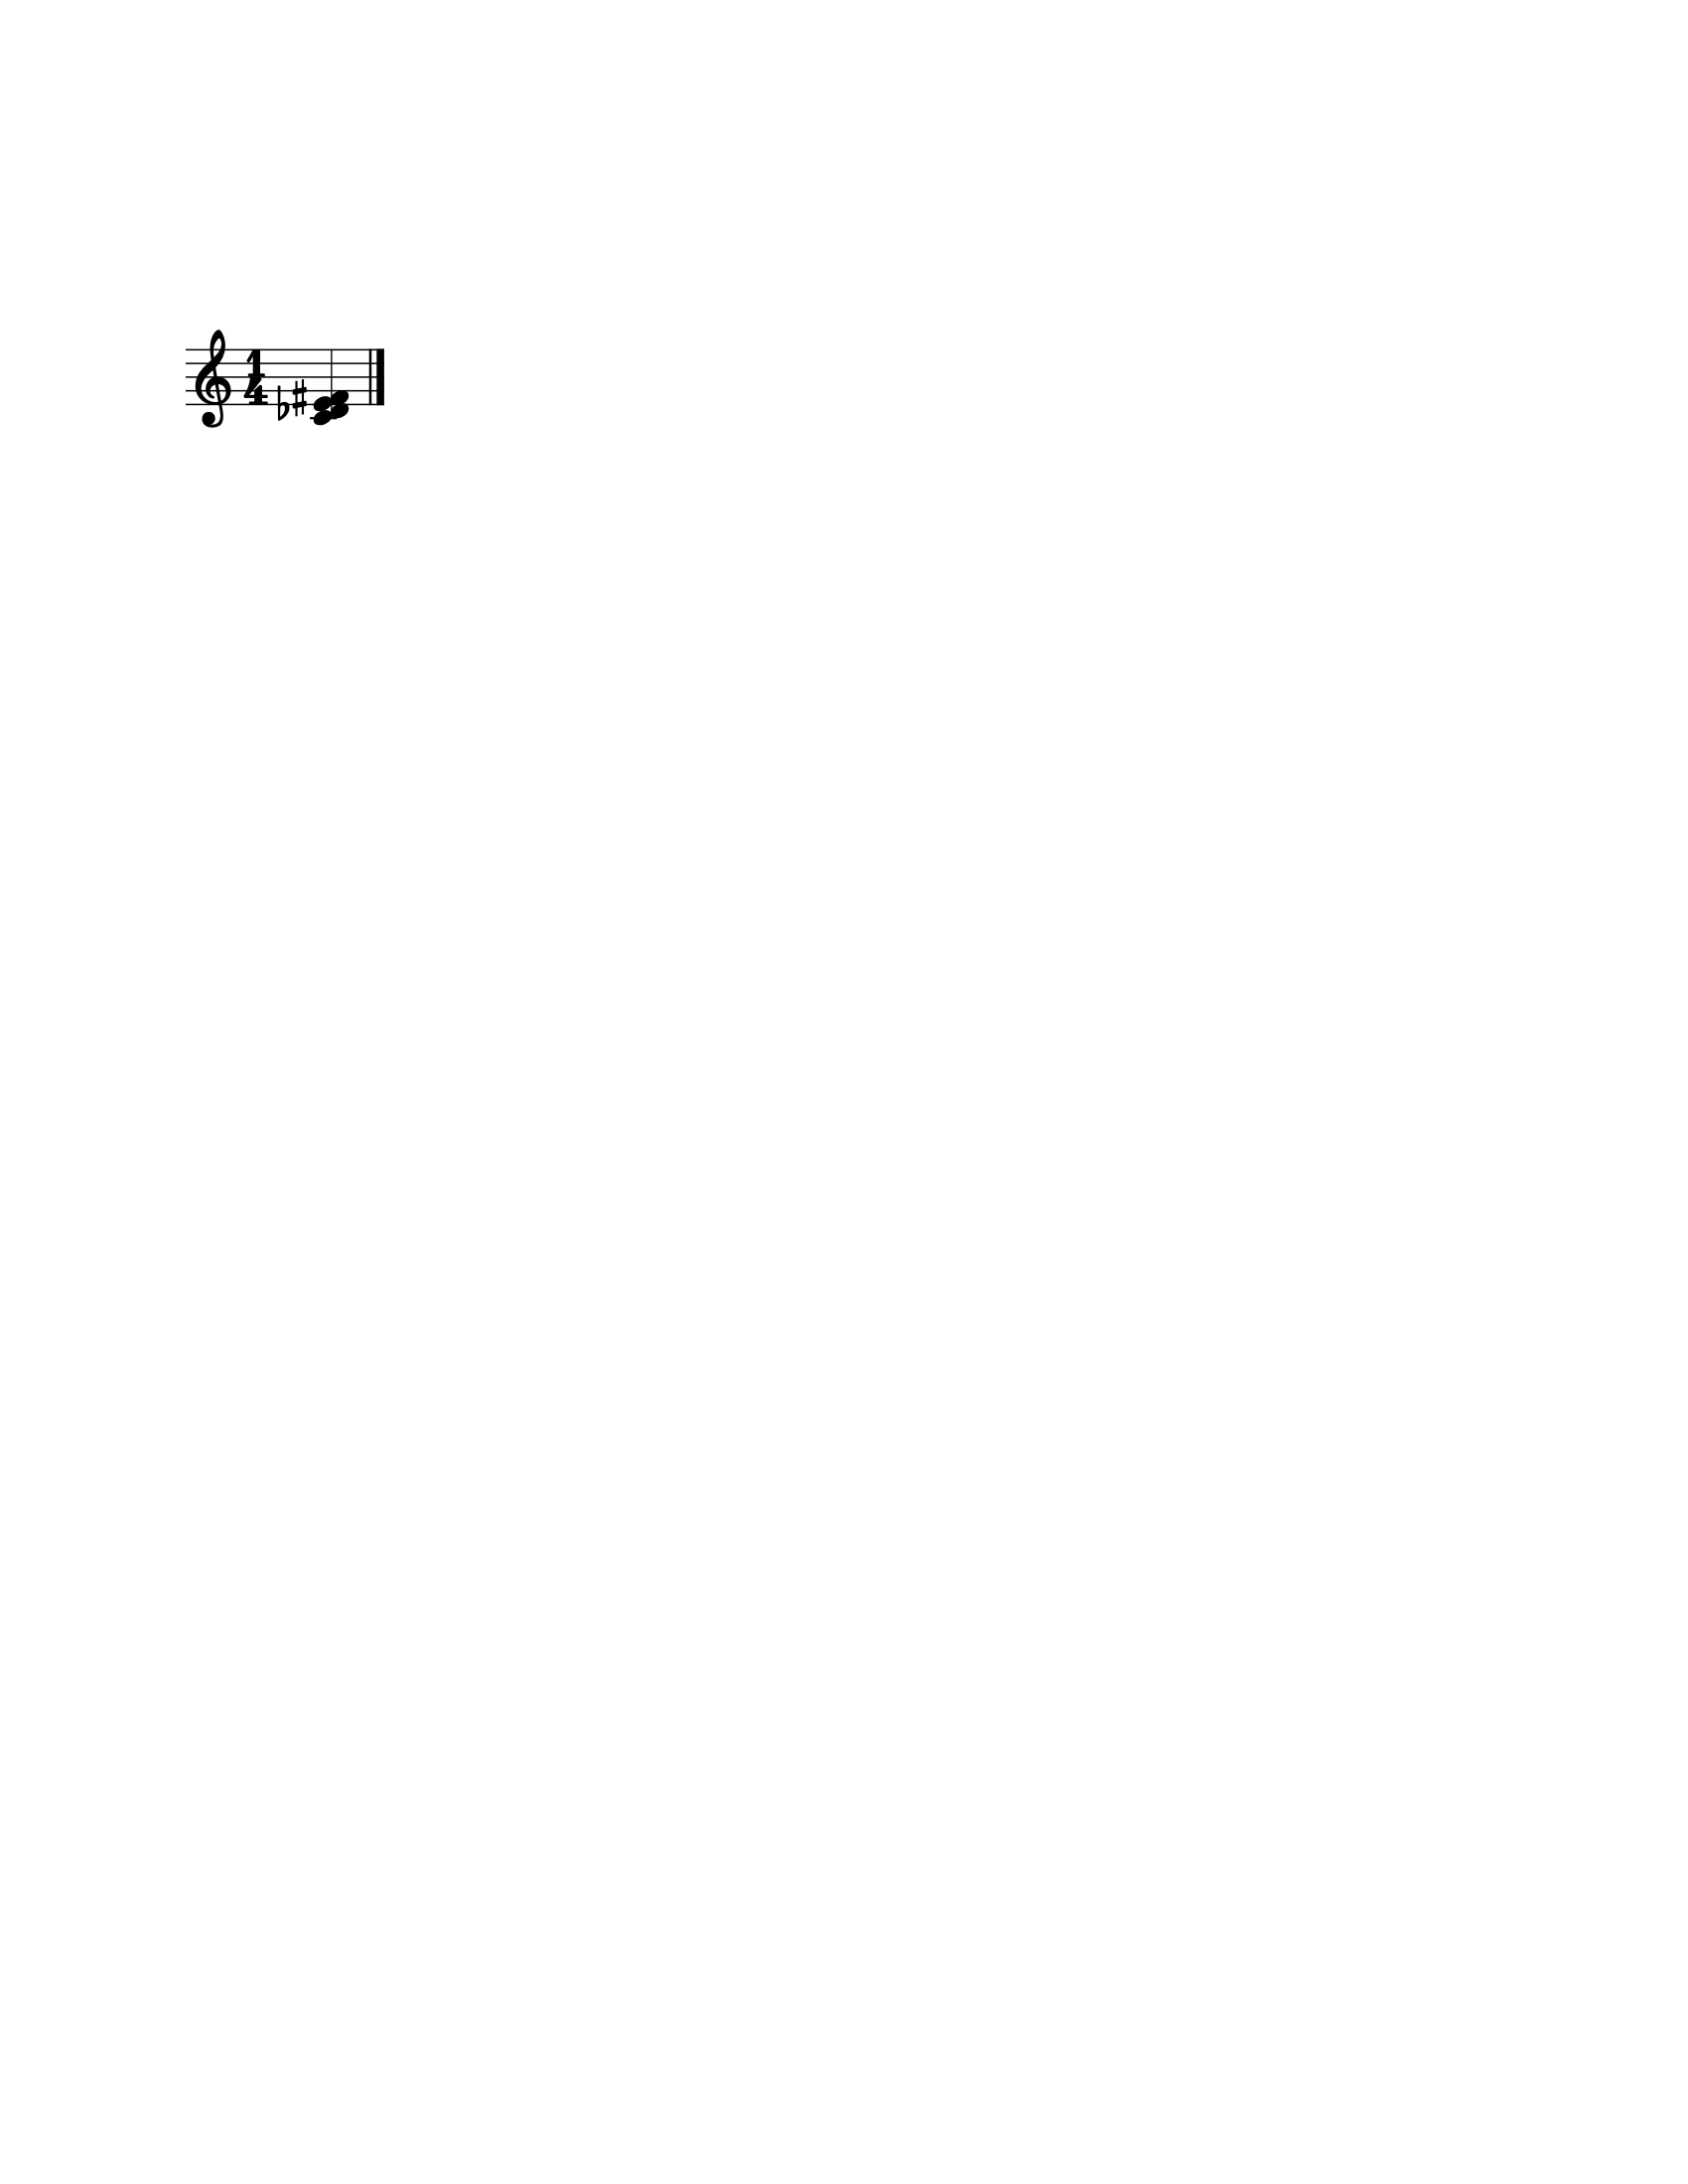

In [200]:
elliottCarterChord.show()

### More ways of creating chords; Chords and Streams

There are other ways of creating a Chord if you’d like. One way is from a bunch of already created Note objects:

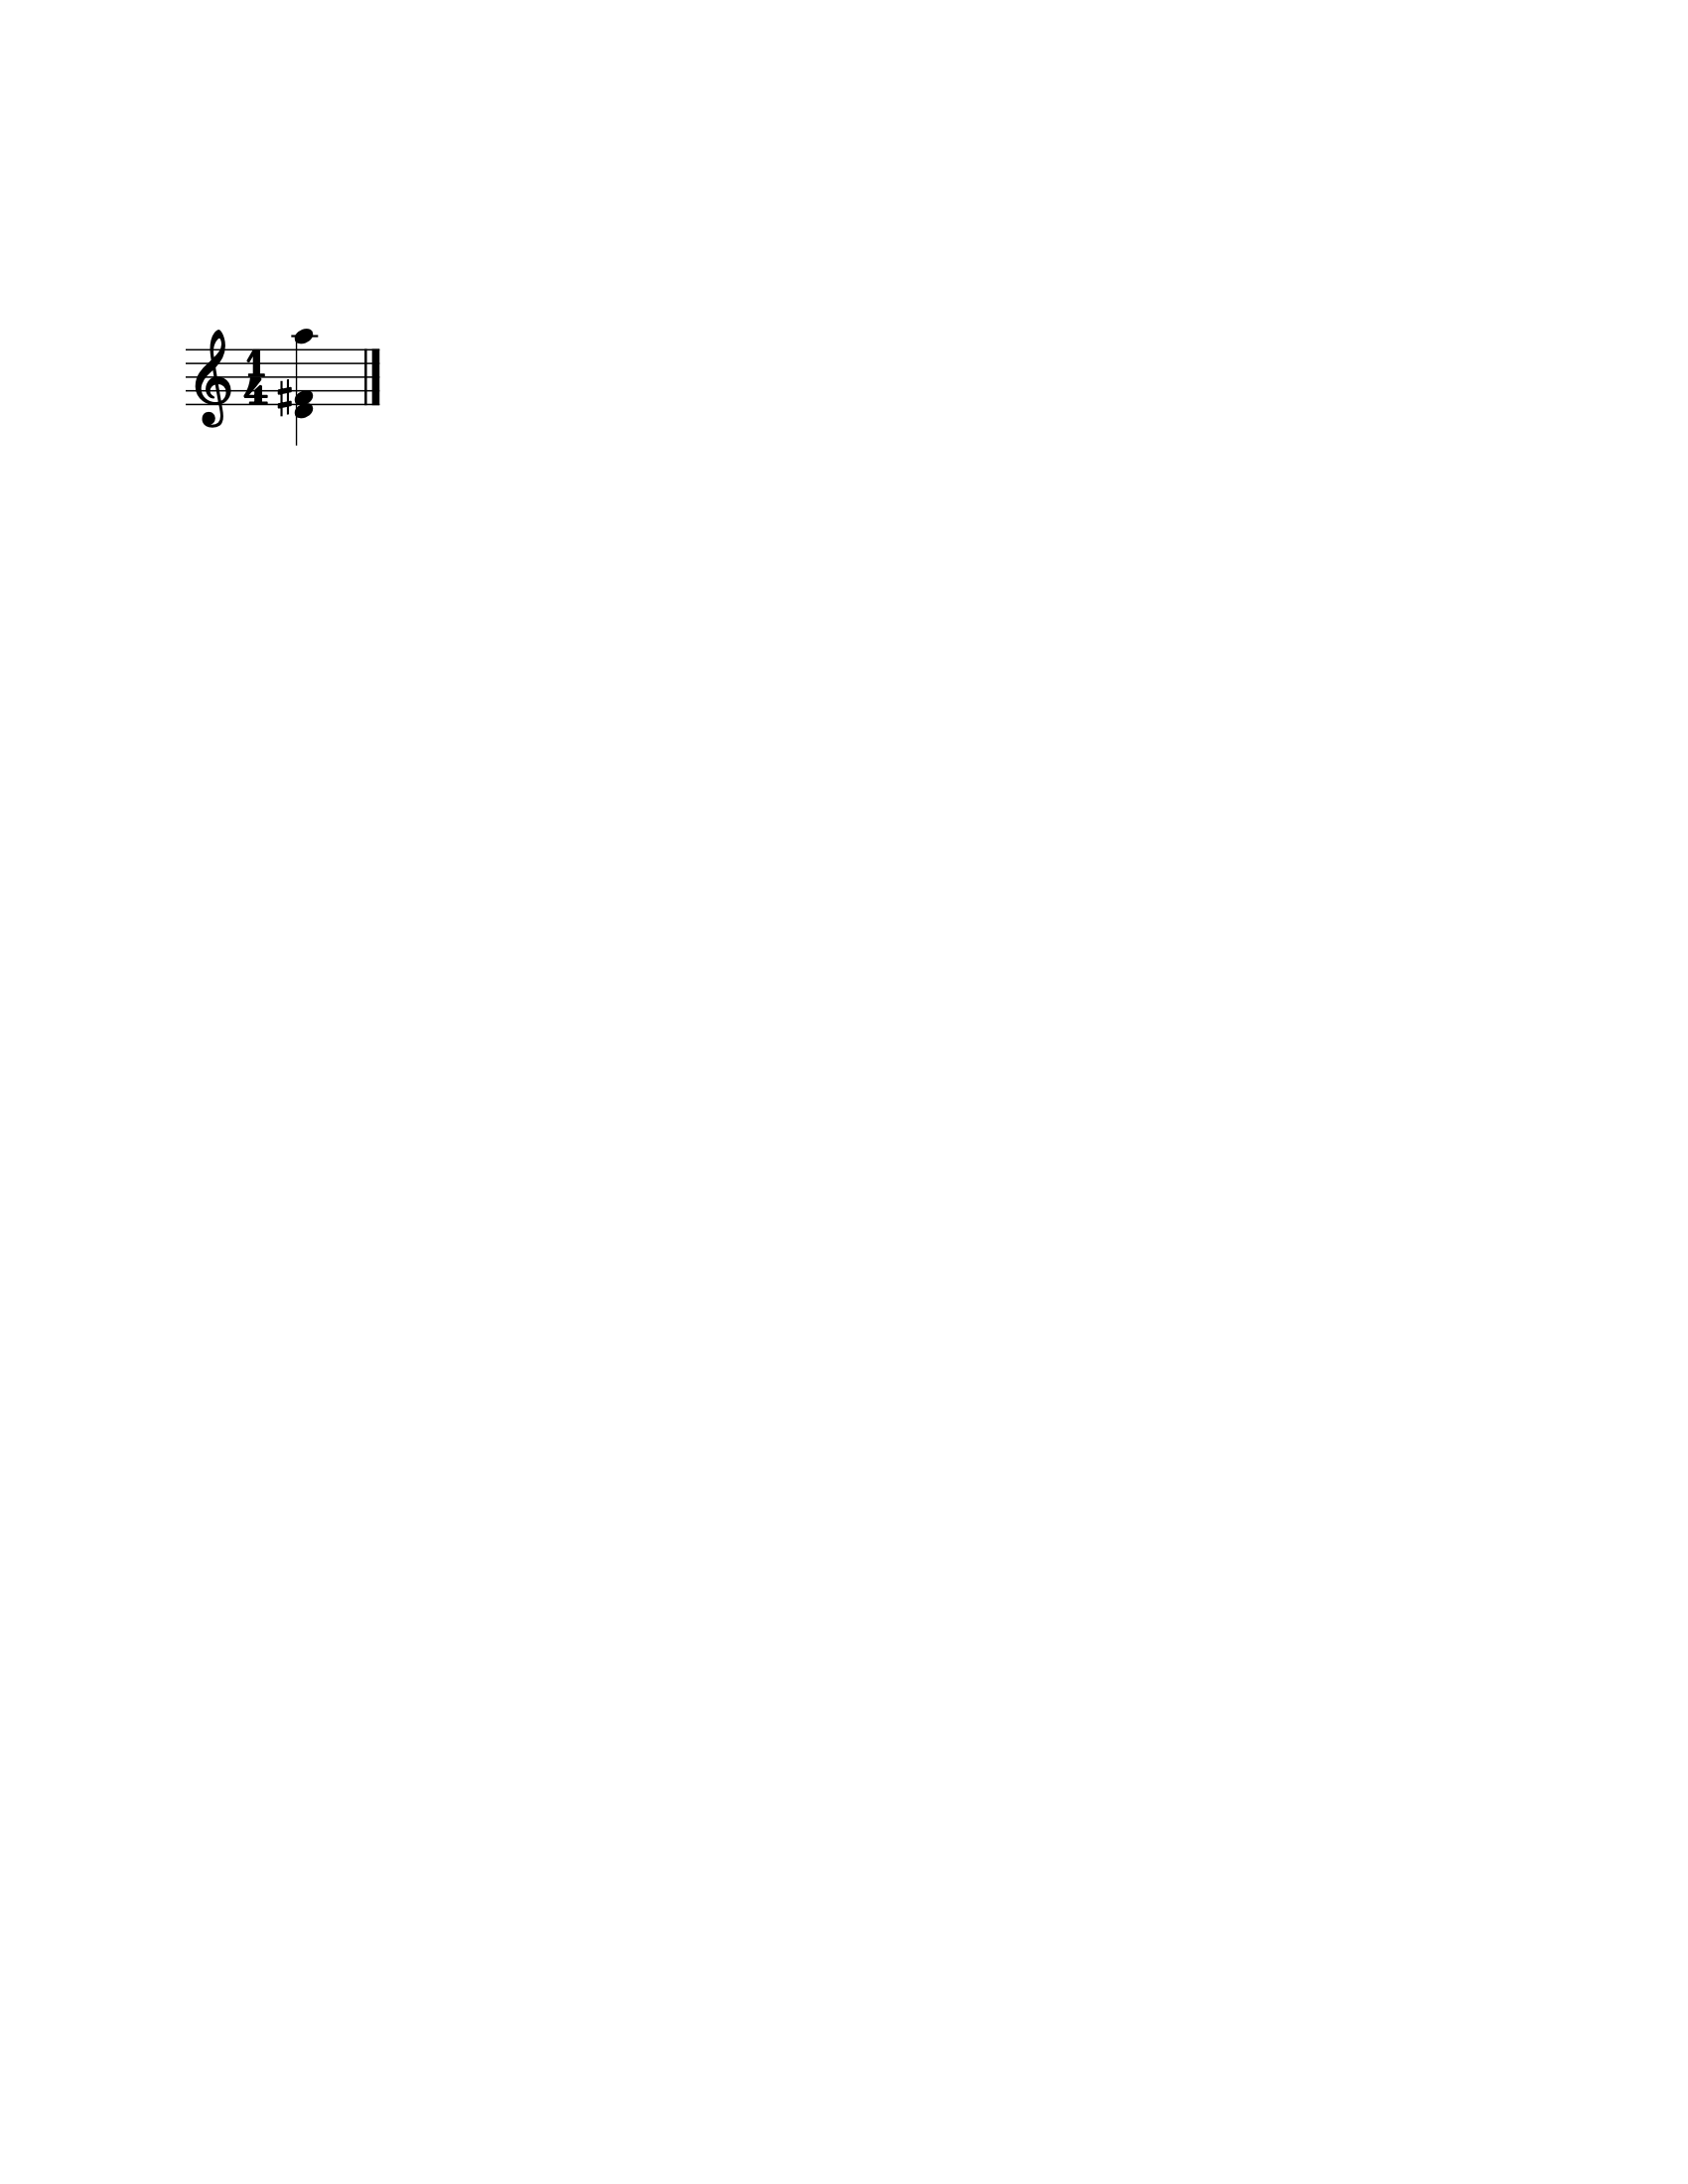

In [201]:
d = note.Note('D4')
fSharp = note.Note('F#4')
a = note.Note('A5')
dMajor = chord.Chord([d, fSharp, a])

dMajor.show()

Or we can pass a string with note names separated by spaces:

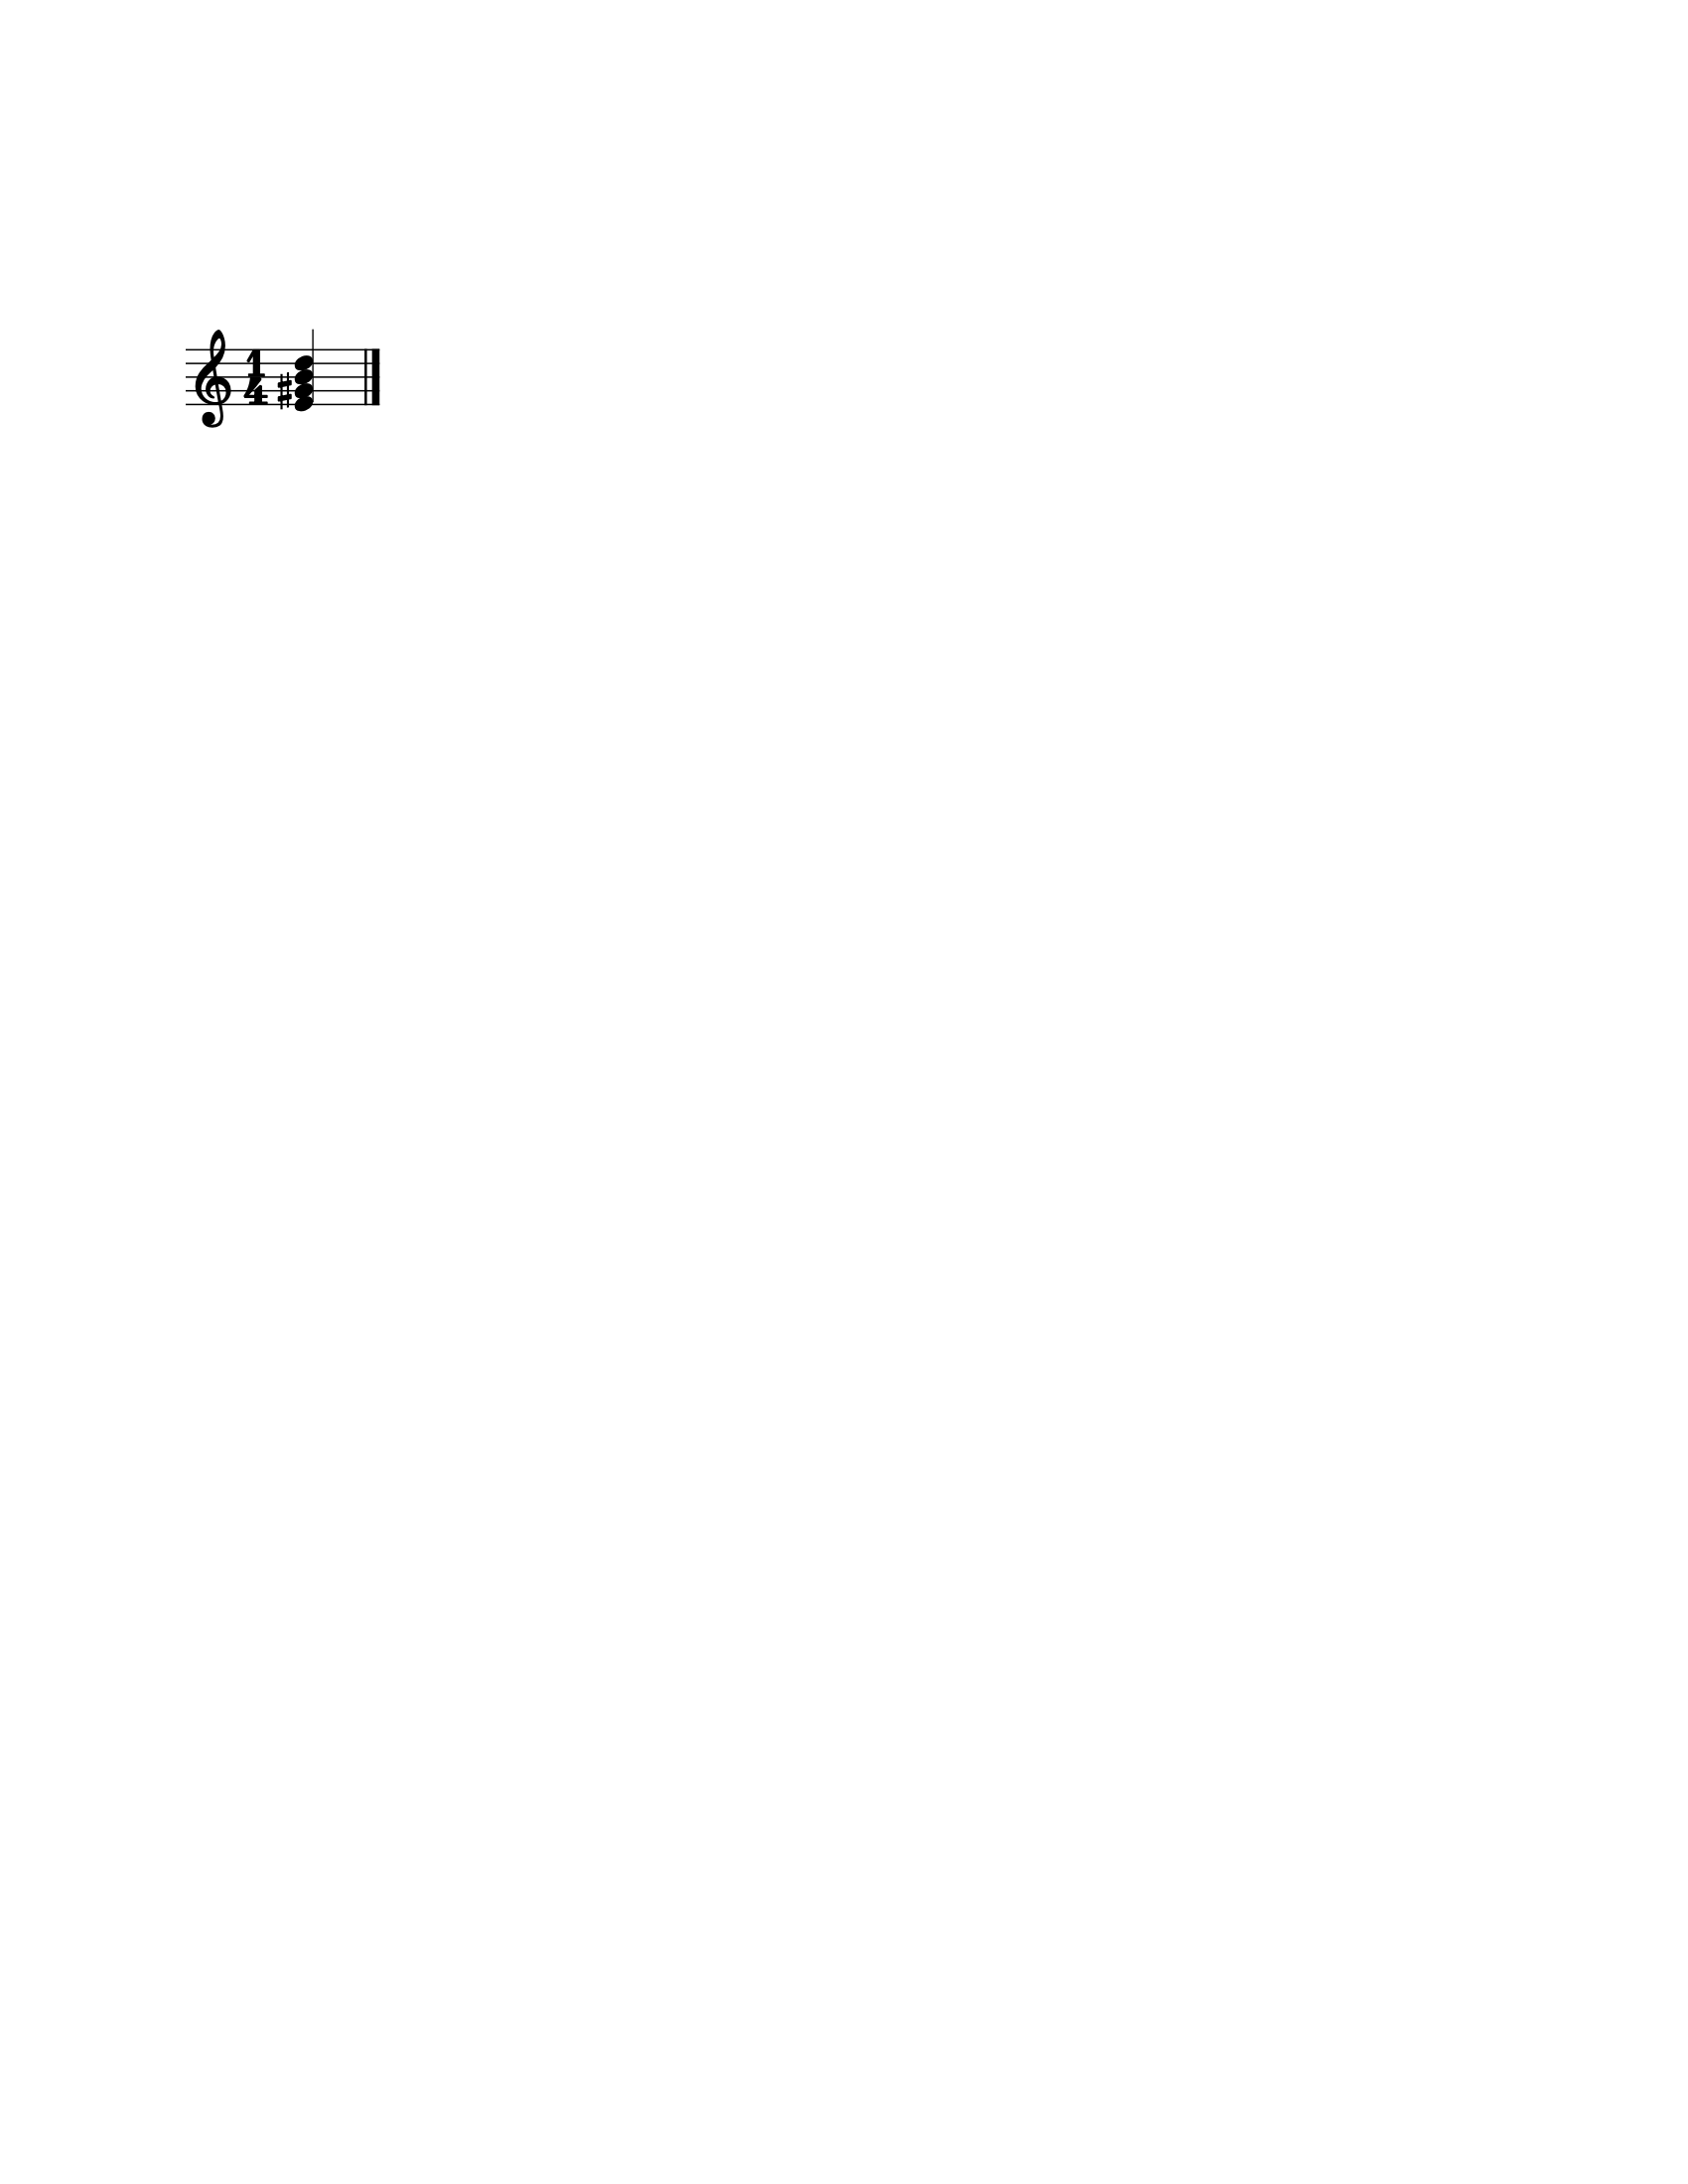

In [202]:
e7 = chord.Chord("E4 G#4 B4 D5")
e7.show()

The octaves are optional, especially if everything is within an octave:

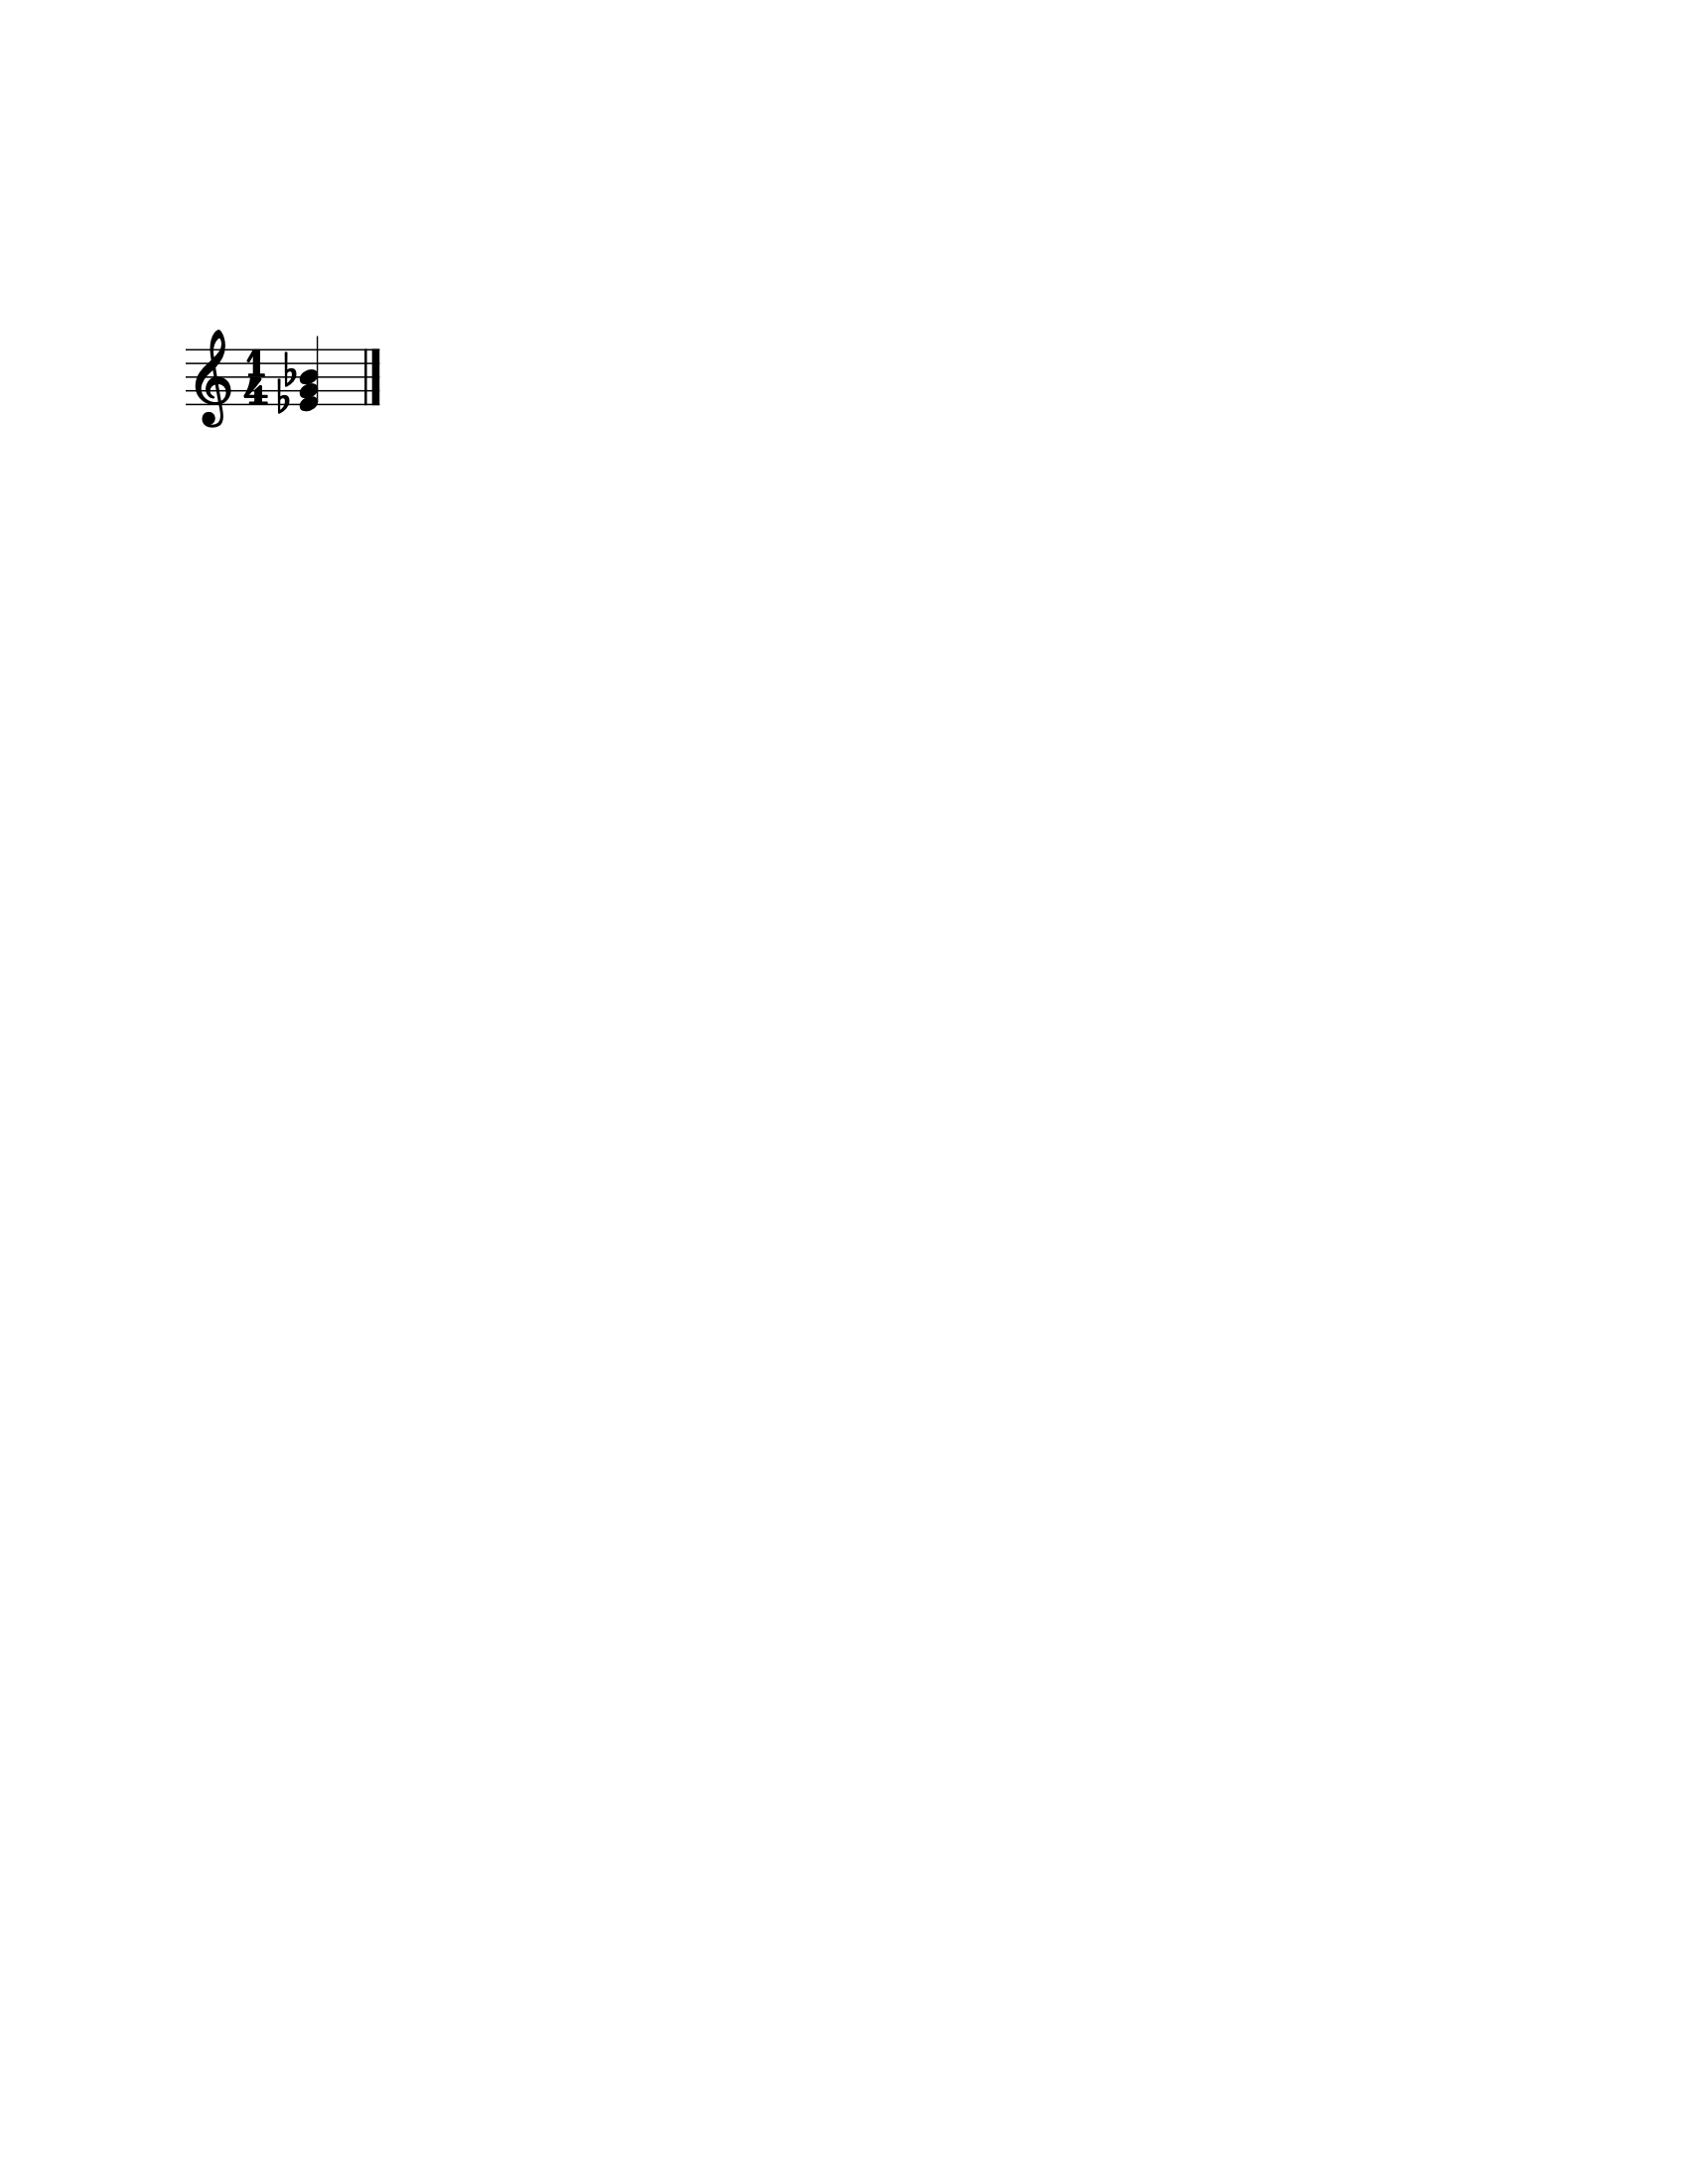

In [203]:
es = chord.Chord("E- G B-")
es.show()

But you will definitely want them if a chord crosses the boundary of an octave (between B and C). Unless you love 6-4 chords, this is probably not what you want:

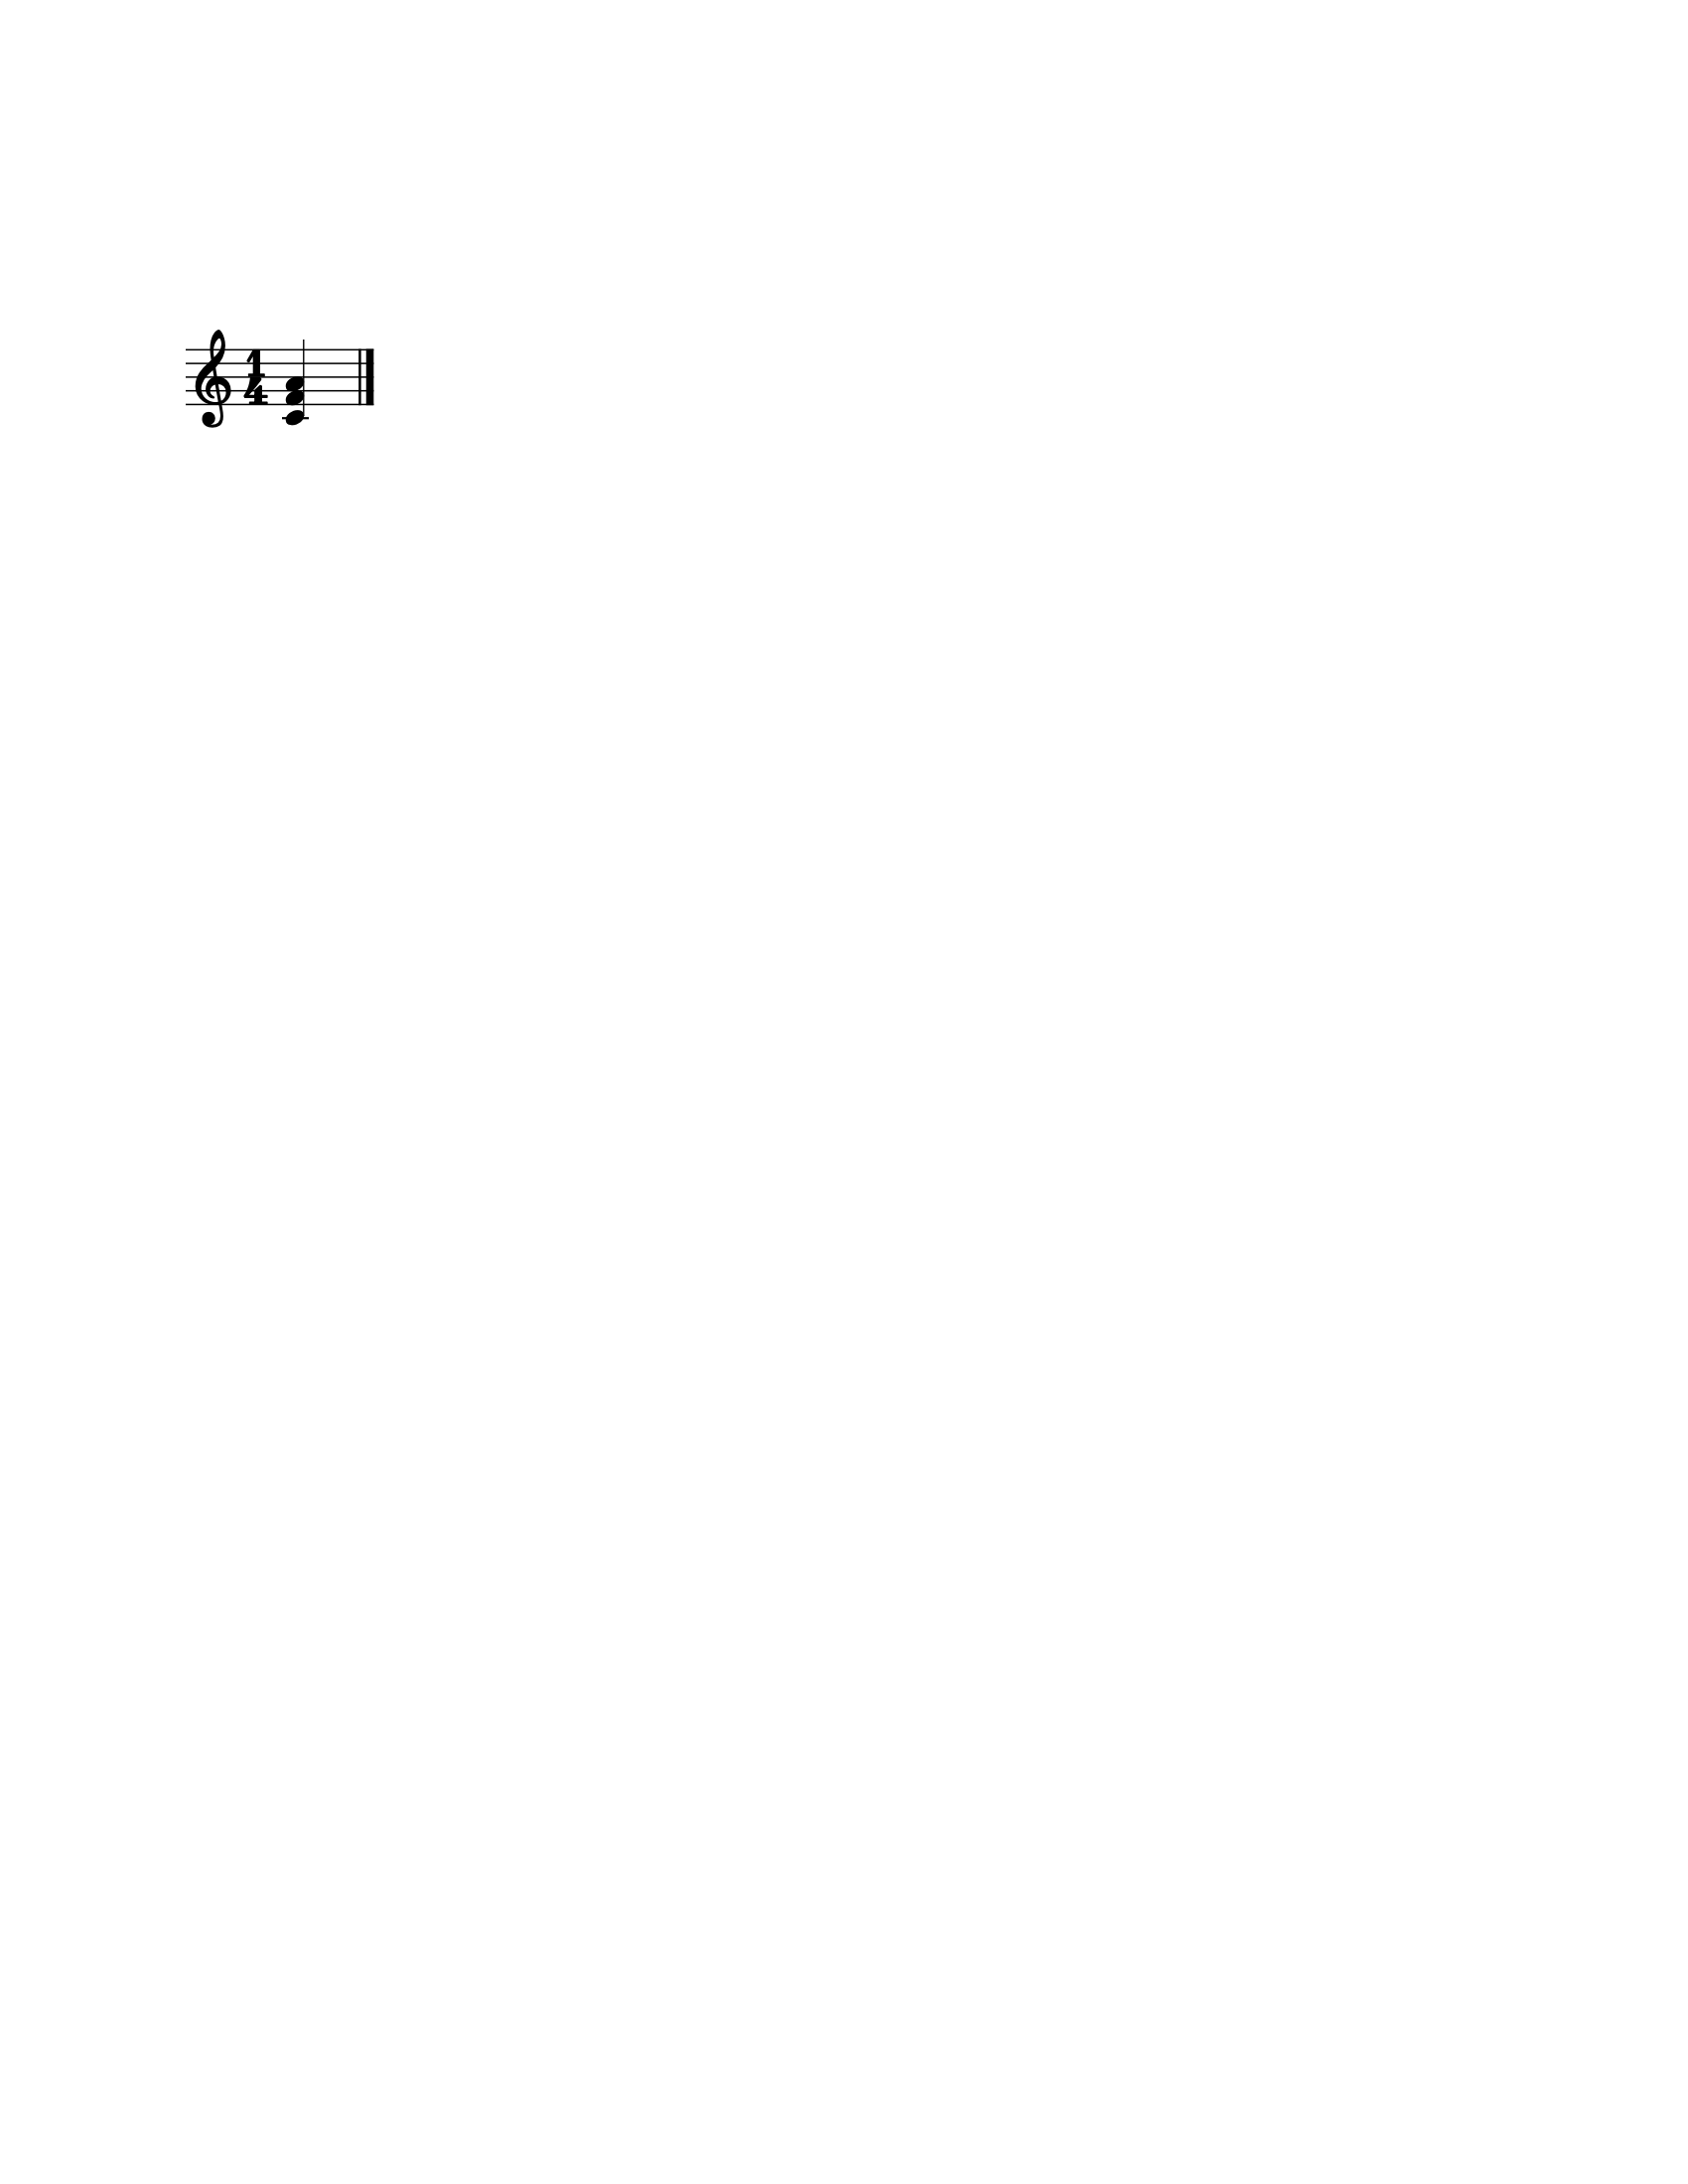

In [204]:
fMajor = chord.Chord("F A C")
fMajor.show()

Notice that because C sorts before F and A that the chord is in second inversion, or 64. We can figure out the inversion of a Chord like so:

In [205]:
print(fMajor.inversion(), fMajor.inversionName())

2 64


In addition to .commonName, there are a few other “name” properties that might be interesting:

In [206]:
fMajor.fullName

'Chord {F | A | C} Quarter'

In [207]:
fMajor.pitchedCommonName

'F-major triad'

Like Note objects, we can put Chord objects inside a Stream:

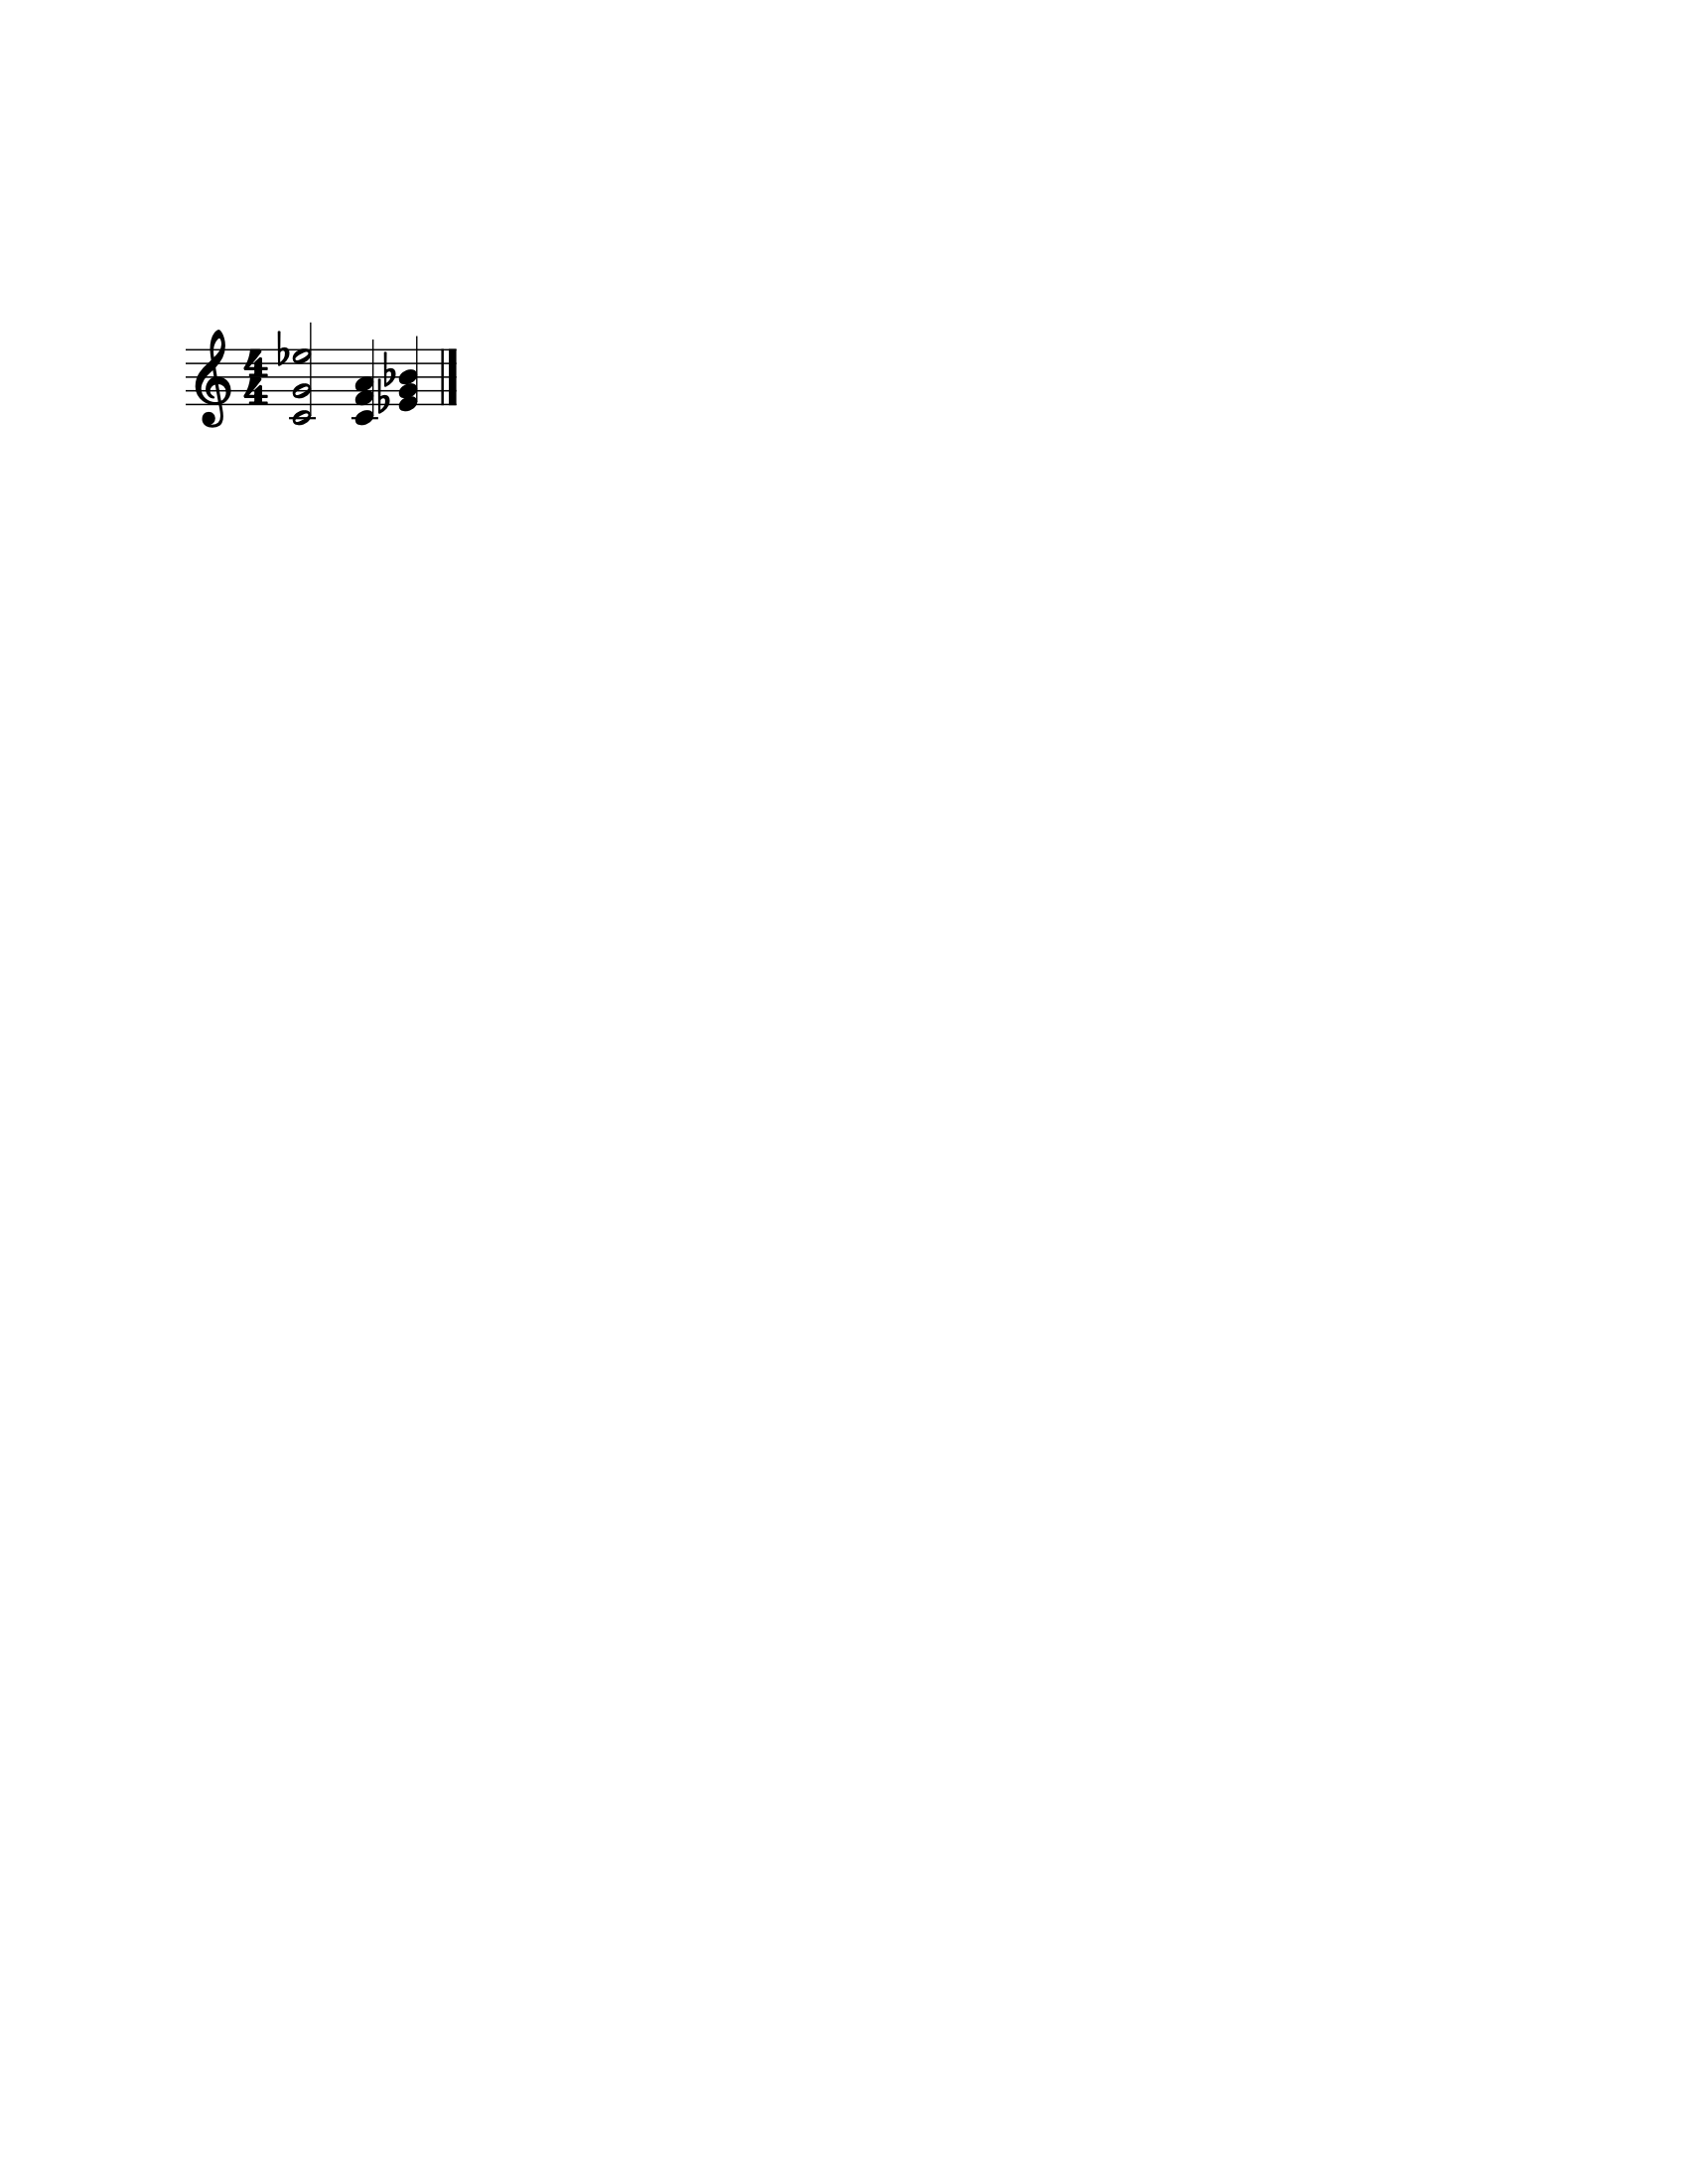

In [208]:
stream1 = stream.Stream()
stream1.append(cMinor)
stream1.append(fMajor)
stream1.append(es)
stream1.show()

We can mix and match Notes, Rests, and Chords:

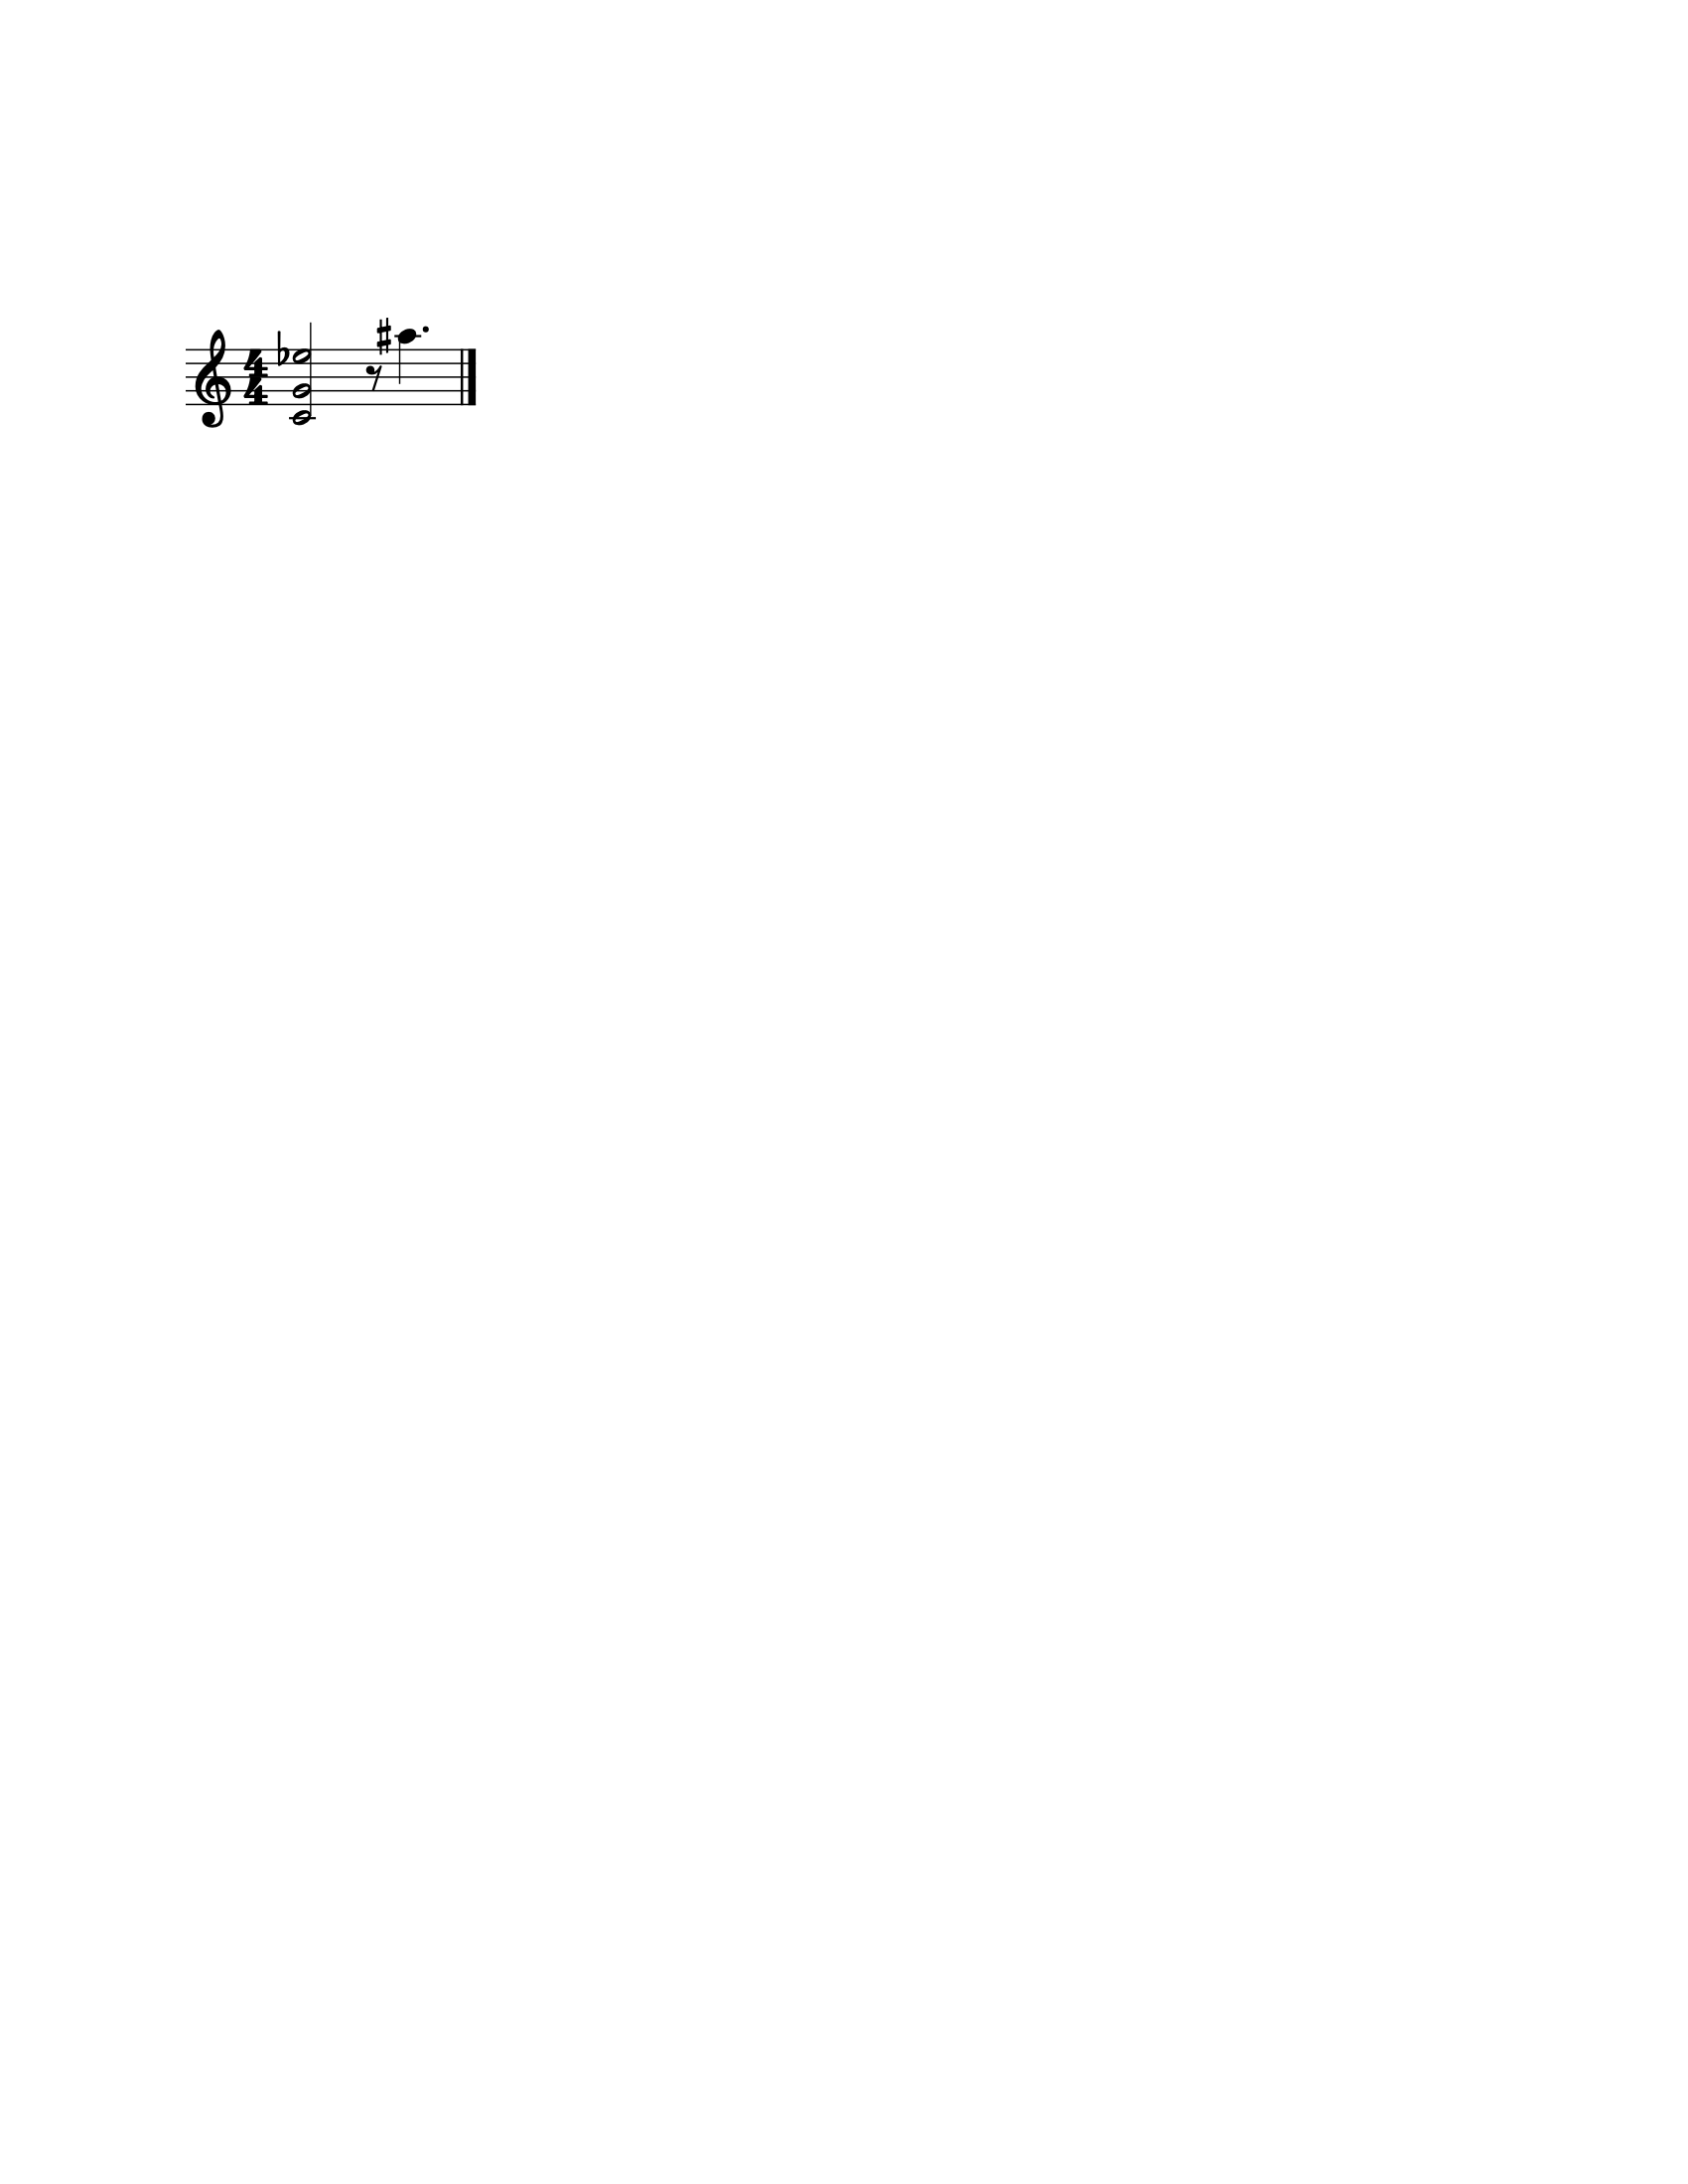

In [209]:
rest1 = note.Rest()
rest1.quarterLength = 0.5
noteASharp = note.Note('A#5')
noteASharp.quarterLength = 1.5

stream2 = stream.Stream()
stream2.append(cMinor)
stream2.append(rest1)
stream2.append(noteASharp)
stream2.show()

### Post-tonal chords (in brief)

There are a lot of methods for dealing with post-tonal aspects of chords. If you’re not interested in twentieth century music, go ahead and skip to the next chapter, but, here are some fun things.

The intervalVector of a chord is a list of the number of [semitones, whole-tones, minor-thirds/augmented-seconds, major-thirds, perfect fourths, and tritones] in the chord or inversion. 
A minor triad, for instance, has one minor third (C to E-flat), one major third (E-flat to G), and one perfect fourth (G to C above, since octave does not matter):

In [211]:
cMinor.intervalVector

[0, 0, 1, 1, 1, 0]

In [213]:
# A major triad has the same interval vector:
cMajor.intervalVector

[0, 0, 1, 1, 1, 0]

In [215]:
# The elliottCarterChord is unique in that it has an .intervalVector of all 1’s:
elliottCarterChord.intervalVector

[1, 1, 1, 1, 1, 1]

In [216]:
# Well, it’s almost unique: there is another chord with the same .intervalVector. That Chord is called its Z-relation or Z-pair.
elliottCarterChord.hasZRelation

True

In [217]:
otherECChord = elliottCarterChord.getZRelation()
otherECChord

<music21.chord.Chord C D- E- G>

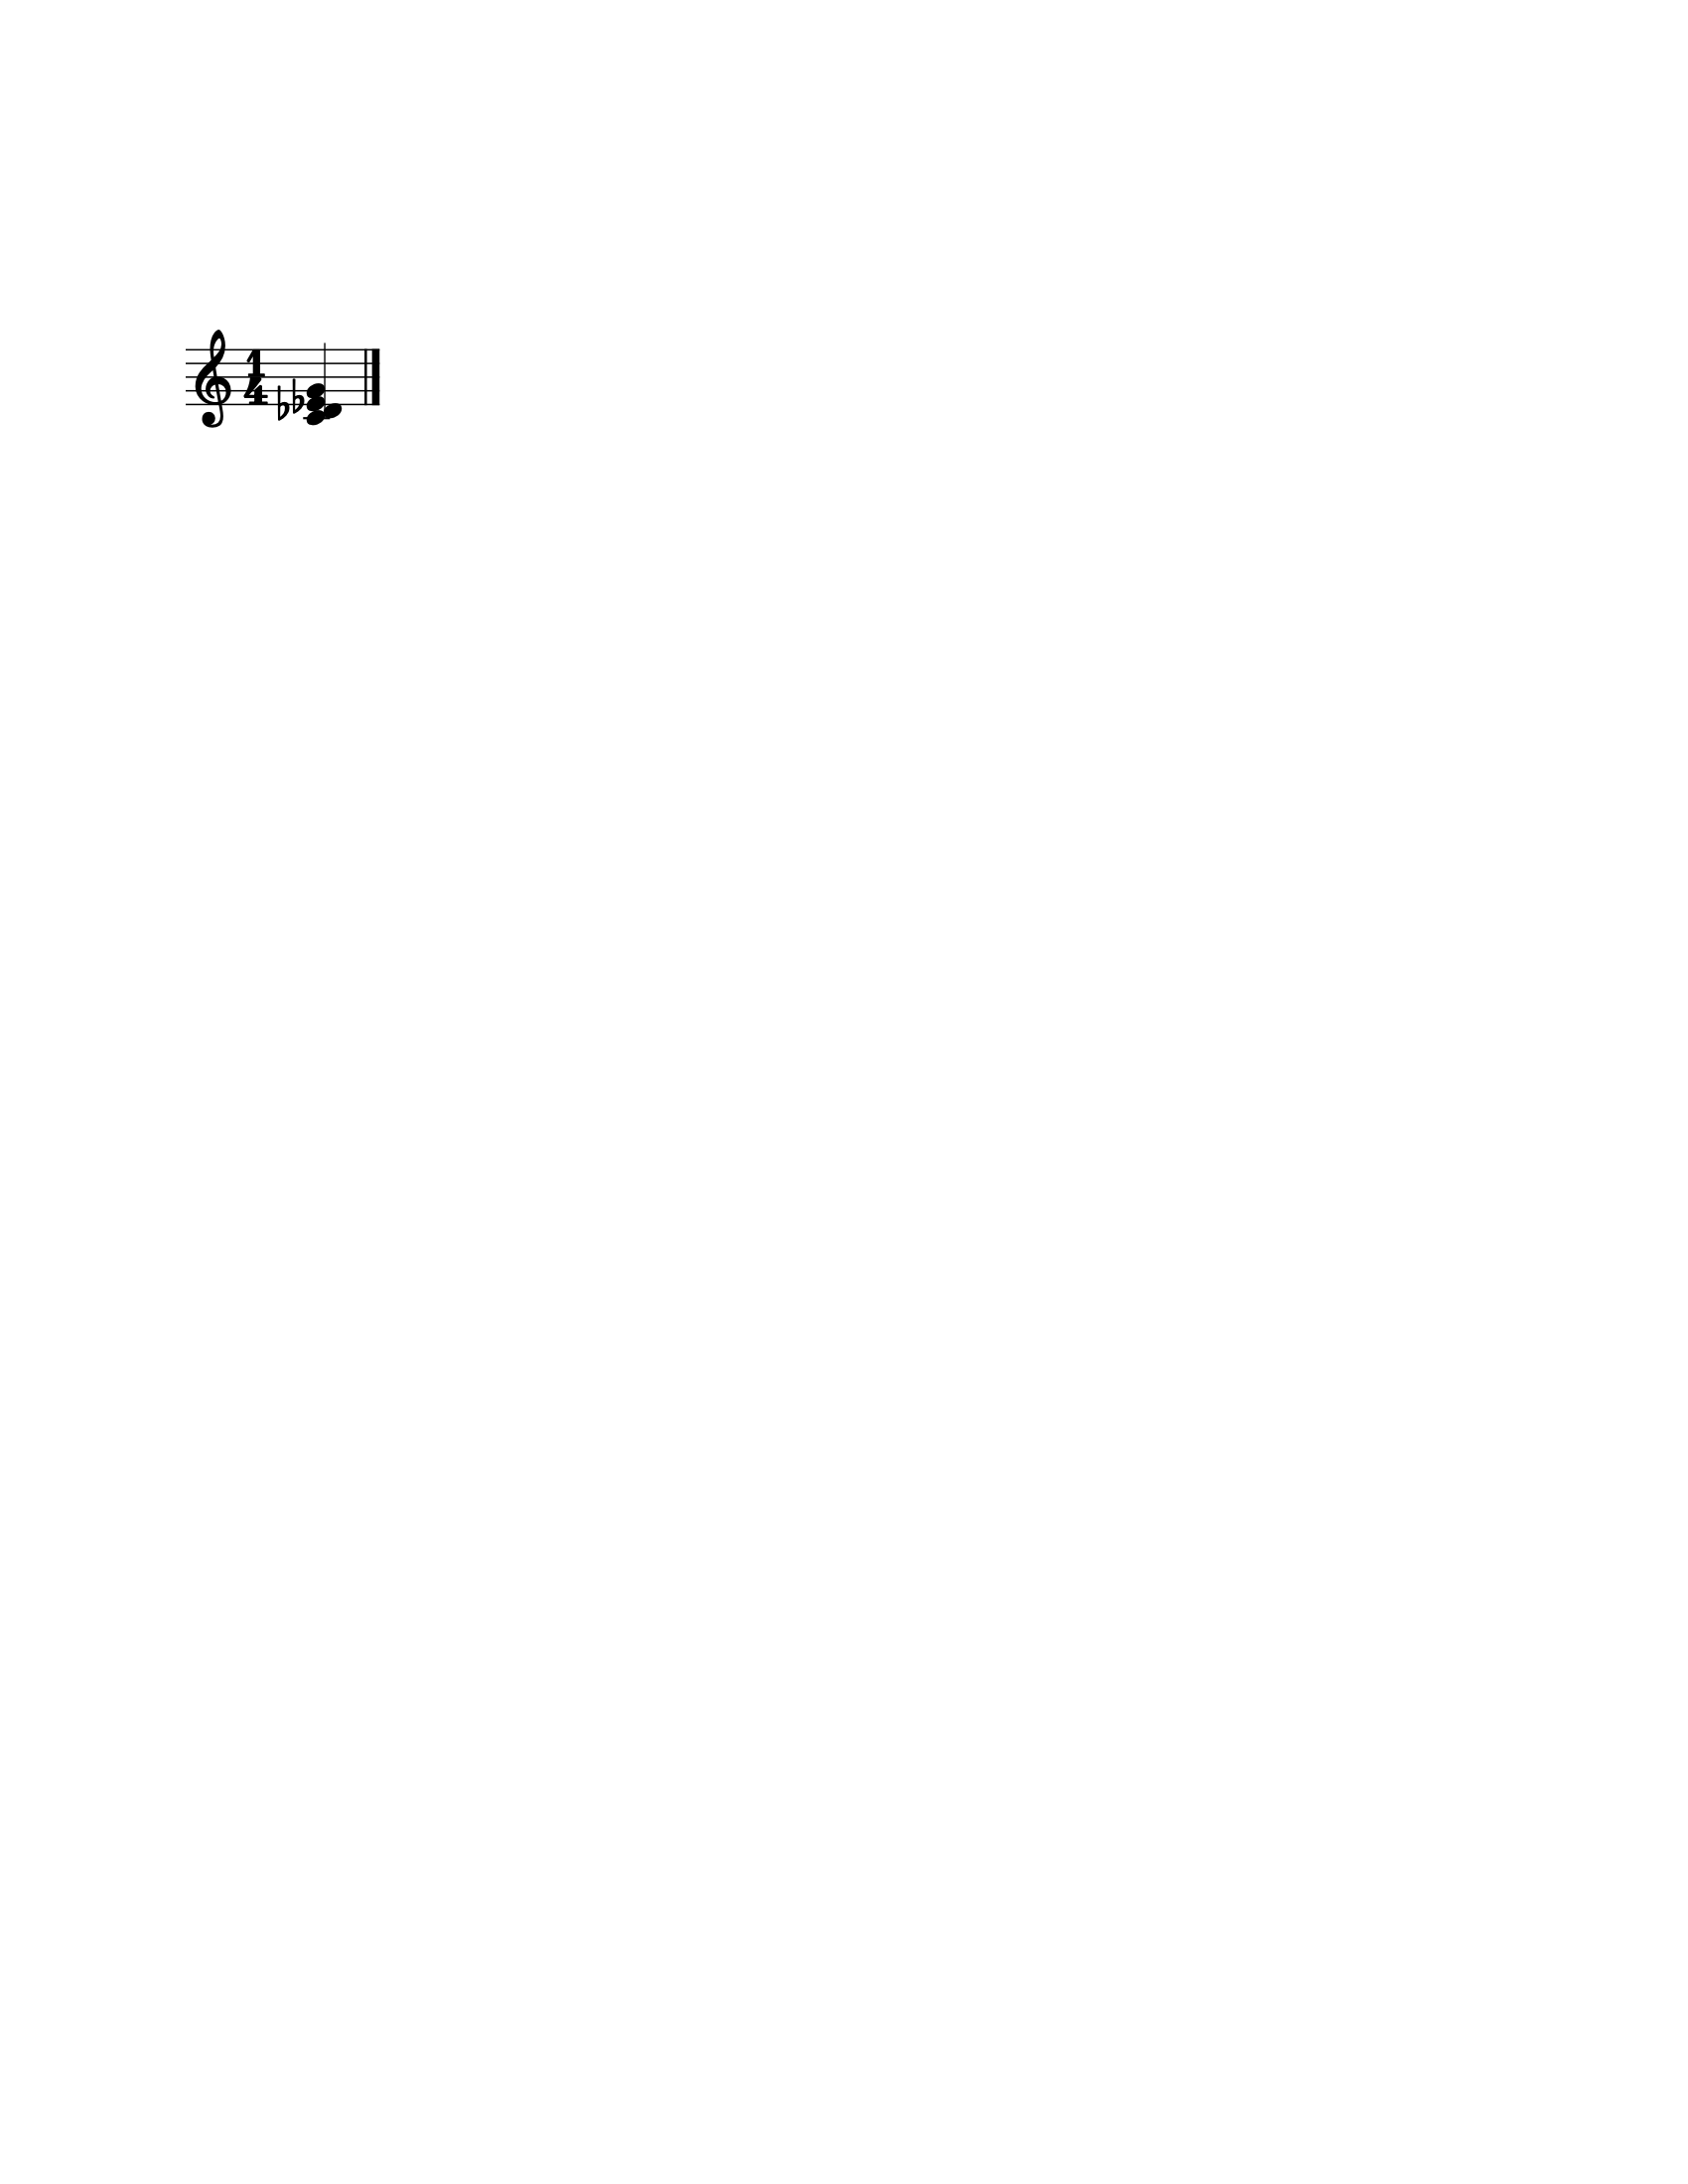

In [218]:
otherECChord.show()

In [219]:
otherECChord.intervalVector

[1, 1, 1, 1, 1, 1]

The other post-tonal tools you might be interested in are given below. We’ll return to them in a later chapter, but here are three important ones:

In [221]:
print(elliottCarterChord.primeForm)

[0, 1, 4, 6]


In [222]:
print(elliottCarterChord.normalOrder)

[0, 1, 4, 6]


In [223]:
print(elliottCarterChord.forteClass)

4-15A


If you really only care about semitones, you can create a chord just with the pitchClasses:

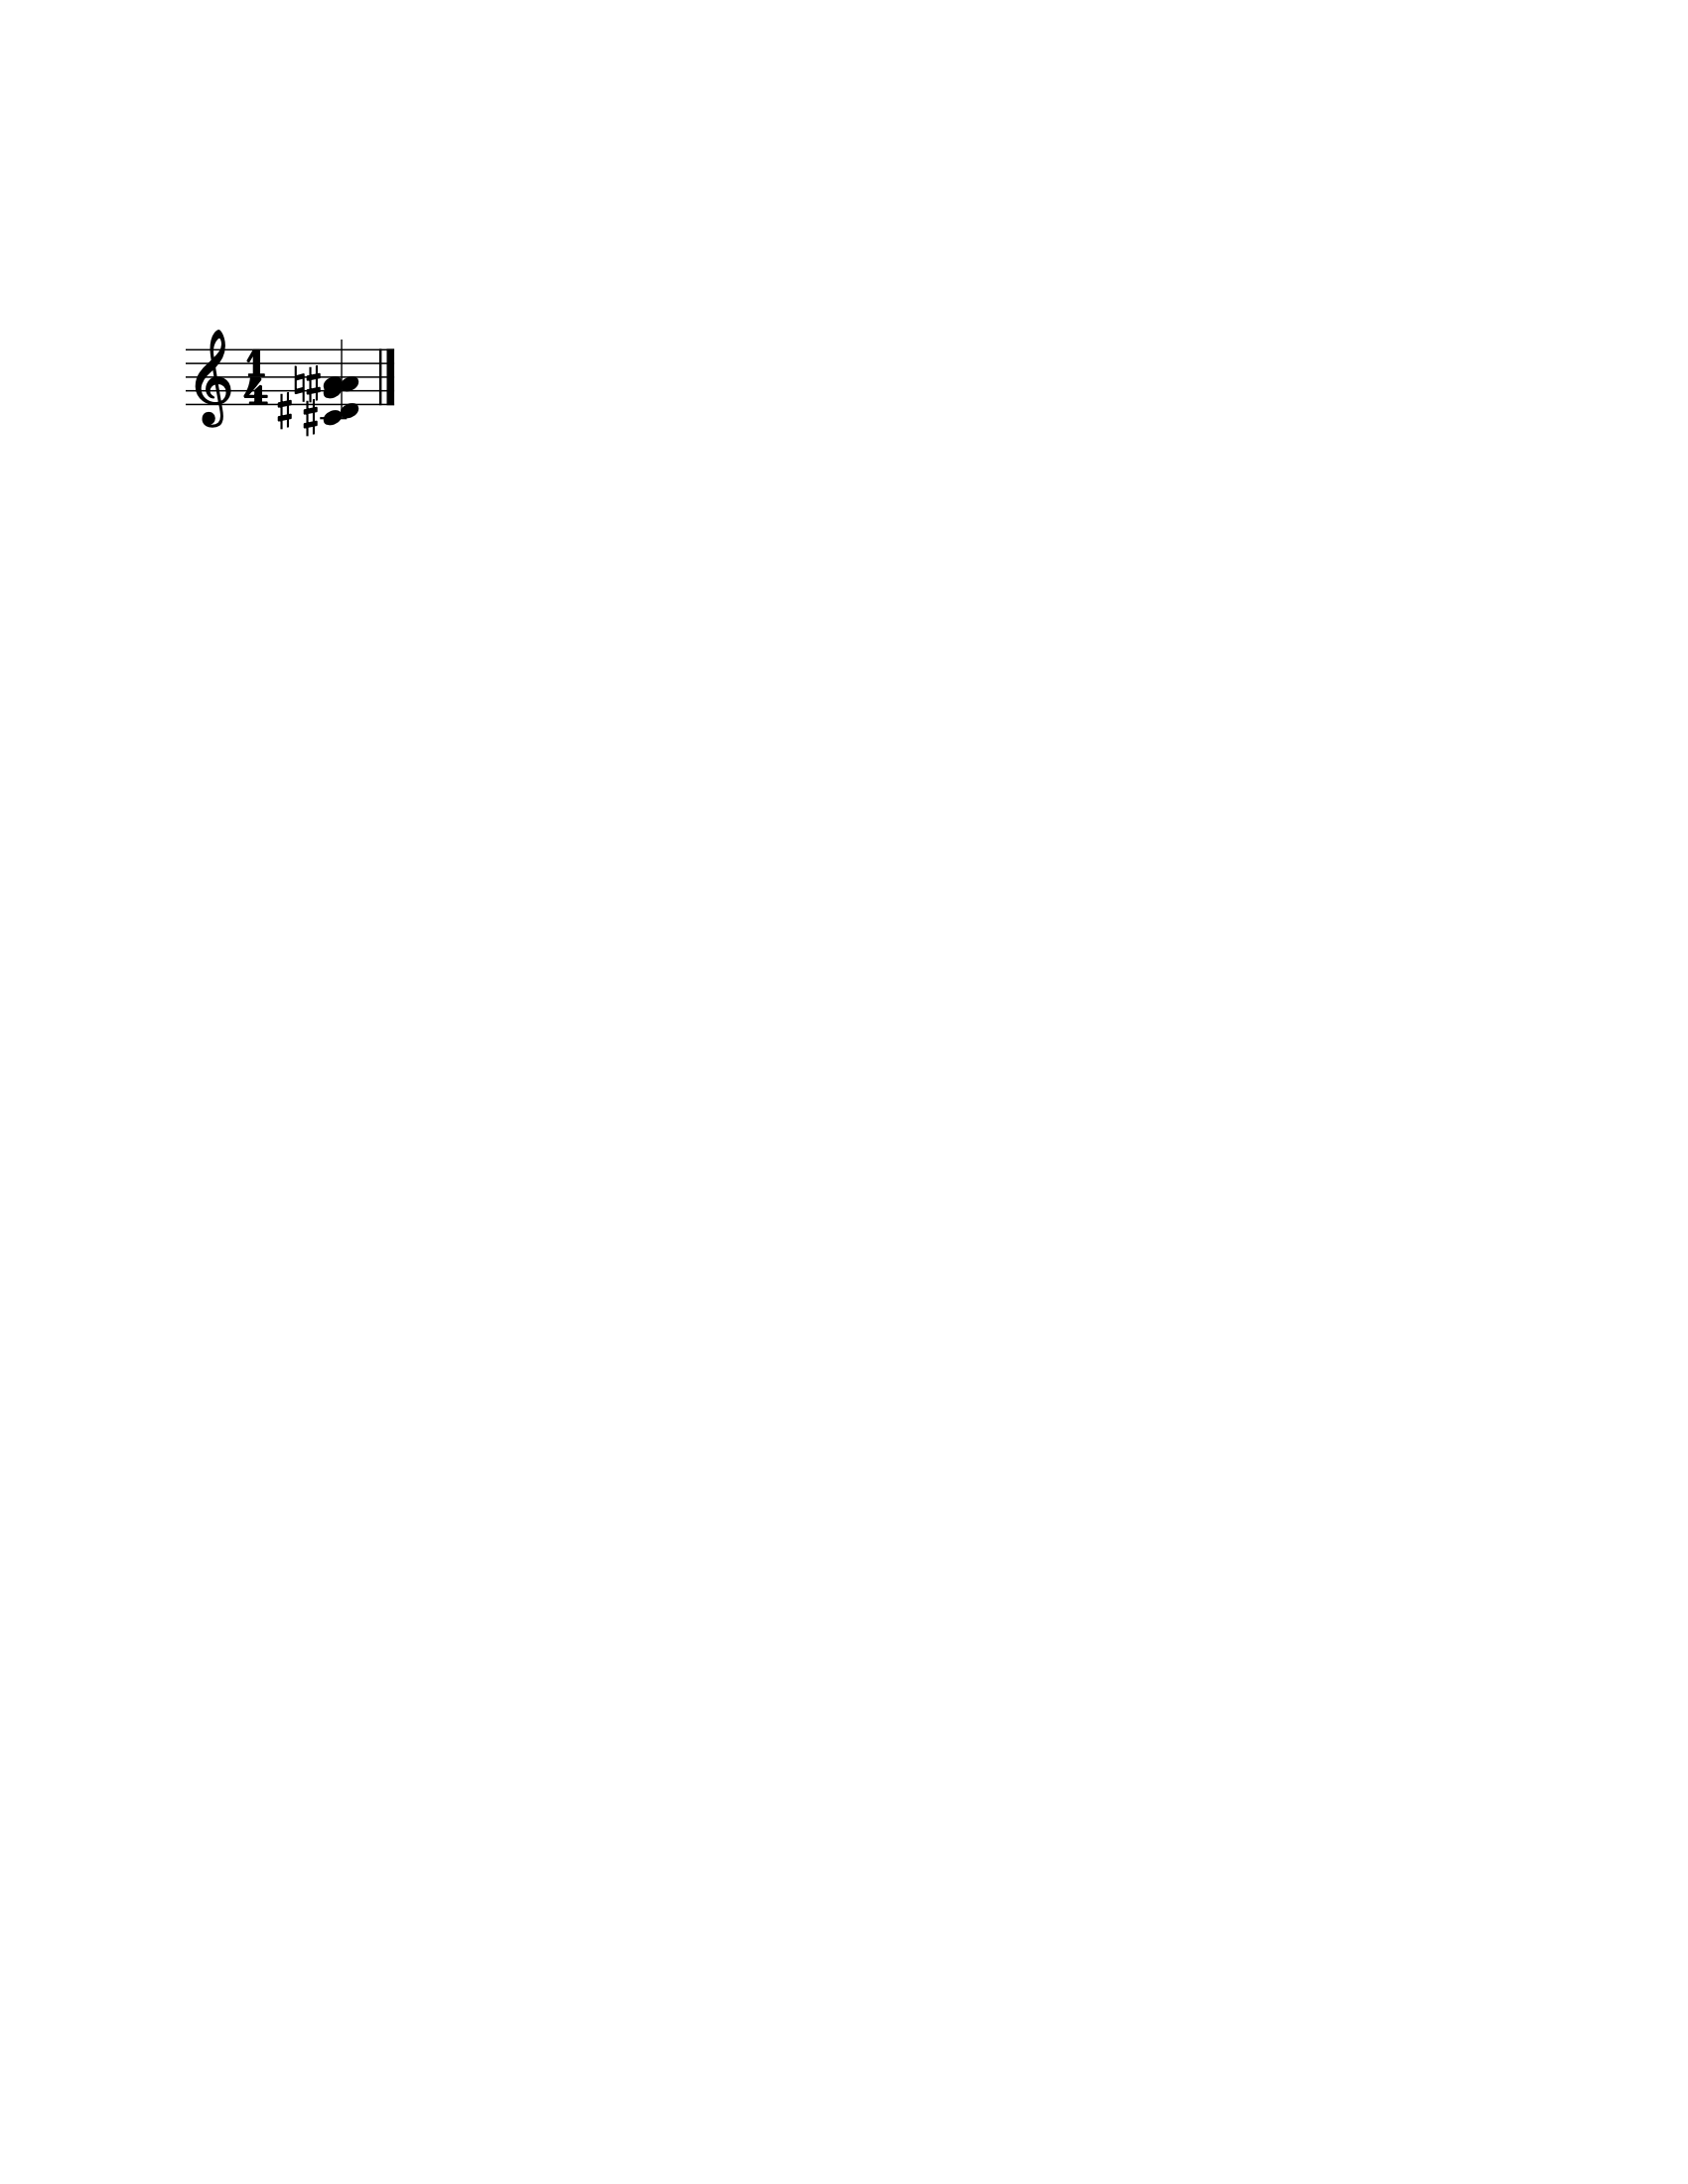

In [224]:
oddChord = chord.Chord([1, 3, 7, 9, 10])
oddChord.show()

There’s a little problem with the A and A# being on the same space that makes it hard to read. Let’s flip the A# to Bb:

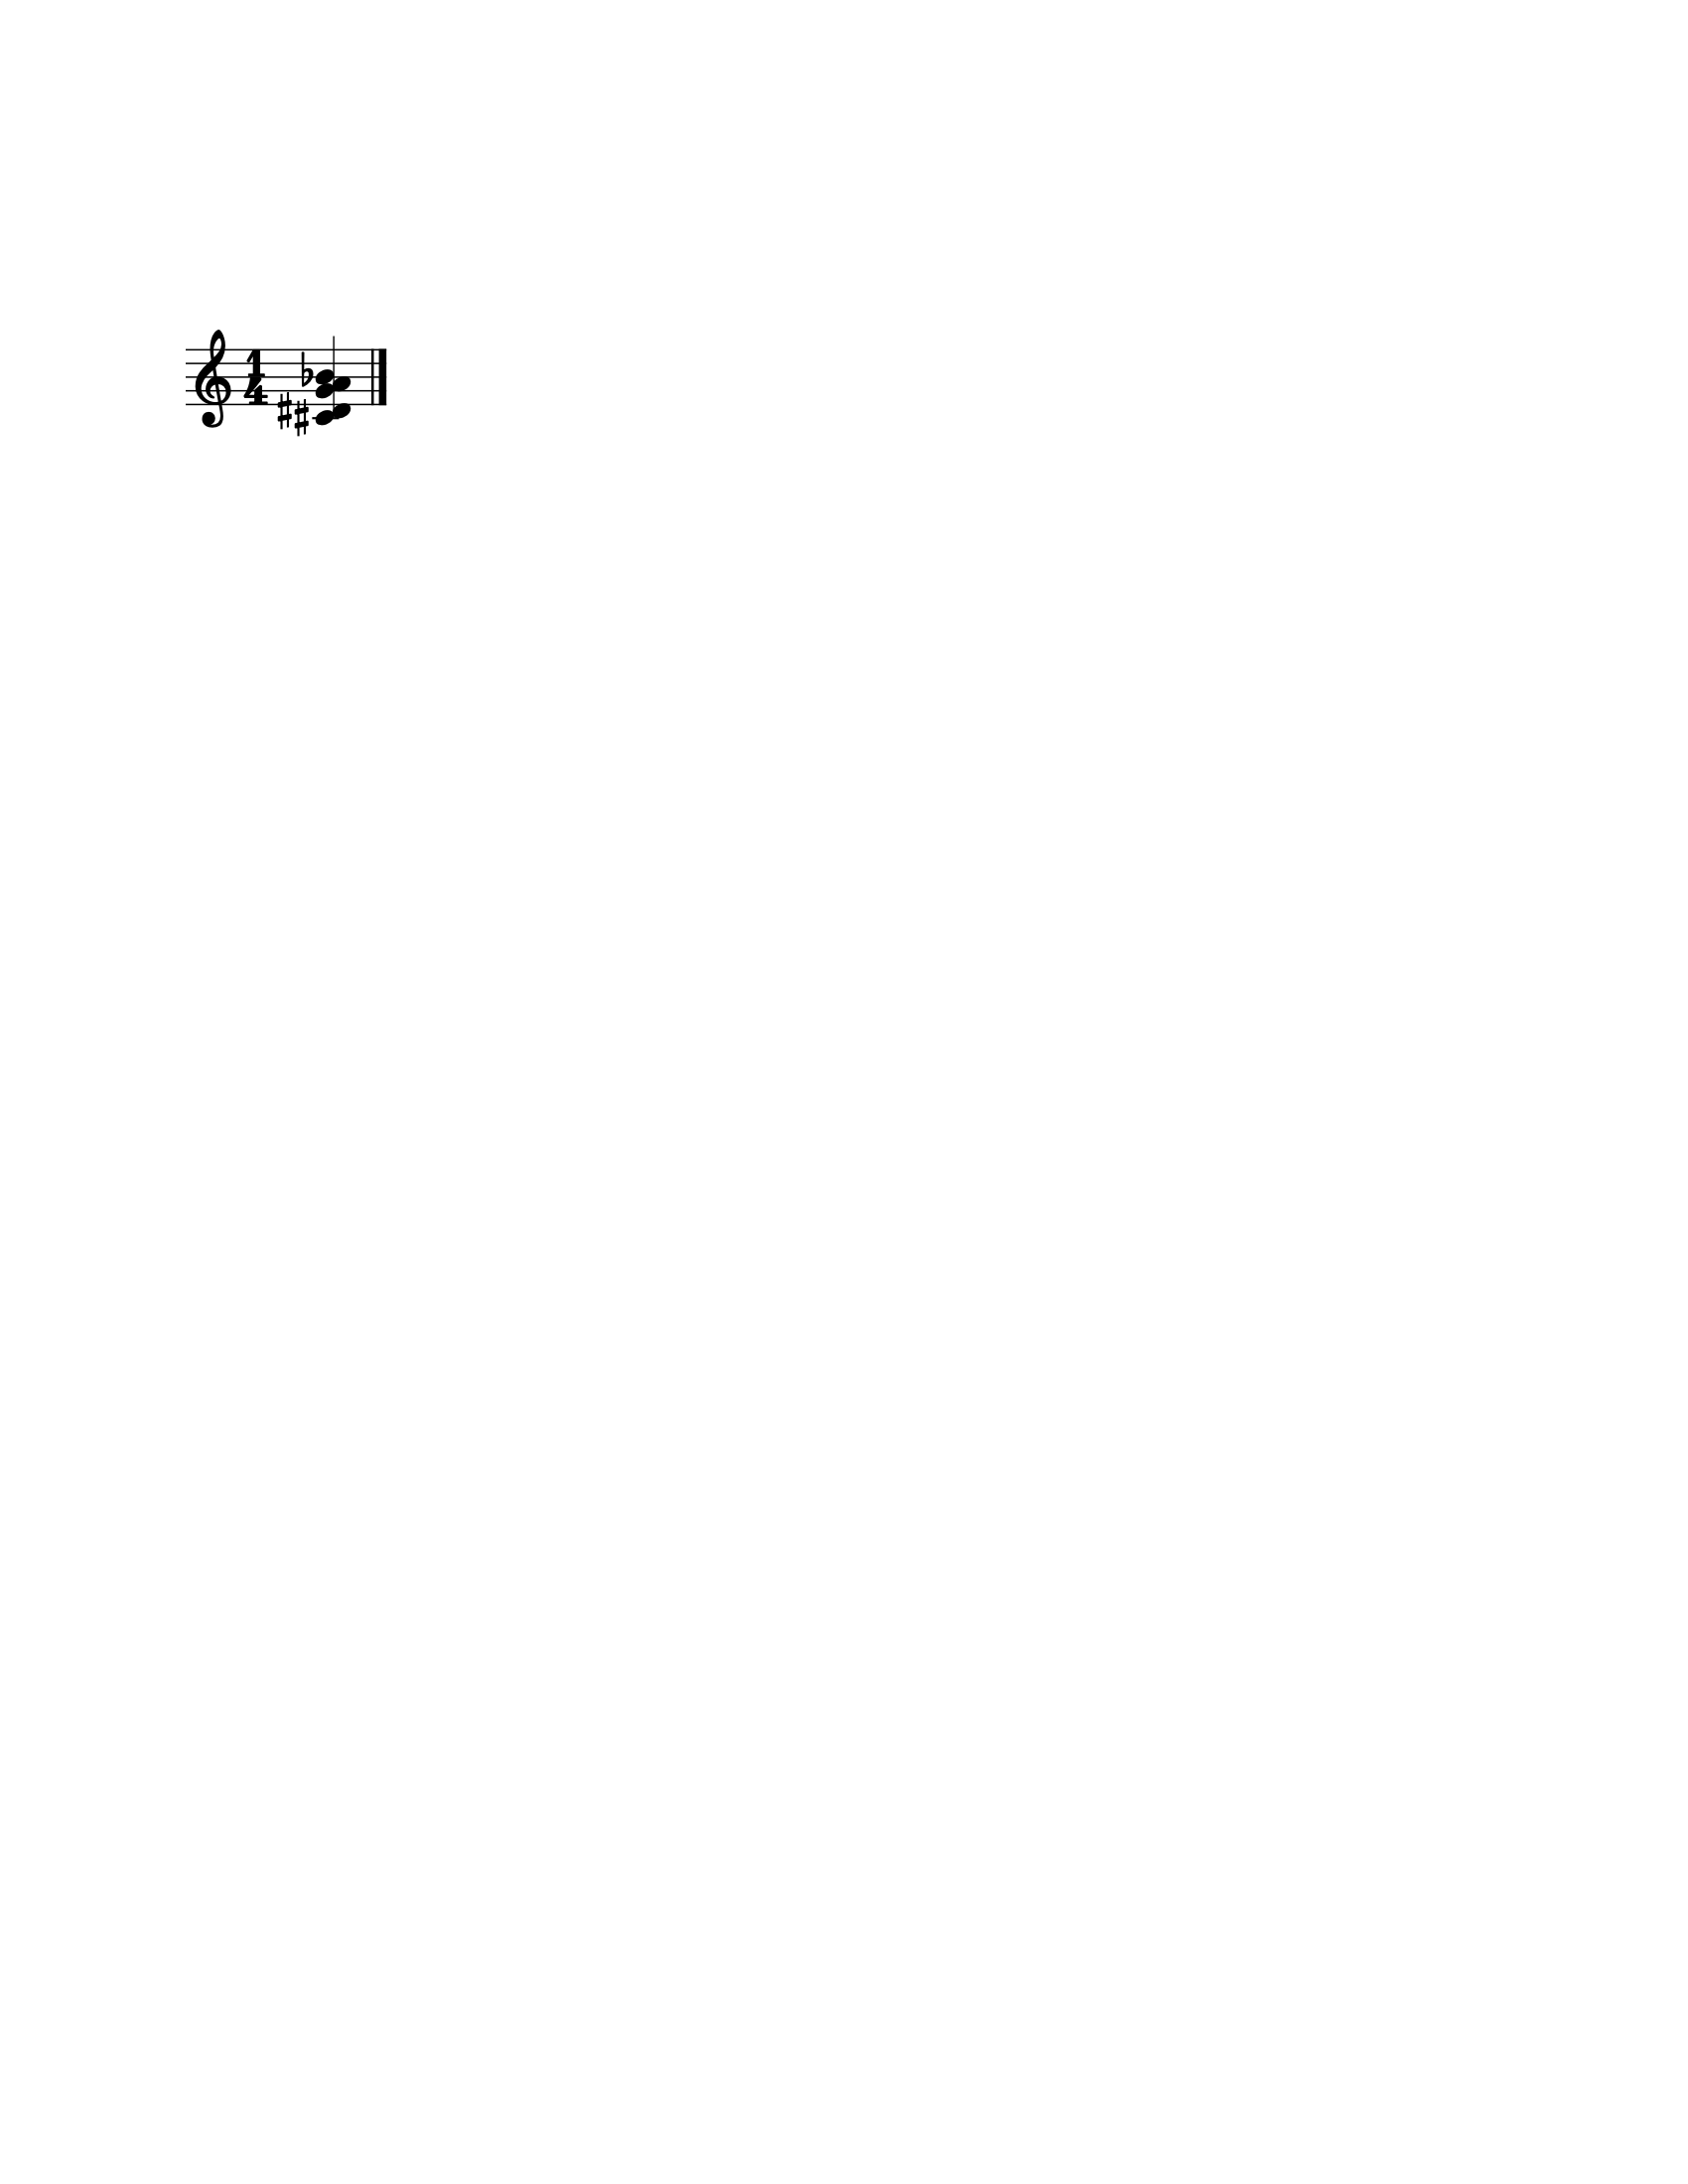

In [225]:
oddChord.pitches[-1].getHigherEnharmonic(inPlace=True)
oddChord.show()

If you use pitchClasses above 11, then they are treated as MIDI numbers, where 60 = MiddleC, 72 = C5, etc. Enharmonic spelling is chosen automatically.

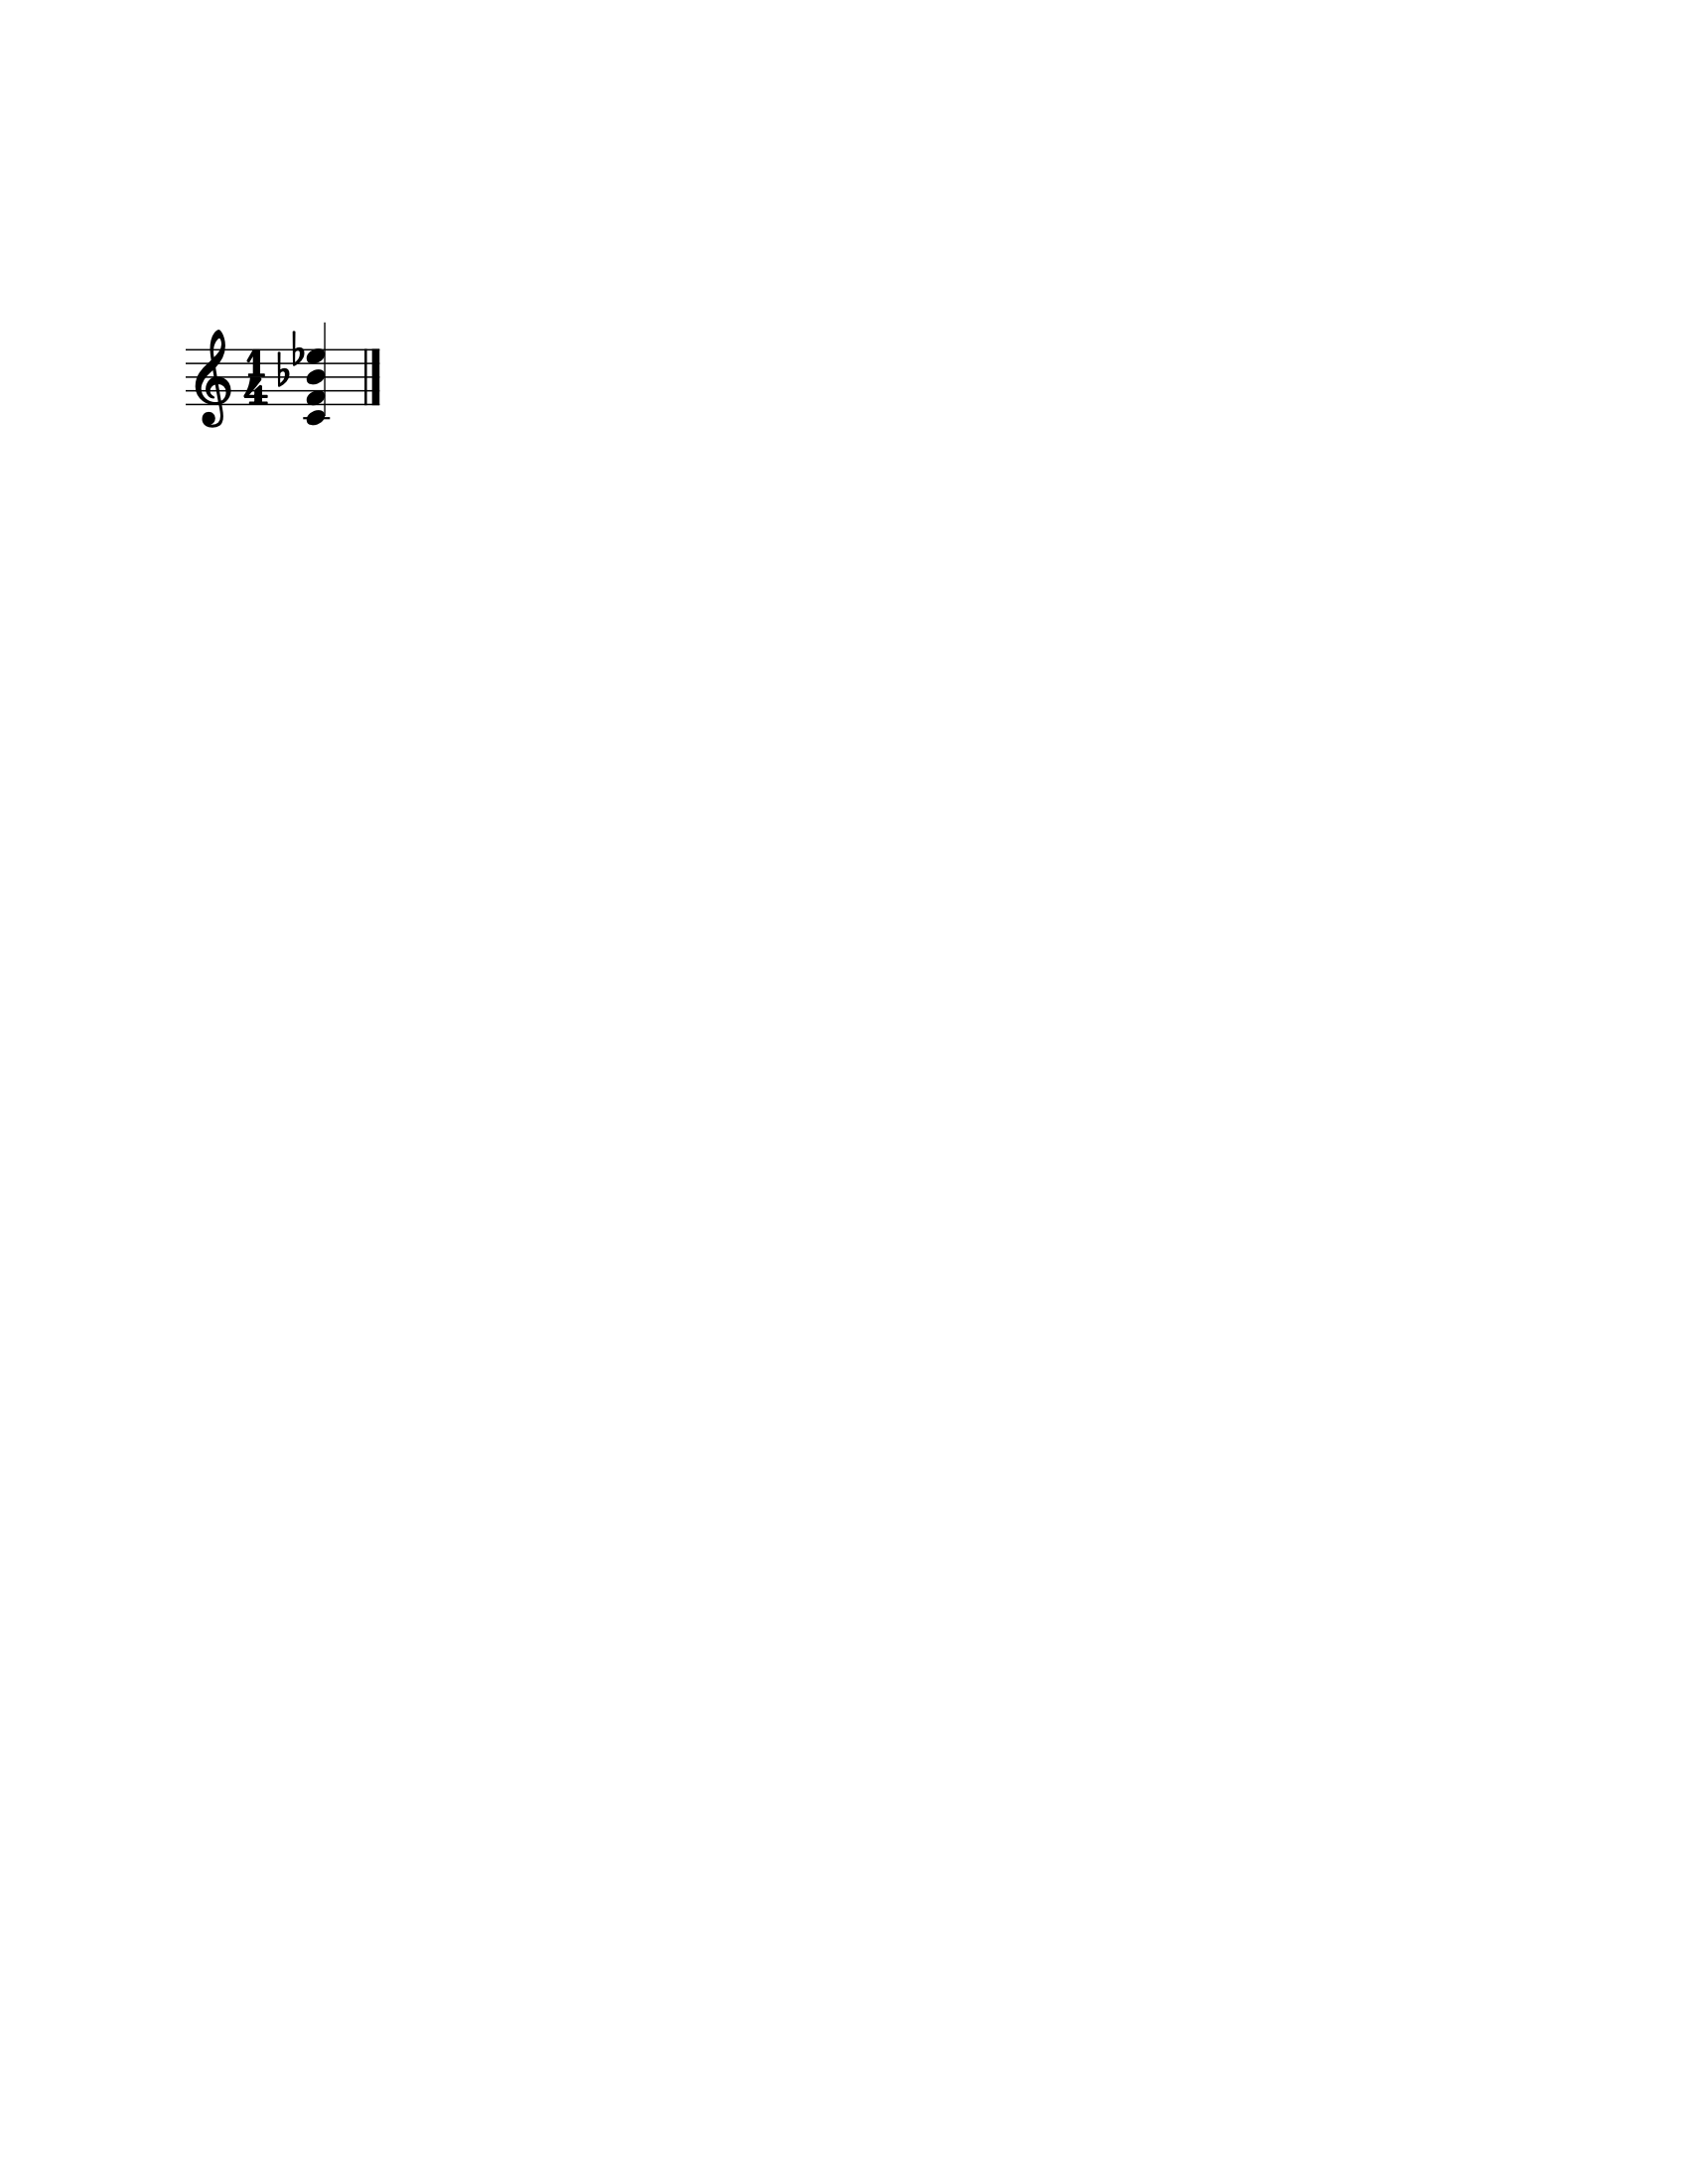

In [226]:
midiChordType = chord.Chord([60, 65, 70, 75])
midiChordType.show()